# **09 - EXPOSURE MODEL VISUALISATION**

**IRDR0012 MSc Independent Research Project**

*   Candidate number: NWHL6
*   Institution: UCL IRDR
*   Supervisor: Dr. Roberto Gentile
*   Date: 01/09/2025
*   Version: v1.0

**Description:**

Explore and visualisation exposure model

**INPUT FILES:**

*   Exposure model_Master.csv

**OUTPUT FILES:**

*   Visuals in the notebook

# **0 - SETUP AND IMPORTS**



Import all required libraries and configure the environment for analysis






In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Mount Google Drive if not already mounted
from google.colab import drive
drive.mount('/content/drive')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

# Report style colors
color_main = "#8DB9CA"
color_second = "#FCD16D"
color_edge = "#3B3838"
infill = "#EFEFEF"

# Define damage grade color progression from light blue (DG1) to red (DG5)
damage_colors = {
    'DG1': "#8DB9CA",  # Main color (light blue) - least damage
    'DG2': "#A8C4B8",  # Blue-green transition
    'DG3': "#C3CFA6",  # Green-yellow transition
    'DG4': "#DEDA94",  # Yellow-orange transition
    'DG5': "#C94B54"   # Red - most damage
}

print("✅ Libraries imported successfully")
print("✅ Google Drive should be mounted at /content/drive")

Mounted at /content/drive
✅ Libraries imported successfully
✅ Google Drive should be mounted at /content/drive


# **1 - FILE PATHS AND DATA LOADING**

In [ ]:
FILE_PATHS = {
    'exposure_master': '/content/drive/MyDrive/IRDR0012_Research Project/00 INPUT/Exposure model_Master.csv'
}

def load_and_separate_data():
    """Load exposure data and separate EEFIT from HDX buildings"""
    data = {}

    # Load and separate exposure data
    try:
        exposure_master = pd.read_csv(FILE_PATHS['exposure_master'], header=0)
        print(f"✅ exposure_master   (header row 1): {exposure_master.shape}")
        print(f"   Columns: {list(exposure_master.columns)}")

        # Separate EEFIT (ID 1-383) from DG0 (ID 1000+)
        eefit_buildings = exposure_master[exposure_master['ID'] <= 383].copy()
        dg0_buildings = exposure_master[exposure_master['ID'] >= 1000].copy()

        data['eefit_buildings'] = eefit_buildings
        data['dg0_buildings'] = dg0_buildings
        data['exposure_master'] = exposure_master  # Keep full dataset for reference

        print(f"\n📊 Dataset Separation Summary:")
        print(f"   Total buildings in master file: {len(exposure_master):,}")
        print(f"   EEFIT buildings (ID 1-383):     {len(eefit_buildings):,}")
        print(f"   HDX buildings (ID 1000+):       {len(dg0_buildings):,}")

        # Check for any buildings in the gap (384-999)
        gap_buildings = exposure_master[(exposure_master['ID'] > 383) & (exposure_master['ID'] < 1000)]
        if len(gap_buildings) > 0:
            print(f"   ⚠️ Gap buildings (ID 384-999):   {len(gap_buildings):,}")
            data['gap_buildings'] = gap_buildings

        # Summary of damage grades in each dataset
        print(f"\n📋 Damage Grade Distribution:")
        if 'DG' in eefit_buildings.columns:
            eefit_dg_counts = eefit_buildings['DG'].value_counts().sort_index()
            print(f"   EEFIT damage grades: {dict(eefit_dg_counts)}")
        else:
            print(f"   ⚠️ No 'DG' column found in EEFIT data")

        if 'DG' in dg0_buildings.columns:
            dg0_dg_counts = dg0_buildings['DG'].value_counts().sort_index()
            print(f"   HDX damage grades:   {dict(dg0_dg_counts)}")
        else:
            print(f"   ⚠️ No 'DG' column found in DG0 data")

    except Exception as e:
        print(f"❌ Error loading exposure_master: {e}")
        return None

    return data

# Load all data with separation
data = load_and_separate_data()
if data is None:
    raise SystemExit("❌ Data loading failed")

print(f"\n📊 Data Summary:")
print(f"   Total buildings: {len(data['exposure_master']):,}")
print(f"   EEFIT buildings: {len(data['eefit_buildings']):,}")
print(f"   HDX buildings: {len(data['dg0_buildings']):,}")

print(f"\n✅ Section 1 Complete: Data loaded and separated successfully")
print("=" * 60)

✅ exposure_master   (header row 1): (16976, 13)
   Columns: ['ID', 'Location', 'Region', 'Latitute', 'Longitude', 'DG', 'Material LLRS', 'LLRS', 'Height', 'Date of construction', 'Occupancy', 'Structural Irregularity', 'Roof']

📊 Dataset Separation Summary:
   Total buildings in master file: 16,976
   EEFIT buildings (ID 1-383):     383
   HDX buildings (ID 1000+):       16,593

📋 Damage Grade Distribution:
   EEFIT damage grades: {'DG1': np.int64(202), 'DG2': np.int64(30), 'DG3': np.int64(84), 'DG4': np.int64(25), 'DG5': np.int64(42)}
   HDX damage grades:   {'DG0': np.int64(16593)}

📊 Data Summary:
   Total buildings: 16,976
   EEFIT buildings: 383
   HDX buildings: 16,593

✅ Section 1 Complete: Data loaded and separated successfully


# **2 - VISUALISATION**

## 2a - EEFIT DATABASE

### EXPOSURE DATA DISTRIBUTION

📊 EEFIT DATABASE - DETAILED EXPOSURE DATA ANALYSIS

1️⃣ EEFIT DATABASE - BASIC FREQUENCY DISTRIBUTIONS
----------------------------------------


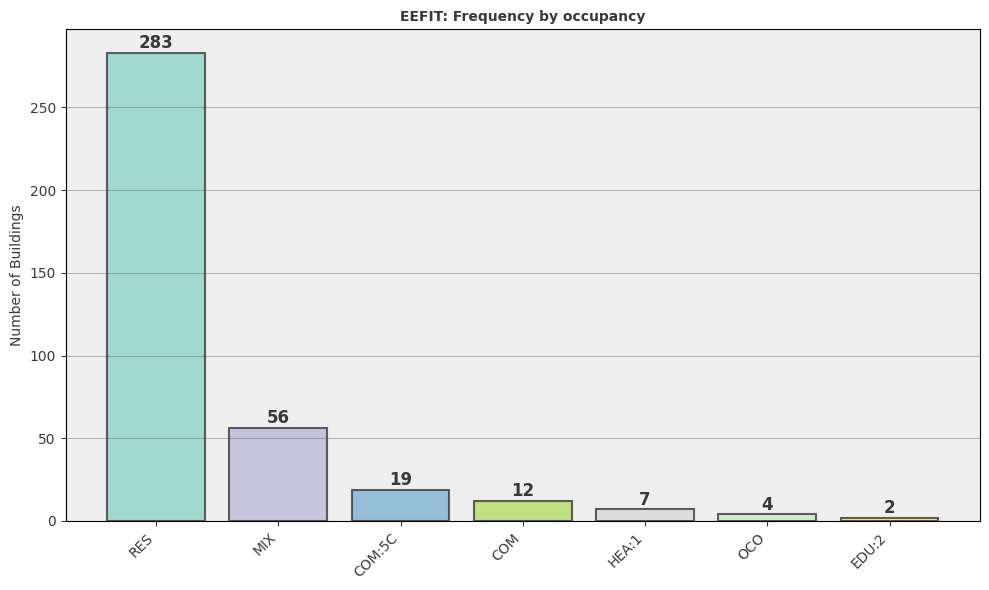

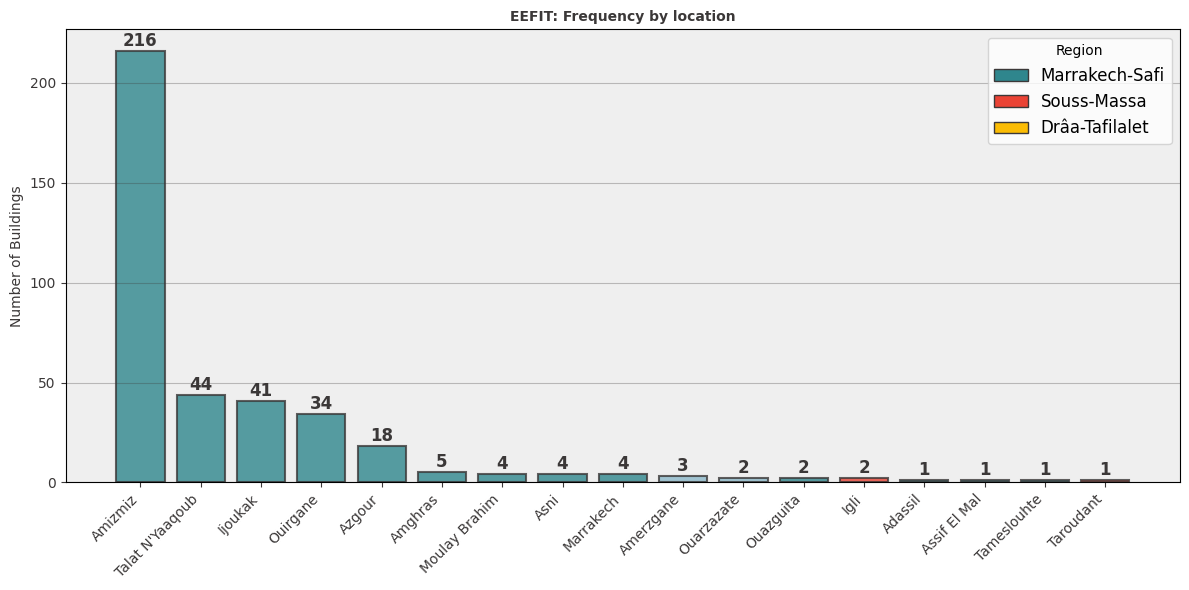

📊 EEFIT Occupancy types: 7
📊 EEFIT Locations: 17

2️⃣ EEFIT DATABASE - TAXONOMY PARAMETERS BY OCCUPANCY
----------------------------------------


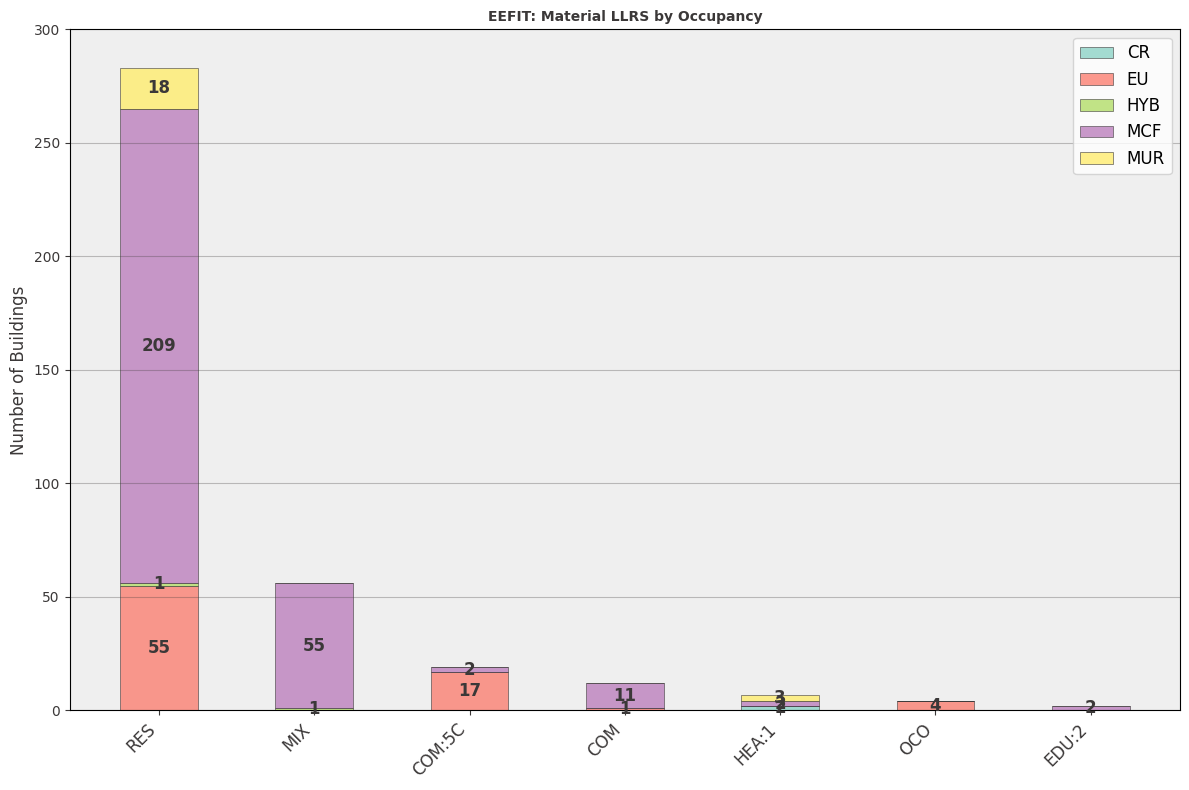

   ✅ Material LLRS: 5 categories across 7 occupancy types


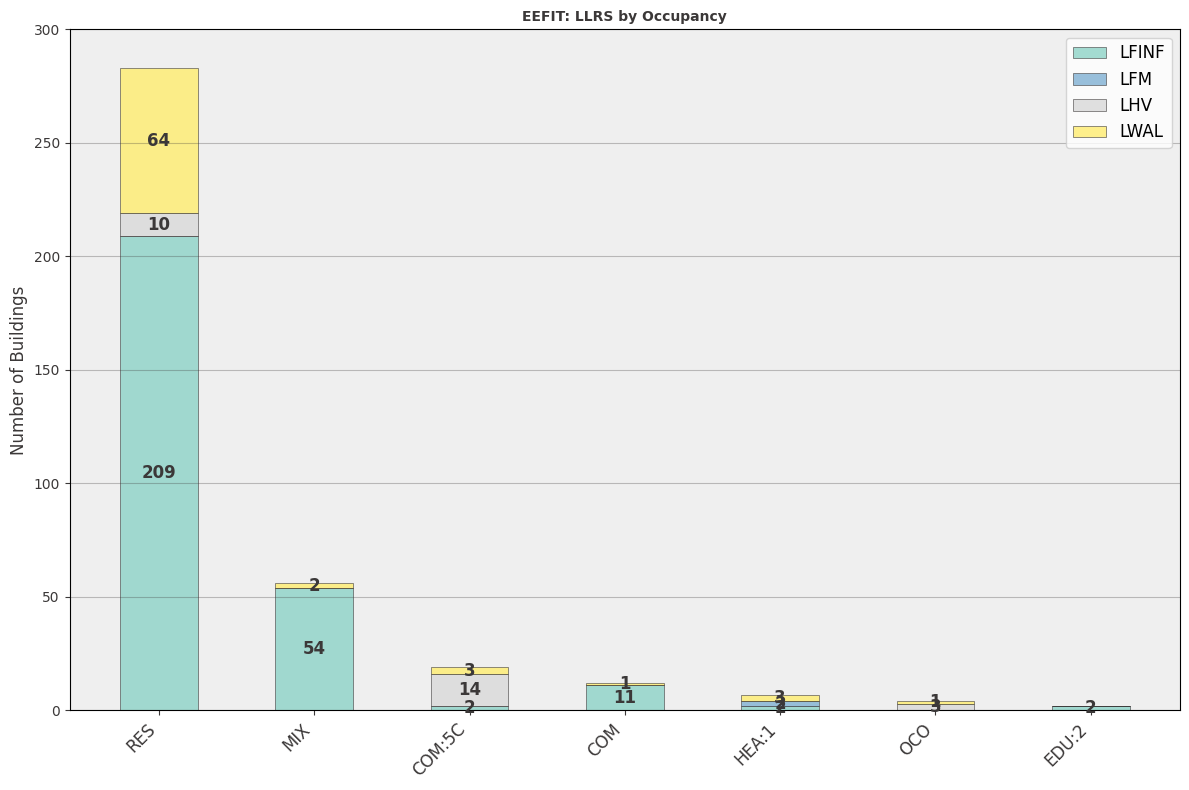

   ✅ LLRS: 4 categories across 7 occupancy types


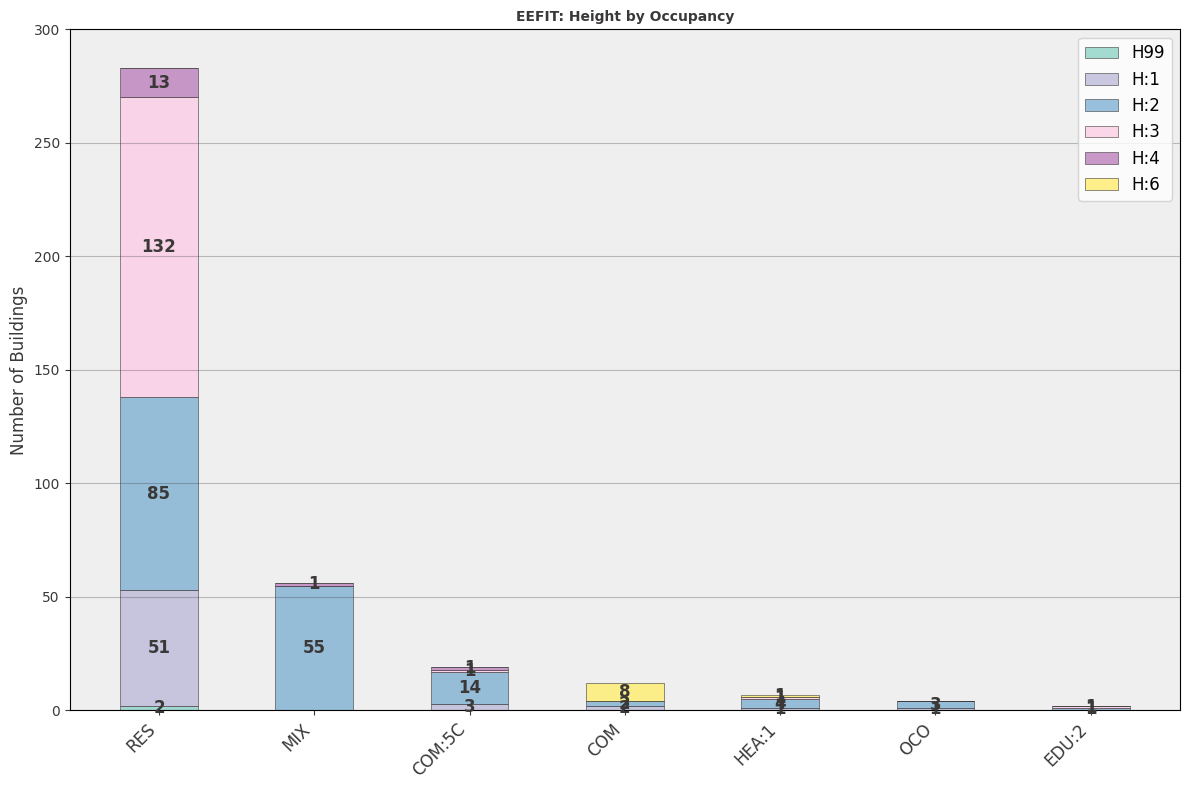

   ✅ Height: 6 categories across 7 occupancy types


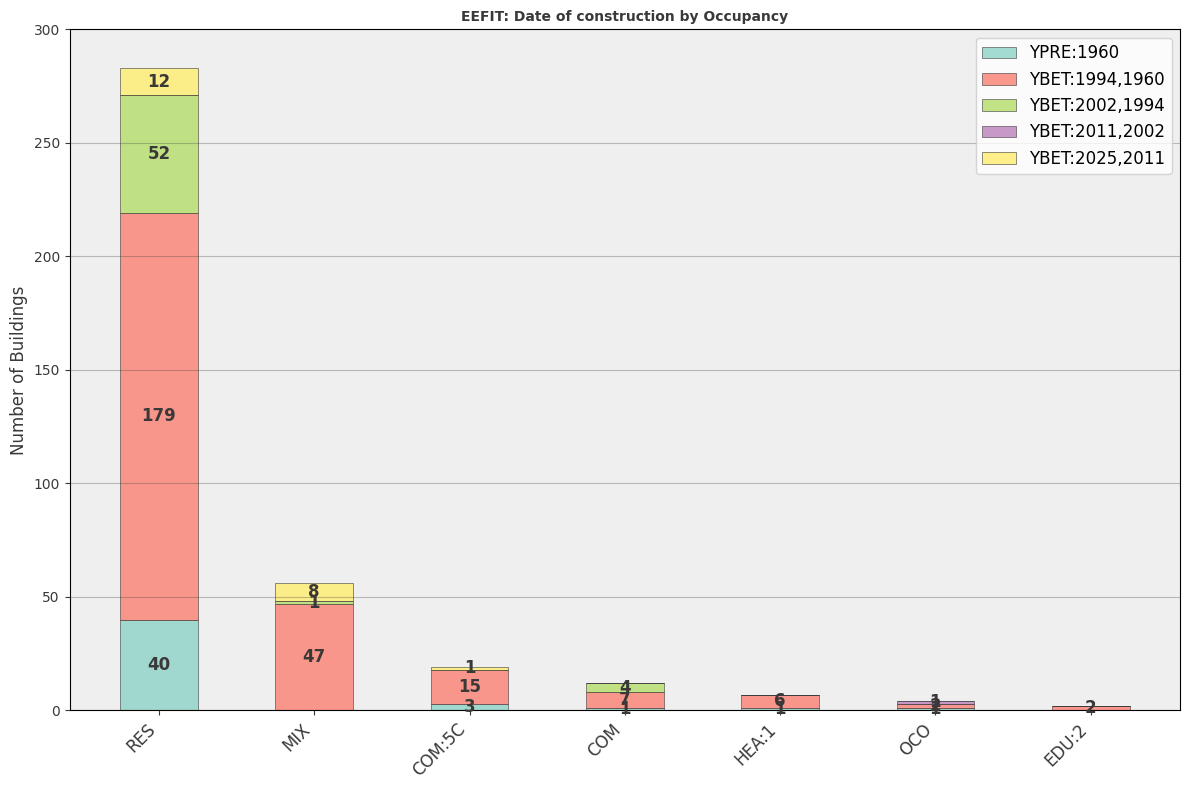

   ✅ Date of construction: 5 categories across 7 occupancy types


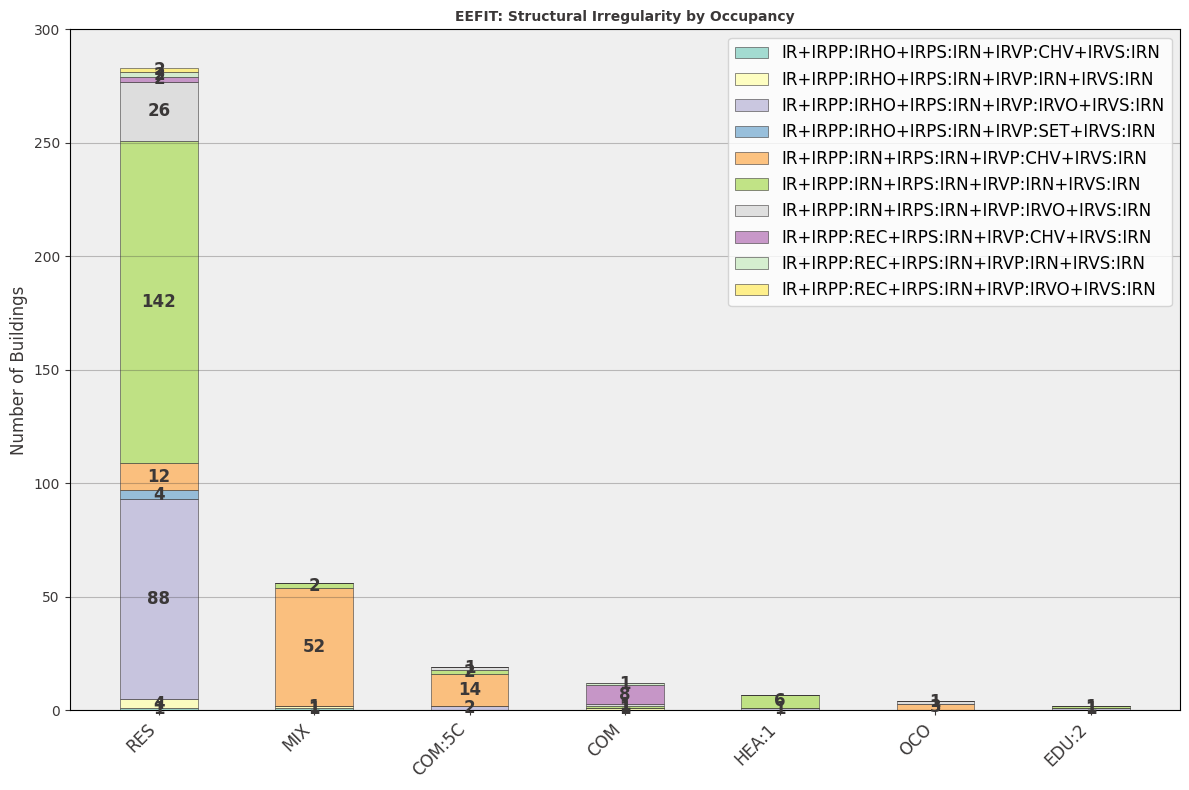

   ✅ Structural Irregularity: 10 categories across 7 occupancy types


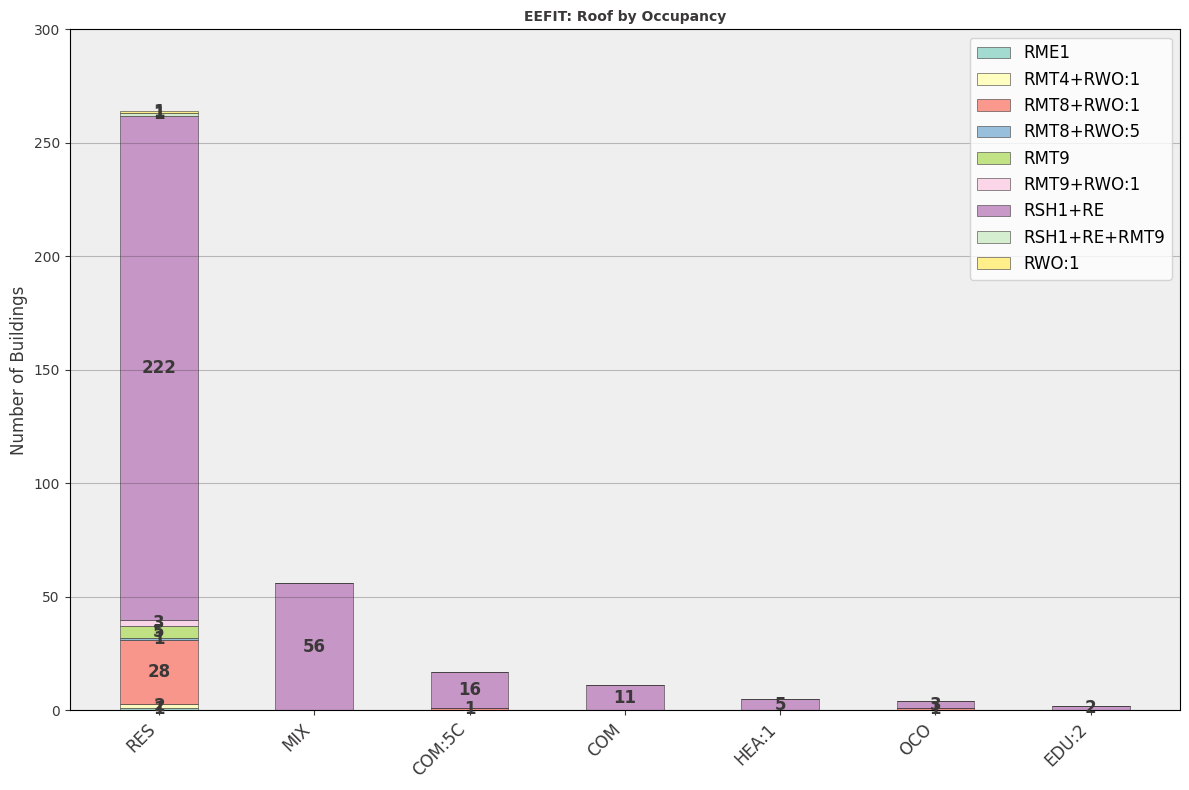

   ✅ Roof: 9 categories across 7 occupancy types

3️⃣ EEFIT DATABASE - OCCUPANCY DISTRIBUTION BY TAXONOMY PARAMETERS
----------------------------------------


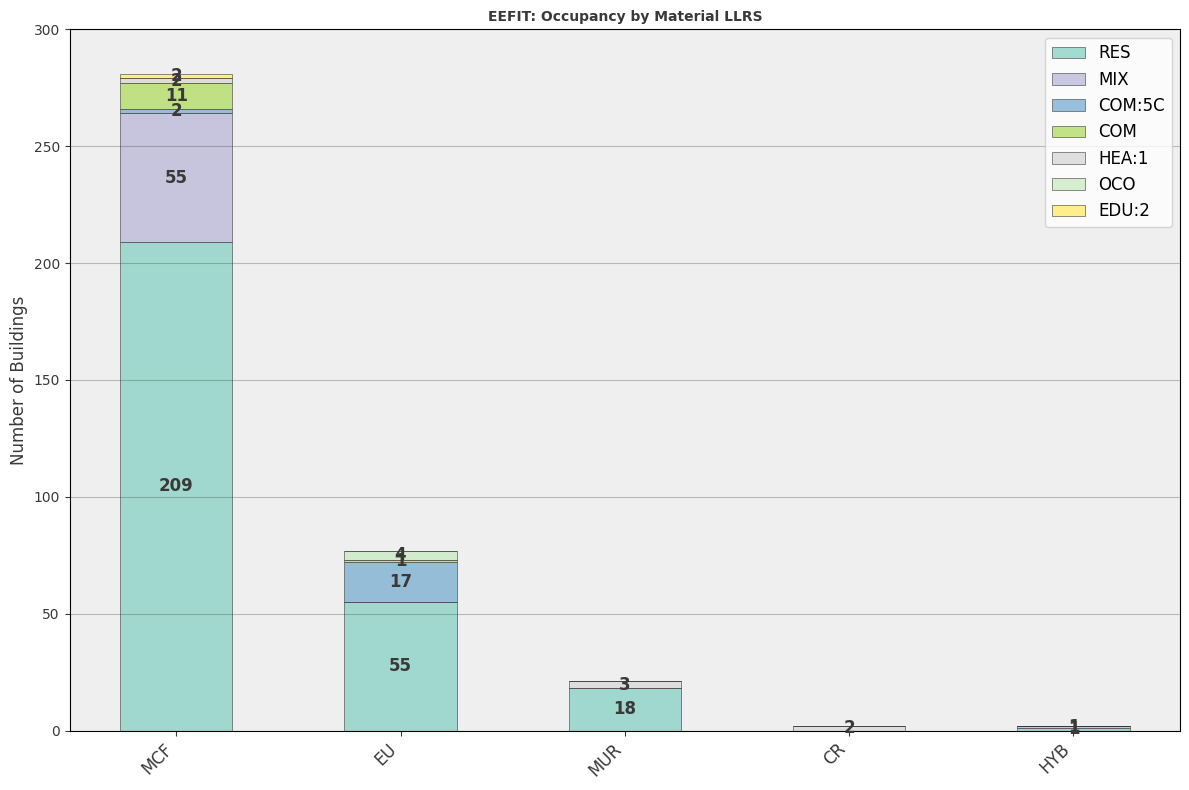

   ✅ Material LLRS: 5 categories with 7 occupancy types


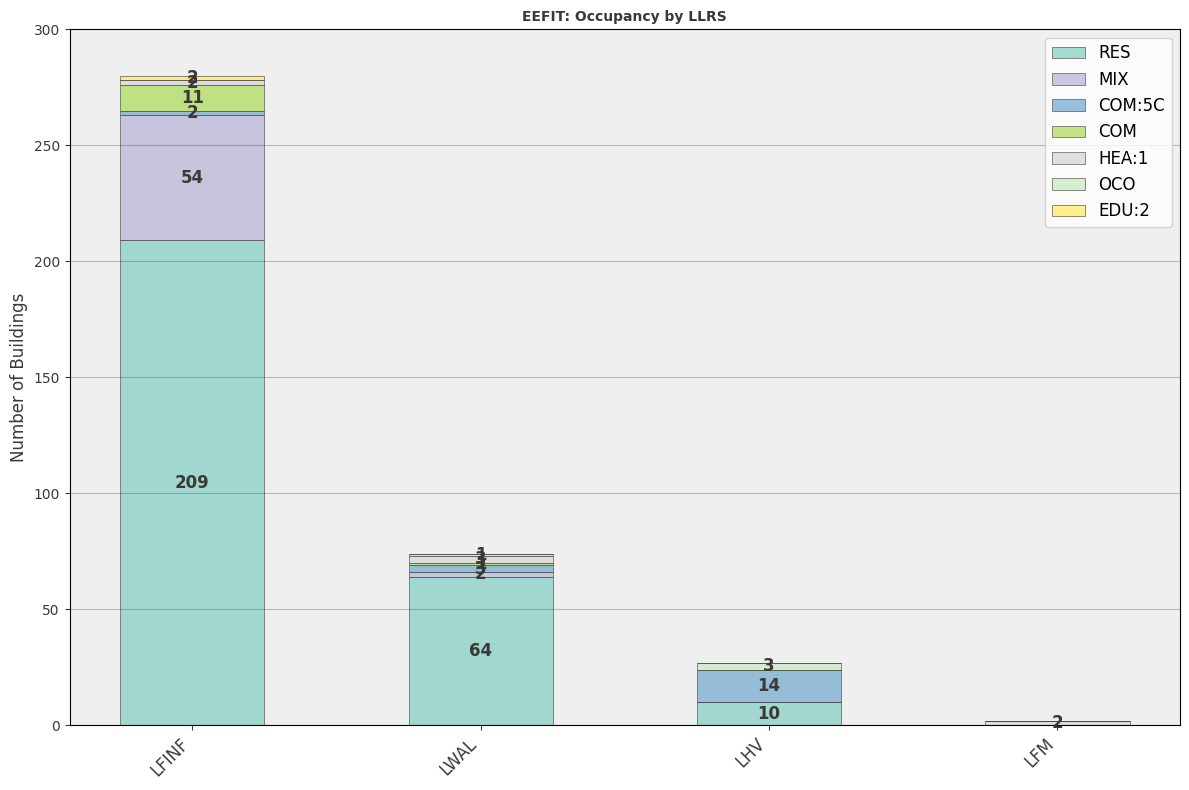

   ✅ LLRS: 4 categories with 7 occupancy types


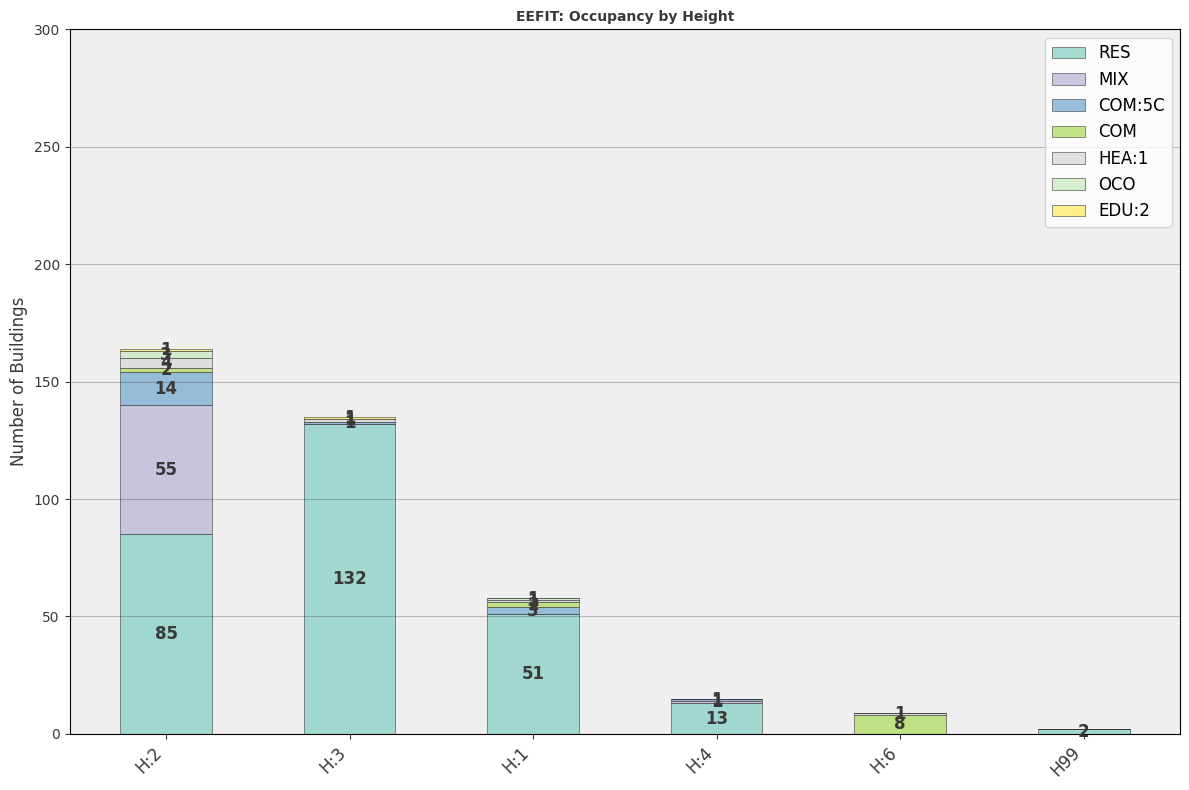

   ✅ Height: 6 categories with 7 occupancy types


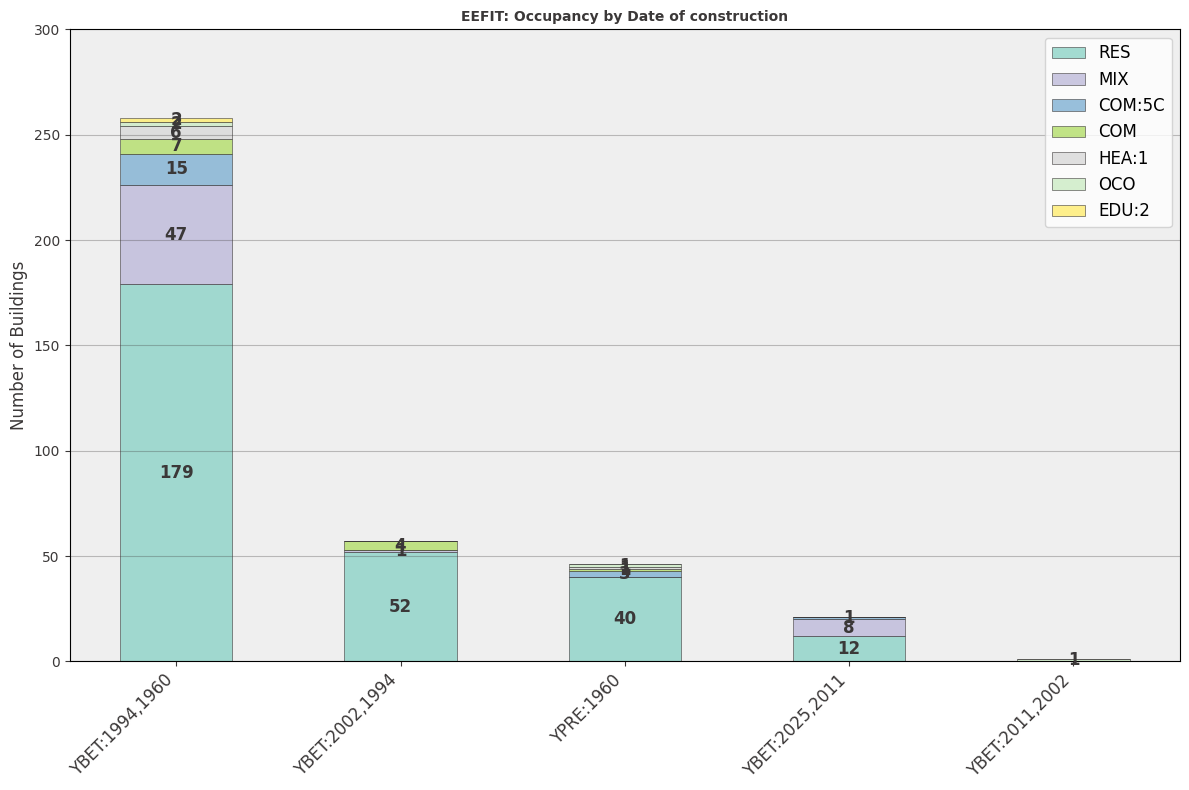

   ✅ Date of construction: 5 categories with 7 occupancy types

4️⃣ EEFIT DATABASE - EXPOSURE DATA SUMMARY
----------------------------------------
📊 Total EEFIT buildings: 383

📋 EEFIT Occupancy Distribution:
   RES: 283 buildings (73.9%)
   MIX: 56 buildings (14.6%)
   COM:5C: 19 buildings (5.0%)
   COM: 12 buildings (3.1%)
   HEA:1: 7 buildings (1.8%)
   OCO: 4 buildings (1.0%)
   EDU:2: 2 buildings (0.5%)

📋 EEFIT Location Distribution (by region):
   Marrakech-Safi: 375 buildings (97.9%)
     - Amizmiz: 216 buildings
     - Talat N'Yaaqoub: 44 buildings
     - Ijoukak: 41 buildings
     - Ouirgane: 34 buildings
     - Azgour: 18 buildings
     - ... and 8 more locations
   Souss-Massa: 3 buildings (0.8%)
     - Igli: 2 buildings
     - Taroudant: 1 buildings
   Drâa-Tafilalet: 0 buildings (0.0%)

📋 EEFIT Taxonomy parameters summary:
   Material LLRS:
     Categories: 5
     Most common: MCF (281 buildings, 73.4%)
   LLRS:
     Categories: 4
     Most common: LFINF (280 buildings, 

In [ ]:
print("📊 EEFIT DATABASE - DETAILED EXPOSURE DATA ANALYSIS")
print("=" * 50)

# Use EEFIT data for analysis (ID 1-383)
exposure_data = data['eefit_buildings'].copy()

# Define region colors
region_colors = {
    'Marrakech-Safi': '#2f868d',
    'Souss-Massa': '#ea4335',
    'Drâa-Tafilalet': '#fbbc04'  # Note the special character encoding
}

# Function to extract primary taxonomy
def extract_primary_taxonomy(data, column, taxonomy_type):
    """Extract primary taxonomy from complex taxonomy strings"""
    result = data[column].copy()

    if taxonomy_type == 'material':
        # For Material LLRS: CR, EU, MUR, HYB, MCF are primary
        primary_materials = ['CR', 'EU', 'MUR', 'HYB', 'MCF']
        for idx, value in enumerate(data[column]):
            if pd.isna(value):
                continue
            for material in primary_materials:
                if material in str(value):
                    result.iloc[idx] = material
                    break

    elif taxonomy_type == 'llrs':
        # For LLRS: LINF, LFM, LHV, LWAL are primary
        primary_llrs = ['LFINF', 'LFM', 'LHV', 'LWAL']  # Updated to include LFINF
        for idx, value in enumerate(data[column]):
            if pd.isna(value):
                continue
            for llrs in primary_llrs:
                if llrs in str(value):
                    result.iloc[idx] = llrs
                    break

    return result

# Define occupancy order based on frequency (RES first as most common)
occupancy_order = ['RES', 'MIX', 'COM:5C', 'COM', 'HEA:1', 'OCO', 'EDU:2']

# Create consistent occupancy colors
occupancy_counts = exposure_data['Occupancy'].value_counts()
n_occupancies = len(occupancy_counts)
occupancy_color_palette = plt.cm.Set3(np.linspace(0, 1, n_occupancies))

# Create occupancy color mapping preserving order
occupancy_colors = {}
ordered_occupancies = [occ for occ in occupancy_order if occ in occupancy_counts.index]
remaining_occupancies = [occ for occ in occupancy_counts.index if occ not in occupancy_order]
all_ordered_occupancies = ordered_occupancies + remaining_occupancies

for i, occ in enumerate(all_ordered_occupancies):
    occupancy_colors[occ] = occupancy_color_palette[i]

def create_frequency_plot(data, column, title, ax, use_region_colors=False, use_occupancy_colors=False, custom_order=None):
    """Create a frequency bar chart for a given column"""

    if column not in data.columns:
        ax.text(0.5, 0.5, f'{column}\nnot found in data', ha='center', va='center', transform=ax.transAxes)
        ax.set_title(title, fontsize=10, color=color_edge, weight='bold')
        return None

    # Get counts
    counts = data[column].value_counts()

    # Apply custom ordering if provided
    if custom_order:
        # Filter custom_order to existing categories and add remaining ones
        existing_categories = [cat for cat in custom_order if cat in counts.index]
        remaining_categories = [cat for cat in counts.index if cat not in custom_order]
        ordered_categories = existing_categories + remaining_categories
        counts = counts.reindex(ordered_categories)

    # Determine colors
    if use_region_colors:
        colors = []
        for location in counts.index:
            region = data[data[column] == location]['Region'].iloc[0] if len(data[data[column] == location]) > 0 else None
            colors.append(region_colors.get(region, color_main))
    elif use_occupancy_colors:
        colors = [occupancy_colors.get(occ, color_main) for occ in counts.index]
    else:
        colors = [color_main] * len(counts)

    # Create bar chart
    ax.set_facecolor(infill)
    bars = ax.bar(range(len(counts)), counts.values, color=colors,
                  alpha=0.8, edgecolor=color_edge, linewidth=1.5)

    ax.set_ylabel('Number of Buildings', fontsize=10, color=color_edge)
    ax.set_title(title, fontsize=10, color=color_edge, weight='bold')
    ax.set_xticks(range(len(counts)))
    ax.set_xticklabels(counts.index, rotation=45, ha='right', fontsize=10, color=color_edge)
    ax.grid(True, alpha=0.3, color=color_edge, axis='y')
    ax.tick_params(colors=color_edge)

    # Add value labels
    for i, bar in enumerate(bars):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{int(height)}', ha='center', va='bottom',
                fontsize=12, color=color_edge, weight='bold')

    return counts

def create_cross_frequency_plot(data, main_col, cross_col, title, ax, use_primary_taxonomy=False, use_stacked=False):
    """Create a grouped or stacked bar chart showing frequency of cross_col for each category in main_col"""

    if main_col not in data.columns or cross_col not in data.columns:
        ax.text(0.5, 0.5, f'Missing columns:\n{main_col} or {cross_col}', ha='center', va='center', transform=ax.transAxes)
        ax.set_title(title, fontsize=10, color=color_edge, weight='bold')
        return None

    # Prepare data with primary taxonomy if needed
    data_processed = data.copy()
    if use_primary_taxonomy:
        if main_col == 'Material LLRS':
            data_processed[main_col] = extract_primary_taxonomy(data, main_col, 'material')
        elif main_col == 'LLRS':
            data_processed[main_col] = extract_primary_taxonomy(data, main_col, 'llrs')
        elif cross_col == 'Material LLRS':
            data_processed[cross_col] = extract_primary_taxonomy(data, cross_col, 'material')
        elif cross_col == 'LLRS':
            data_processed[cross_col] = extract_primary_taxonomy(data, cross_col, 'llrs')

    # Create crosstab
    crosstab = pd.crosstab(data_processed[main_col], data_processed[cross_col])

    # Sort main categories by total frequency (most frequent on left)
    category_totals = crosstab.sum(axis=1).sort_values(ascending=False)
    crosstab = crosstab.reindex(category_totals.index)

    # Handle special ordering for cross column
    if cross_col == 'Date of construction':
        date_order = ['YPRE:1960', 'YBET:1994,1960', 'YBET:2002,1994', 'YBET:2011,2002', 'YBET:2025,2011']
        existing_dates = [date for date in date_order if date in crosstab.columns]
        unexpected_dates = [date for date in crosstab.columns if date not in date_order]
        new_order = existing_dates + unexpected_dates
        crosstab = crosstab.reindex(columns=new_order)
    elif cross_col == 'Occupancy':
        # Order occupancy types consistently
        ordered_occupancies = [occ for occ in occupancy_order if occ in crosstab.columns]
        remaining_occupancies = [occ for occ in crosstab.columns if occ not in occupancy_order]
        new_order = ordered_occupancies + remaining_occupancies
        crosstab = crosstab.reindex(columns=new_order)
    elif main_col == 'Occupancy':
        # For main column occupancy, still preserve the occupancy order but within frequency groups
        ordered_occupancies = [occ for occ in occupancy_order if occ in crosstab.index]
        remaining_occupancies = [occ for occ in crosstab.index if occ not in occupancy_order]
        new_order = ordered_occupancies + remaining_occupancies
        crosstab = crosstab.reindex(index=new_order)
        # But then sort by frequency
        category_totals = crosstab.sum(axis=1).sort_values(ascending=False)
        crosstab = crosstab.reindex(category_totals.index)
    elif main_col == 'Height' and 'H:99' in crosstab.index:
        # For height, after frequency sorting, move H:99 to the end if it exists
        index_list = crosstab.index.tolist()
        if 'H:99' in index_list:
            index_list.remove('H:99')
            index_list.append('H:99')
            crosstab = crosstab.reindex(index=index_list)

    # Create color palette for categories
    if cross_col == 'Occupancy':
        # Use consistent occupancy colors
        category_colors = [occupancy_colors.get(occ, color_main) for occ in crosstab.columns]
    else:
        category_colors = plt.cm.Set3(np.linspace(0, 1, len(crosstab.columns)))

    # Create bar chart
    ax.set_facecolor(infill)

    if use_stacked:
        # Create stacked bar chart
        bottom = np.zeros(len(crosstab.index))

        for i, (category, color) in enumerate(zip(crosstab.columns, category_colors)):
            # Get the values for this category
            values = crosstab[category].values

            # Create the bars
            bars = ax.bar(range(len(crosstab.index)), values, width = 0.5,
                         bottom=bottom, label=category, color=color, alpha=0.8,
                         edgecolor=color_edge, linewidth=0.5)

            # Add value labels in center of each bar segment (only for values > 0)
            for j, value in enumerate(values):
                if value > 0:
                    y_pos = bottom[j] + value / 2
                    ax.text(j, y_pos, f'{int(value)}', ha='center', va='center',
                            fontsize=12, color=color_edge,
                            weight='bold')

            # Update bottom for next iteration
            bottom = bottom + values
    else:
        # Create grouped bar chart (original functionality)
        n_groups = len(crosstab.index)
        n_bars = len(crosstab.columns)
        bar_width = 0.5

        # Create bars for each category
        for i, (category, color) in enumerate(zip(crosstab.columns, category_colors)):
            positions = np.arange(n_groups) + i * bar_width - (n_bars - 1) * bar_width / 2
            bars = ax.bar(positions, crosstab[category].values, bar_width,
                          label=category, color=color, alpha=0.8,
                          edgecolor=color_edge, linewidth=0.5)

            # Add value labels (only for bars > 0)
            for j, bar in enumerate(bars):
                height = bar.get_height()
                if height > 0:
                    ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                            f'{int(height)}', ha='center', va='bottom',
                            fontsize=10, color=color_edge, weight='bold')

    ax.set_ylabel('Number of Buildings', fontsize=12, color=color_edge)
    ax.set_title(title, fontsize=10, color=color_edge, weight='bold')
    ax.set_xticks(range(len(crosstab.index)))
    ax.set_ylim(0,300)
    ax.set_xticklabels(crosstab.index, rotation=45, ha='right', fontsize=12, color=color_edge)
    ax.grid(True, alpha=0.3, color=color_edge, axis='y')
    ax.tick_params(colors=color_edge)

    # Add legend
    ax.legend(bbox_to_anchor=(1.00, 1), loc='upper right', fontsize=12)

    return crosstab

# 1. INDIVIDUAL PLOTS - Basic frequency plots
print("\n1️⃣ EEFIT DATABASE - BASIC FREQUENCY DISTRIBUTIONS")
print("-" * 40)

# Plot 1: Frequency by occupancy (individual plot)
fig1, ax1 = plt.subplots(1, 1, figsize=(10, 6))
fig1.patch.set_facecolor('white')

occupancy_counts = create_frequency_plot(exposure_data, 'Occupancy', 'EEFIT: Frequency by occupancy',
                                       ax1, use_occupancy_colors=True, custom_order=occupancy_order)
plt.tight_layout()
plt.show()

# Plot 2: Frequency by location (individual plot)
fig2, ax2 = plt.subplots(1, 1, figsize=(12, 6))
fig2.patch.set_facecolor('white')

location_counts = create_frequency_plot(exposure_data, 'Location', 'EEFIT: Frequency by location',
                                      ax2, use_region_colors=True)

# Add legend for region colors
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=color, edgecolor=color_edge, label=region)
                   for region, color in region_colors.items()]
ax2.legend(handles=legend_elements, title='Region', loc='upper right', fontsize=12)

plt.tight_layout()
plt.show()

if occupancy_counts is not None:
    print(f"📊 EEFIT Occupancy types: {len(occupancy_counts)}")
if location_counts is not None:
    print(f"📊 EEFIT Locations: {len(location_counts)}")

# 2. Taxonomy parameters by occupancy (individual plots)
print("\n2️⃣ EEFIT DATABASE - TAXONOMY PARAMETERS BY OCCUPANCY")
print("-" * 40)

building_characteristics = [
    'Material LLRS',
    'LLRS',
    'Height',
    'Date of construction',
    'Structural Irregularity',
    'Roof'
]

for i, characteristic in enumerate(building_characteristics):
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    fig.patch.set_facecolor('white')

    title = f'EEFIT: {characteristic} by Occupancy'
    use_primary = characteristic in ['Material LLRS', 'LLRS']

    crosstab = create_cross_frequency_plot(exposure_data, 'Occupancy', characteristic, title, ax,
                                         use_primary_taxonomy=use_primary, use_stacked=True)

    plt.tight_layout()
    plt.show()

    if crosstab is not None:
        print(f"   ✅ {characteristic}: {len(crosstab.columns)} categories across {len(crosstab.index)} occupancy types")
    else:
        print(f"   ❌ {characteristic}: Not found in data")

# 3. Occupancy by taxonomy parameters (individual plots)
print("\n3️⃣ EEFIT DATABASE - OCCUPANCY DISTRIBUTION BY TAXONOMY PARAMETERS")
print("-" * 40)

key_characteristics = ['Material LLRS', 'LLRS', 'Height', 'Date of construction']

for i, characteristic in enumerate(key_characteristics):
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    fig.patch.set_facecolor('white')

    title = f'EEFIT: Occupancy by {characteristic}'
    use_primary = characteristic in ['Material LLRS', 'LLRS']

    crosstab = create_cross_frequency_plot(exposure_data, characteristic, 'Occupancy', title, ax,
                                         use_primary_taxonomy=use_primary, use_stacked=True)

    plt.tight_layout()
    plt.show()

    if crosstab is not None:
        print(f"   ✅ {characteristic}: {len(crosstab.index)} categories with {len(crosstab.columns)} occupancy types")
    else:
        print(f"   ❌ {characteristic}: Not found in data")

# 4. Summary statistics
print("\n4️⃣ EEFIT DATABASE - EXPOSURE DATA SUMMARY")
print("-" * 40)

total_buildings = len(exposure_data)
print(f"📊 Total EEFIT buildings: {total_buildings}")

# Occupancy summary
if occupancy_counts is not None:
    print(f"\n📋 EEFIT Occupancy Distribution:")
    for occ, count in occupancy_counts.items():
        percentage = (count / total_buildings * 100)
        print(f"   {occ}: {count} buildings ({percentage:.1f}%)")

# Location summary
if location_counts is not None:
    print(f"\n📋 EEFIT Location Distribution (by region):")
    for region, color in region_colors.items():
        region_locations = exposure_data[exposure_data['Region'] == region]['Location'].value_counts()
        region_total = region_locations.sum()
        percentage = (region_total / total_buildings * 100)
        print(f"   {region}: {region_total} buildings ({percentage:.1f}%)")
        for loc, count in region_locations.head(5).items():
            print(f"     - {loc}: {count} buildings")
        if len(region_locations) > 5:
            remaining = len(region_locations) - 5
            print(f"     - ... and {remaining} more locations")

# Taxonomy parameters summary (using primary taxonomy for Material LLRS and LLRS)
print(f"\n📋 EEFIT Taxonomy parameters summary:")
for characteristic in building_characteristics:
    if characteristic in exposure_data.columns:
        if characteristic in ['Material LLRS', 'LLRS']:
            # Use primary taxonomy
            taxonomy_type = 'material' if characteristic == 'Material LLRS' else 'llrs'
            processed_data = extract_primary_taxonomy(exposure_data, characteristic, taxonomy_type)
            unique_values = processed_data.nunique()
            most_common = processed_data.mode().iloc[0] if len(processed_data.mode()) > 0 else 'N/A'
            most_common_count = processed_data.value_counts().iloc[0] if len(processed_data.value_counts()) > 0 else 0
        else:
            unique_values = exposure_data[characteristic].nunique()
            most_common = exposure_data[characteristic].mode().iloc[0] if len(exposure_data[characteristic].mode()) > 0 else 'N/A'
            most_common_count = exposure_data[characteristic].value_counts().iloc[0] if len(exposure_data[characteristic].value_counts()) > 0 else 0

        most_common_pct = (most_common_count / total_buildings * 100)

        print(f"   {characteristic}:")
        print(f"     Categories: {unique_values}")
        print(f"     Most common: {most_common} ({most_common_count} buildings, {most_common_pct:.1f}%)")

print(f"\n✅ EEFIT DATABASE - DETAILED EXPOSURE ANALYSIS COMPLETE!")
print("=" * 50)

### DAMAGE GRADE DISTRIBUTION

📊 DAMAGE GRADE DISTRIBUTION ANALYSIS
Total buildings assessed: 383
Damage grade distribution:
  DG1: 202 buildings ( 52.7%)
  DG2:  30 buildings (  7.8%)
  DG3:  84 buildings ( 21.9%)
  DG4:  25 buildings (  6.5%)
  DG5:  42 buildings ( 11.0%)


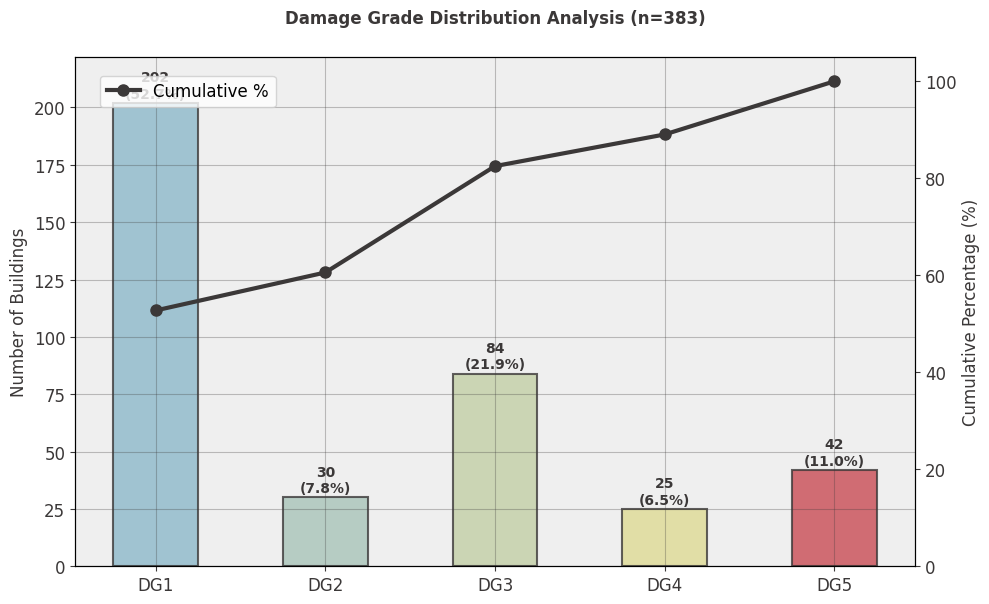


📊 Key Insights:
• Most common damage: DG1 (52.7%)
• Light damage (DG1-DG2): 232 buildings (60.6%)
• Heavy damage (DG4-DG5): 67 buildings (17.5%)
• All damage grades have sufficient sample sizes for analysis

✅ BASIC DAMAGE GRADE VISUALIZATION COMPLETE!
📊 STRATIFIED DAMAGE GRADE ANALYSIS
Analyzing damage distribution by taxonomy parameters...

Analyzing: Material LLRS
📊 5 total categories found


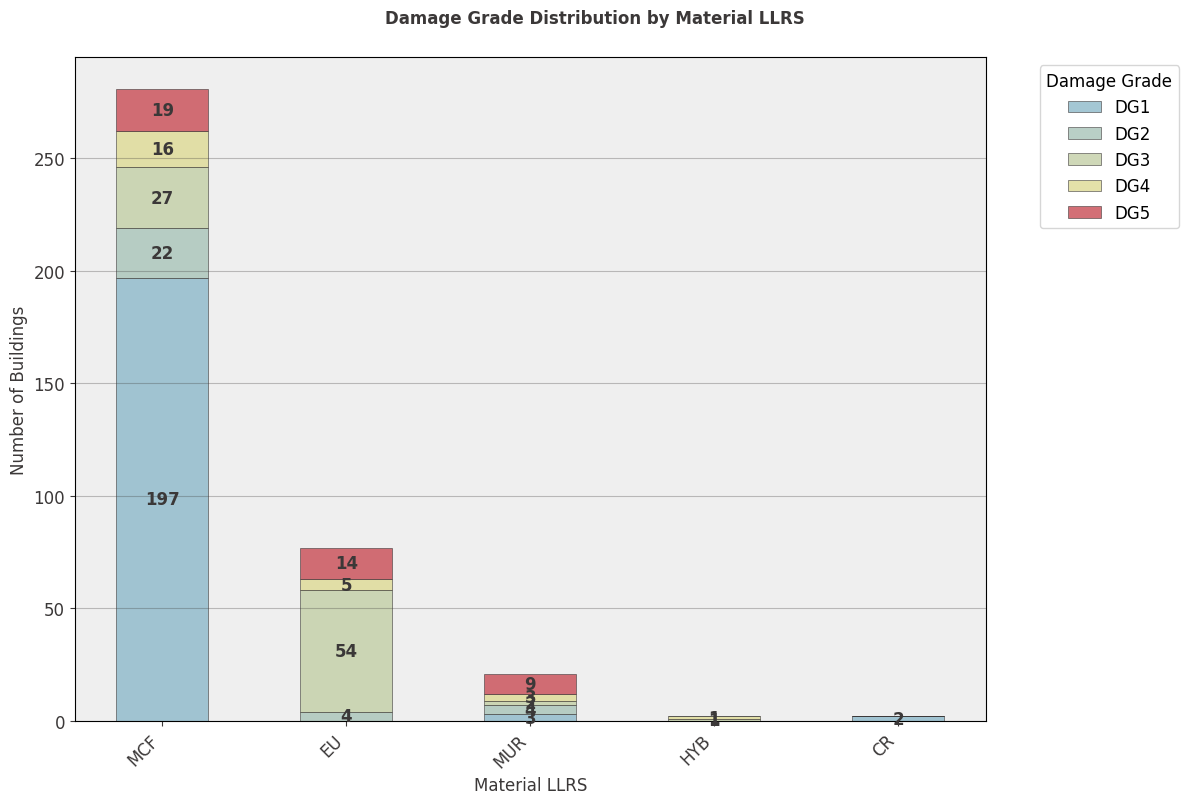

📋 Material LLRS Summary:
  MCF: 281 buildings, most common damage = DG1
  EU: 77 buildings, most common damage = DG3
  MUR: 21 buildings, most common damage = DG5
  HYB: 2 buildings, most common damage = DG3
  CR: 2 buildings, most common damage = DG1

Analyzing: LLRS
📊 4 total categories found


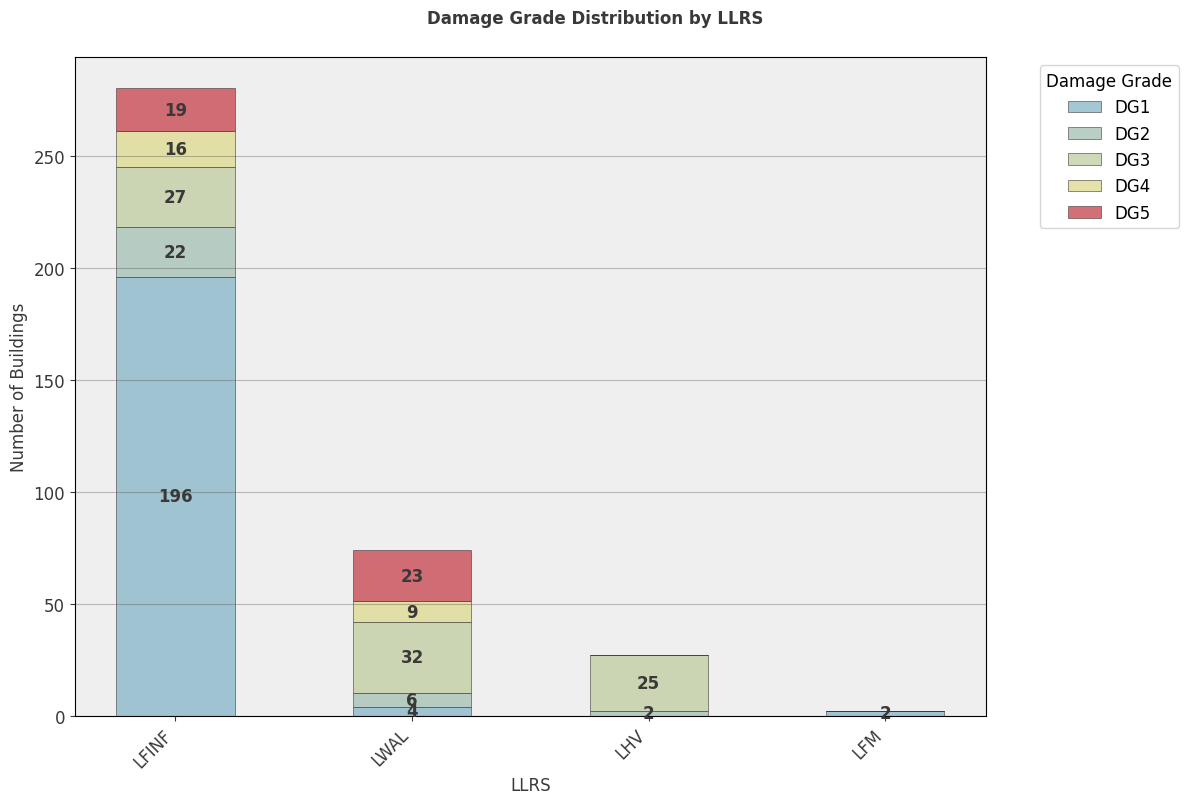

📋 LLRS Summary:
  LFINF: 280 buildings, most common damage = DG1
  LWAL: 74 buildings, most common damage = DG3
  LHV: 27 buildings, most common damage = DG3
  LFM: 2 buildings, most common damage = DG1

Analyzing: Height
📊 6 total categories found


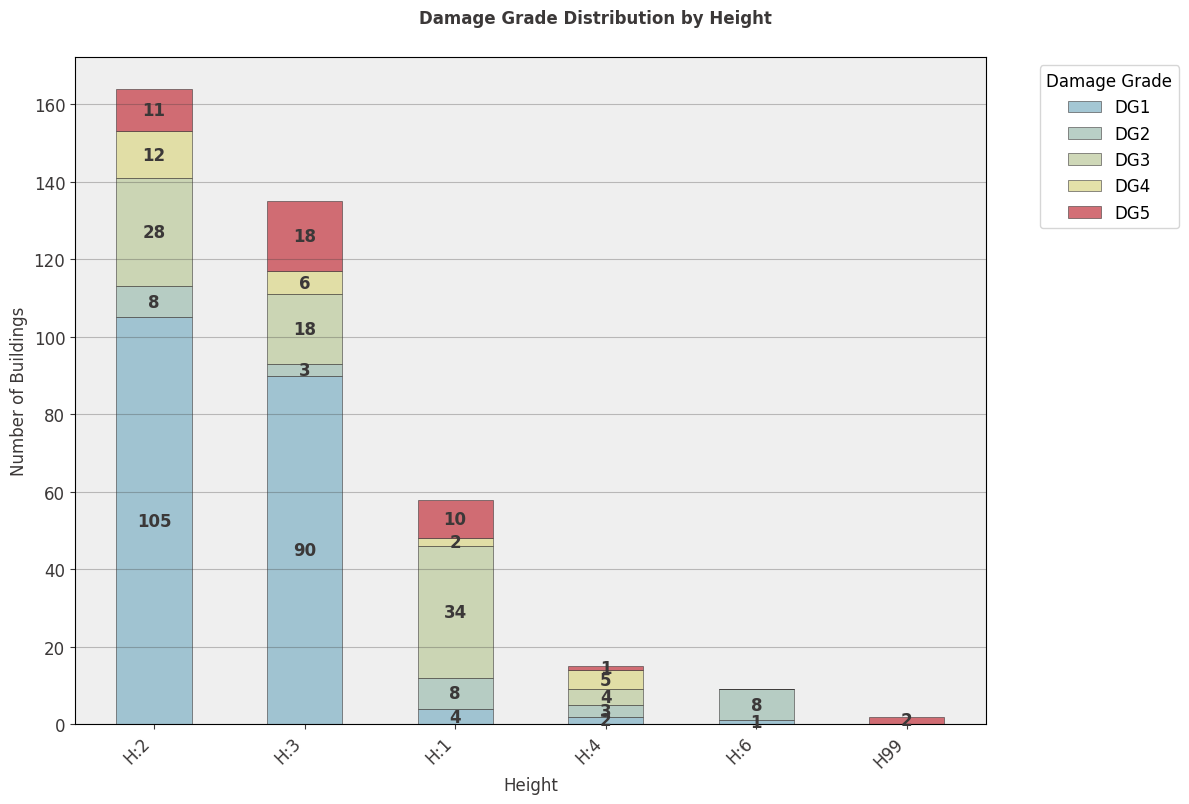

📋 Height Summary:
  H:2: 164 buildings, most common damage = DG1
  H:3: 135 buildings, most common damage = DG1
  H:1: 58 buildings, most common damage = DG3
  H:4: 15 buildings, most common damage = DG4
  H:6: 9 buildings, most common damage = DG2
  H99: 2 buildings, most common damage = DG5

Analyzing: Date of construction
📊 5 total categories found


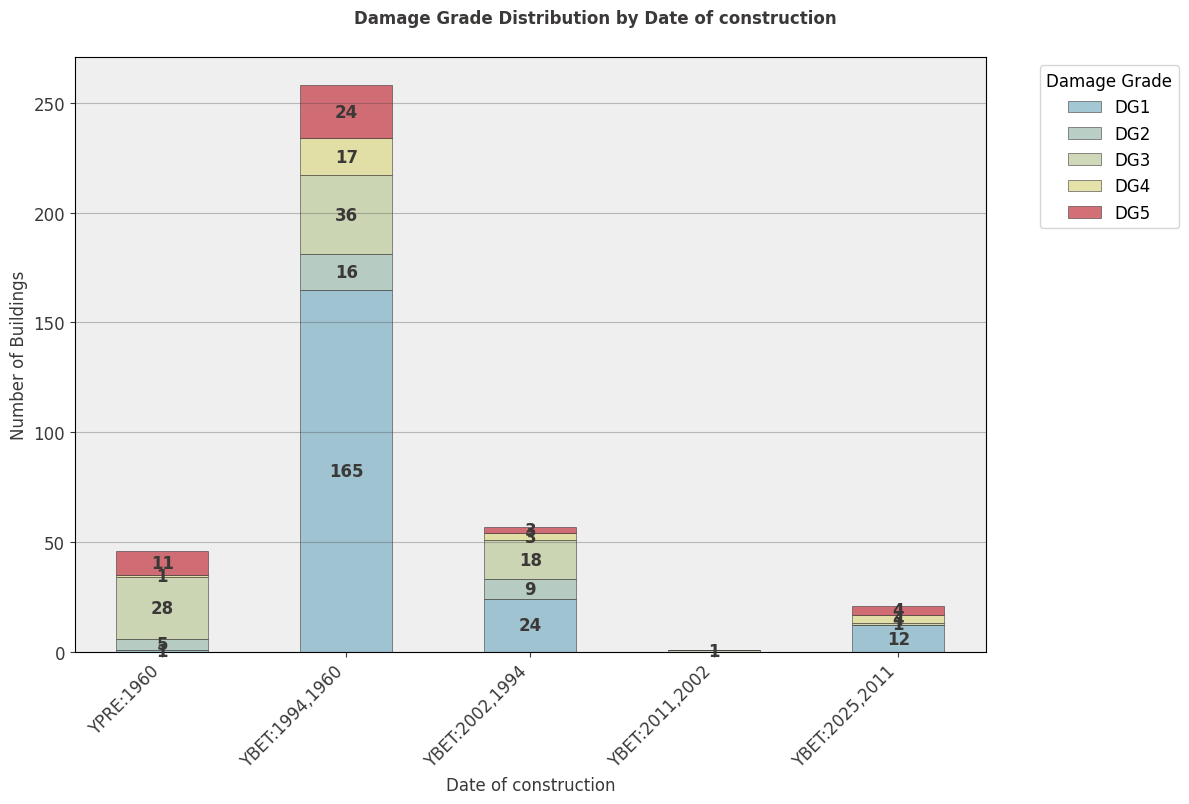

📋 Date of construction Summary:
  YPRE:1960: 46 buildings, most common damage = DG3
  YBET:1994,1960: 258 buildings, most common damage = DG1
  YBET:2002,1994: 57 buildings, most common damage = DG1
  YBET:2011,2002: 1 buildings, most common damage = DG3
  YBET:2025,2011: 21 buildings, most common damage = DG1

Analyzing: Occupancy
📊 7 total categories found


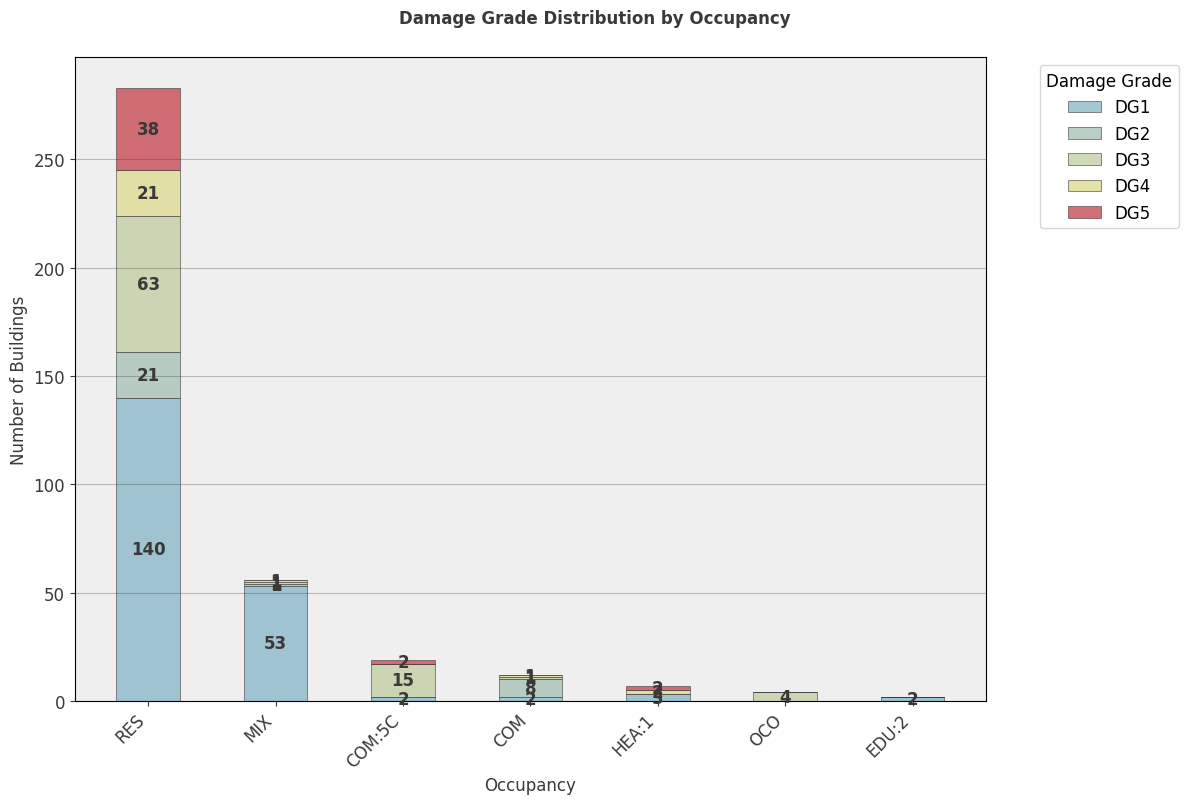

📋 Occupancy Summary:
  RES: 283 buildings, most common damage = DG1
  MIX: 56 buildings, most common damage = DG1
  COM:5C: 19 buildings, most common damage = DG3
  COM: 12 buildings, most common damage = DG2
  HEA:1: 7 buildings, most common damage = DG1
  OCO: 4 buildings, most common damage = DG3
  EDU:2: 2 buildings, most common damage = DG1

Analyzing: Structural Irregularity
📊 10 total categories found


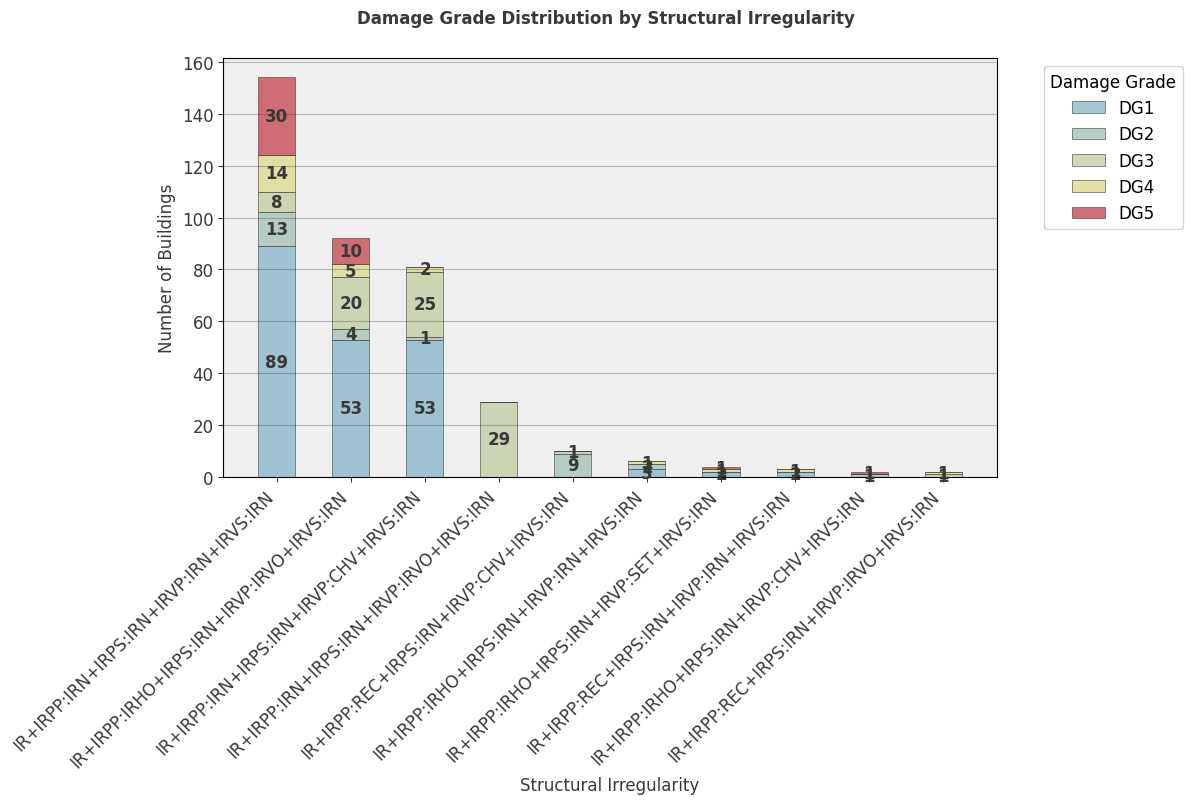

📋 Structural Irregularity Summary:
  IR+IRPP:IRN+IRPS:IRN+IRVP:IRN+IRVS:IRN: 154 buildings, most common damage = DG1
  IR+IRPP:IRHO+IRPS:IRN+IRVP:IRVO+IRVS:IRN: 92 buildings, most common damage = DG1
  IR+IRPP:IRN+IRPS:IRN+IRVP:CHV+IRVS:IRN: 81 buildings, most common damage = DG1
  IR+IRPP:IRN+IRPS:IRN+IRVP:IRVO+IRVS:IRN: 29 buildings, most common damage = DG3
  IR+IRPP:REC+IRPS:IRN+IRVP:CHV+IRVS:IRN: 10 buildings, most common damage = DG2
  IR+IRPP:IRHO+IRPS:IRN+IRVP:IRN+IRVS:IRN: 6 buildings, most common damage = DG1
  IR+IRPP:IRHO+IRPS:IRN+IRVP:SET+IRVS:IRN: 4 buildings, most common damage = DG1
  IR+IRPP:REC+IRPS:IRN+IRVP:IRN+IRVS:IRN: 3 buildings, most common damage = DG1
  IR+IRPP:IRHO+IRPS:IRN+IRVP:CHV+IRVS:IRN: 2 buildings, most common damage = DG2
  IR+IRPP:REC+IRPS:IRN+IRVP:IRVO+IRVS:IRN: 2 buildings, most common damage = DG3

Analyzing: Roof
📊 9 total categories found


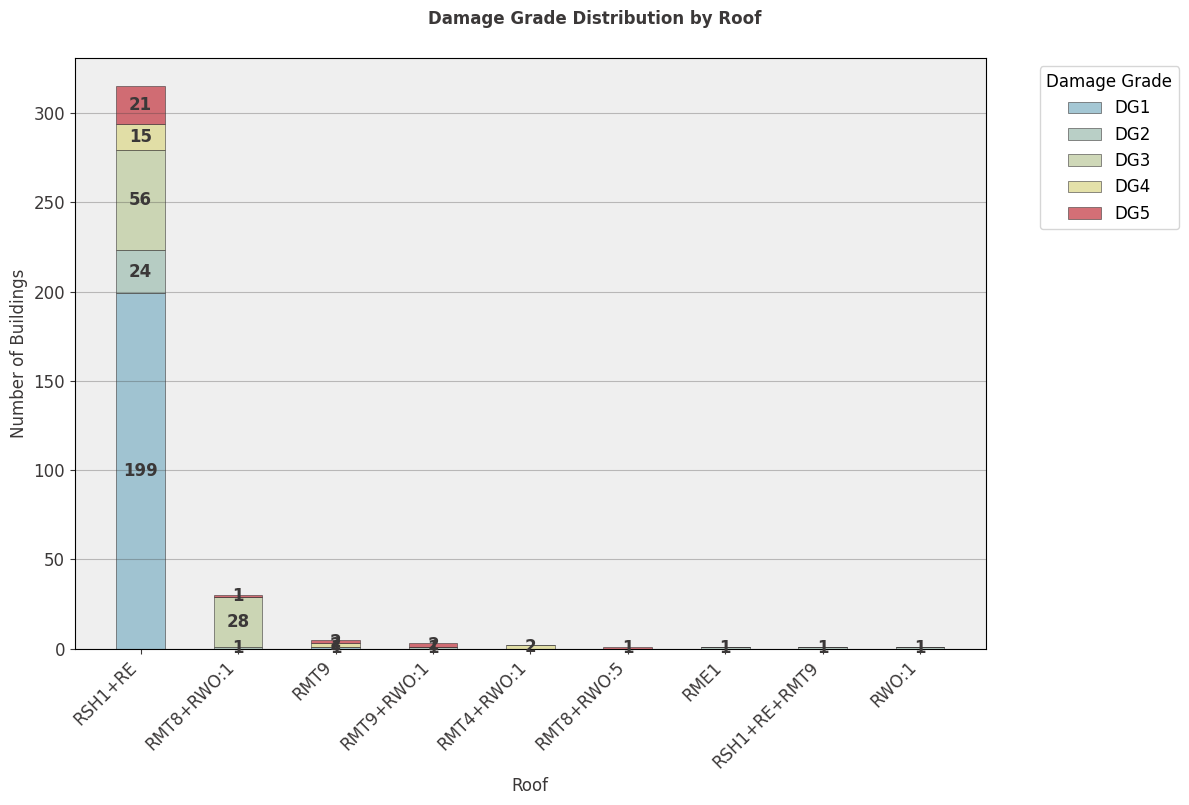

📋 Roof Summary:
  RSH1+RE: 315 buildings, most common damage = DG1
  RMT8+RWO:1: 30 buildings, most common damage = DG3
  RMT9: 5 buildings, most common damage = DG4
  RMT9+RWO:1: 3 buildings, most common damage = DG5
  RMT4+RWO:1: 2 buildings, most common damage = DG4
  RMT8+RWO:5: 1 buildings, most common damage = DG5
  RME1: 1 buildings, most common damage = DG2
  RSH1+RE+RMT9: 1 buildings, most common damage = DG2
  RWO:1: 1 buildings, most common damage = DG2

🎯 KEY INSIGHTS
📊 Parameters analyzed: 7

📈 Material LLRS:
   Total buildings analyzed: 383
   Most DG5 damage: MCF (19 buildings)
   Least DG5 damage: HYB (0 buildings)

📈 LLRS:
   Total buildings analyzed: 383
   Most DG5 damage: LWAL (23 buildings)
   Least DG5 damage: LHV (0 buildings)

📈 Height:
   Total buildings analyzed: 383
   Most DG5 damage: H:3 (18 buildings)
   Least DG5 damage: H:6 (0 buildings)

📈 Date of construction:
   Total buildings analyzed: 383
   Most DG5 damage: YBET:1994,1960 (24 buildings)
   Least D

In [ ]:
print("📊 DAMAGE GRADE DISTRIBUTION ANALYSIS")
print("=" * 50)

# Extract and clean damage grade data from EEFIT buildings
damage_data = data['eefit_buildings']['DG'].str.strip()
damage_counts = damage_data.value_counts().sort_index()
damage_percentages = (damage_counts / len(damage_data) * 100).round(1)

# Print summary
print(f"Total buildings assessed: {len(damage_data)}")
print("Damage grade distribution:")
for dg, count in damage_counts.items():
    print(f"  {dg}: {count:3d} buildings ({damage_percentages[dg]:5.1f}%)")

# Create plot
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
fig.patch.set_facecolor('white')
fig.suptitle('Damage Grade Distribution Analysis (n=383)',
             fontsize=12, color=color_edge, weight='bold', y=1.0)

# Plot: Frequency bars with damage grade color progression
ax.set_facecolor(infill)

# Get colors for each damage grade
bar_colors = [damage_colors.get(dg, color_main) for dg in damage_counts.index]

bars = ax.bar(range(len(damage_counts)), damage_counts.values,
               color=bar_colors, alpha=0.8, edgecolor=color_edge, linewidth=1.5, width=0.5)

ax.set_ylabel('Number of Buildings', fontsize=12, color=color_edge)
ax.set_xticks(range(len(damage_counts)))
ax.set_xticklabels(damage_counts.index, fontsize=12, color=color_edge)
ax.grid(True, alpha=0.3, color=color_edge)
ax.tick_params(colors=color_edge, labelsize=12)
ax.set_ylim(0, max(damage_counts.values) + 20)

# Add value labels
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{damage_counts.iloc[i]}\n({damage_percentages.iloc[i]}%)',
             ha='center', va='bottom', fontsize=10, color=color_edge, weight='bold')

# Add cumulative percentage line on secondary y-axis
cumulative_pct = (damage_counts.cumsum() / len(damage_data) * 100)
ax2 = ax.twinx()
line = ax2.plot(range(len(damage_counts)), cumulative_pct.values,
                'o-', linewidth=3, markersize=8, color=color_edge,
                markerfacecolor=color_edge, markeredgecolor=color_edge,
                label='Cumulative %')
ax2.set_ylabel('Cumulative Percentage (%)', fontsize=12, color=color_edge)
ax2.set_ylim(0, 105)
ax2.tick_params(colors=color_edge, labelsize=12)

# Add legend for the line
ax2.legend(loc='upper left', bbox_to_anchor=(0.02, 0.98), fontsize=12)

plt.tight_layout()
plt.show()

# Quick statistics
most_common = damage_counts.idxmax()
light_damage = damage_counts.get('DG1', 0) + damage_counts.get('DG2', 0)
heavy_damage = damage_counts.get('DG4', 0) + damage_counts.get('DG5', 0)

print(f"\n📊 Key Insights:")
print(f"• Most common damage: {most_common} ({damage_percentages[most_common]}%)")
print(f"• Light damage (DG1-DG2): {light_damage} buildings ({light_damage/len(damage_data)*100:.1f}%)")
print(f"• Heavy damage (DG4-DG5): {heavy_damage} buildings ({heavy_damage/len(damage_data)*100:.1f}%)")
print(f"• All damage grades have sufficient sample sizes for analysis")

print(f"\n✅ BASIC DAMAGE GRADE VISUALIZATION COMPLETE!")
print("=" * 50)

"""### DAMAGE GRADE DISTRIBUTION STRATIFIED BY TAXONOMY PARAMETERS"""

# Damage Grade Distribution Stratified by taxonomy parameters
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

print("📊 STRATIFIED DAMAGE GRADE ANALYSIS")
print("=" * 50)

# Prepare damage data with numeric conversion for analysis
damage_analysis_data = data['eefit_buildings'].copy()
damage_analysis_data['DG'] = damage_analysis_data['DG'].str.strip()
damage_analysis_data['DG_numeric'] = damage_analysis_data['DG'].str.extract('(\d+)').astype(int)

# Define Taxonomy parameters to analyze
building_params = [
    'Material LLRS',
    'LLRS',
    'Height',
    'Date of construction',
    'Occupancy',
    'Structural Irregularity',
    'Roof'
]

# Function to create stratified damage plot for each parameter
def plot_stratified_damage(param_name):
    """Create damage distribution plot stratified by building parameter"""

    print(f"\nAnalyzing: {param_name}")

    # Handle primary taxonomy extraction if needed
    if param_name in ['Material LLRS', 'LLRS']:
        # Use the same primary taxonomy extraction function
        taxonomy_type = 'material' if param_name == 'Material LLRS' else 'llrs'
        processed_param_data = extract_primary_taxonomy(damage_analysis_data, param_name, taxonomy_type)
        param_counts = processed_param_data.value_counts()
    else:
        param_counts = damage_analysis_data[param_name].value_counts()

    all_categories = param_counts.index

    # Special ordering for Date of construction
    if param_name == 'Date of construction':
        # Define chronological order for construction dates
        date_order = [
            'YPRE:1960',
            'YBET:1994,1960',
            'YBET:2002,1994',
            'YBET:2011,2002',
            'YBET:2025,2011'
        ]
        # Filter to only existing categories and maintain chronological order
        all_categories = [date for date in date_order if date in all_categories.tolist()]
        # Add any unexpected categories at the end
        unexpected_dates = [date for date in param_counts.index if date not in date_order]
        all_categories.extend(unexpected_dates)
    else:
        # For other parameters, sort by frequency (most common first)
        all_categories = param_counts.sort_values(ascending=False).index.tolist()

    print(f"📊 {len(all_categories)} total categories found")

    # Create crosstab for damage grades by parameter
    if param_name in ['Material LLRS', 'LLRS']:
        # Use processed data for primary taxonomy
        crosstab = pd.crosstab(processed_param_data, damage_analysis_data['DG'], normalize='index') * 100
        crosstab_counts = pd.crosstab(processed_param_data, damage_analysis_data['DG'])
    else:
        crosstab = pd.crosstab(damage_analysis_data[param_name], damage_analysis_data['DG'], normalize='index') * 100
        crosstab_counts = pd.crosstab(damage_analysis_data[param_name], damage_analysis_data['DG'])

    # Ensure consistent ordering
    crosstab = crosstab.reindex(all_categories, fill_value=0)
    crosstab_counts = crosstab_counts.reindex(all_categories, fill_value=0)

    # Create figure - Single plot showing damage grade counts for each category
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    fig.patch.set_facecolor('white')
    fig.suptitle(f'Damage Grade Distribution by {param_name}',
                 fontsize=12, color=color_edge, weight='bold', y=1.00)

    # Plot: Stacked bar chart showing count of each damage grade
    ax.set_facecolor(infill)

    # Get damage grade colors in order - REVERSE the order so DG5 is at top of legend
    damage_grades = sorted(crosstab_counts.columns, reverse=False)  # DG5, DG4, DG3, DG2, DG1
    grade_colors = [damage_colors.get(dg, color_main) for dg in damage_grades]

    # Stacked bar chart - need to stack in reverse order to match legend
    bottom = np.zeros(len(crosstab_counts.index))

    # Stack from DG5 down to DG1 to match legend order
    for i, dg in enumerate(damage_grades):
        if dg in crosstab_counts.columns:
            bars = ax.bar(range(len(crosstab_counts.index)), crosstab_counts[dg],
                         bottom=bottom, label=dg, color=grade_colors[i],
                         alpha=0.8, edgecolor=color_edge, linewidth=0.5, width=0.5)

            # Add value labels for bars with values > 0
            for j, value in enumerate(crosstab_counts[dg]):
                if value > 0:
                    y_pos = bottom[j] + value / 2
                    ax.text(j, y_pos, f'{int(value)}', ha='center', va='center',
                            fontsize=12, color=color_edge, weight='bold')

            bottom += crosstab_counts[dg]

    ax.set_ylabel('Number of Buildings', fontsize=12, color=color_edge)
    ax.set_xlabel(param_name, fontsize=12, color=color_edge)
    ax.set_xticks(range(len(crosstab_counts.index)))
    ax.set_xticklabels(crosstab_counts.index, rotation=45, ha='right', fontsize=12, color=color_edge)

    # Legend with DG5 at top, DG1 at bottom (reversed order)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, title='Damage Grade', bbox_to_anchor=(1.05, 1),
              loc='upper left', fontsize=12, title_fontsize=12)

    ax.grid(True, alpha=0.3, color=color_edge, axis='y')
    ax.tick_params(colors=color_edge, labelsize=12)

    plt.tight_layout()
    plt.show()

    # Summary statistics
    print(f"📋 {param_name} Summary:")
    for category in all_categories:
        if param_name in ['Material LLRS', 'LLRS']:
            cat_data = damage_analysis_data[processed_param_data == category]
        else:
            cat_data = damage_analysis_data[damage_analysis_data[param_name] == category]

        most_common_dg = cat_data['DG'].mode().iloc[0] if len(cat_data) > 0 else 'N/A'
        n_buildings = len(cat_data)
        print(f"  {category}: {n_buildings} buildings, most common damage = {most_common_dg}")

    return crosstab, crosstab_counts

# Run analysis for each building parameter
print("Analyzing damage distribution by taxonomy parameters...")
print("=" * 60)

results = {}
for param in building_params:
    if param in damage_analysis_data.columns:
        result = plot_stratified_damage(param)
        results[param] = result
    else:
        print(f"❌ Parameter '{param}' not found in data")

# Summary insights
print(f"\n🎯 KEY INSIGHTS")
print("=" * 30)

print(f"📊 Parameters analyzed: {len(results)}")

# Calculate summary statistics for each parameter
for param_name, (crosstab_pct, crosstab_counts) in results.items():
    total_buildings = crosstab_counts.sum().sum()
    most_damaged_category = None
    least_damaged_category = None
    max_dg5_count = 0
    min_dg5_count = float('inf')

    for category in crosstab_counts.index:
        dg5_count = crosstab_counts.loc[category, 'DG5'] if 'DG5' in crosstab_counts.columns else 0
        if dg5_count > max_dg5_count:
            max_dg5_count = dg5_count
            most_damaged_category = category
        if dg5_count < min_dg5_count:
            min_dg5_count = dg5_count
            least_damaged_category = category

    print(f"\n📈 {param_name}:")
    print(f"   Total buildings analyzed: {total_buildings}")
    if most_damaged_category:
        print(f"   Most DG5 damage: {most_damaged_category} ({max_dg5_count} buildings)")
    if least_damaged_category:
        print(f"   Least DG5 damage: {least_damaged_category} ({min_dg5_count} buildings)")

print(f"\n✅ STRATIFIED DAMAGE ANALYSIS COMPLETE!")
print("=" * 50)

## 2b - HDX DATASET (DG0 BUILDINGS)

📊 HDX DATASET - DETAILED EXPOSURE DATA ANALYSIS

1️⃣ HDX DATASET - BASIC FREQUENCY DISTRIBUTIONS
----------------------------------------


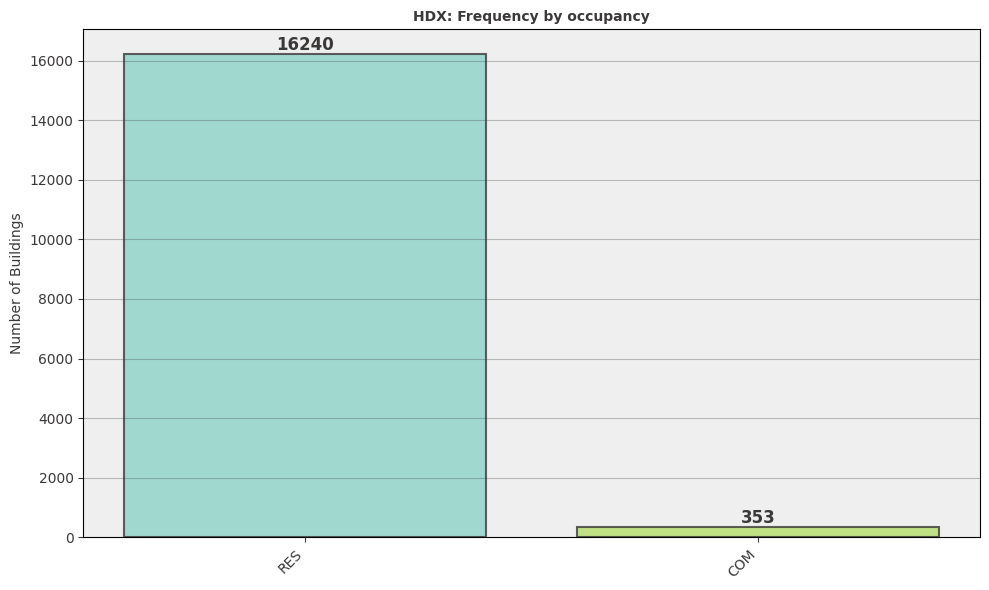

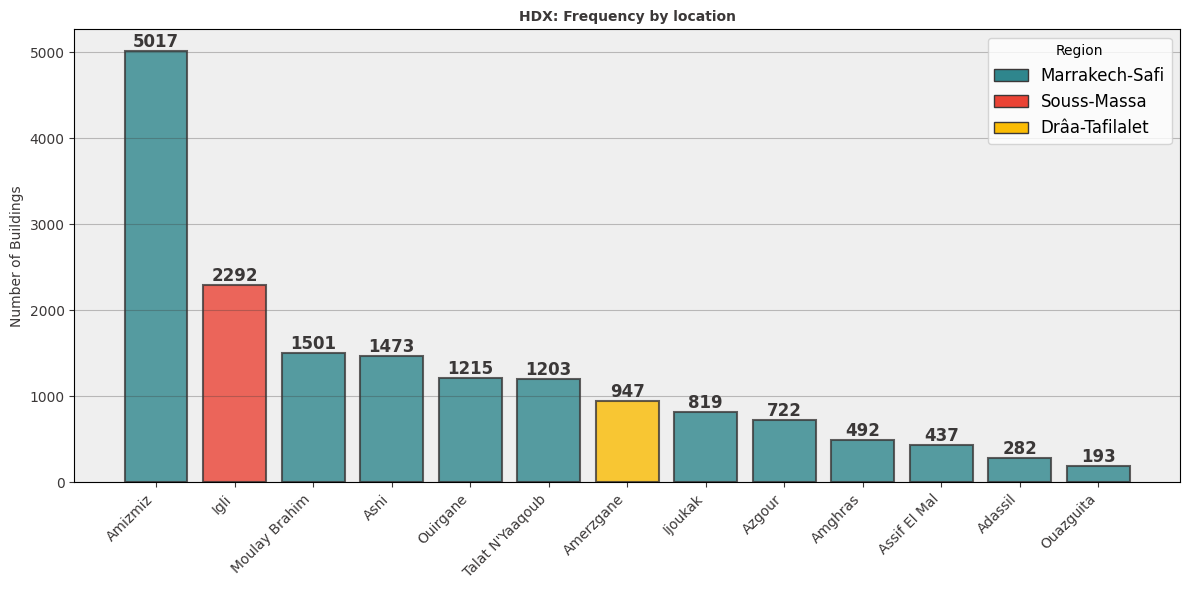

📊 HDX Occupancy types: 2
📊 HDX Locations: 13

2️⃣ HDX DATASET - TAXONOMY PARAMETERS BY OCCUPANCY
----------------------------------------


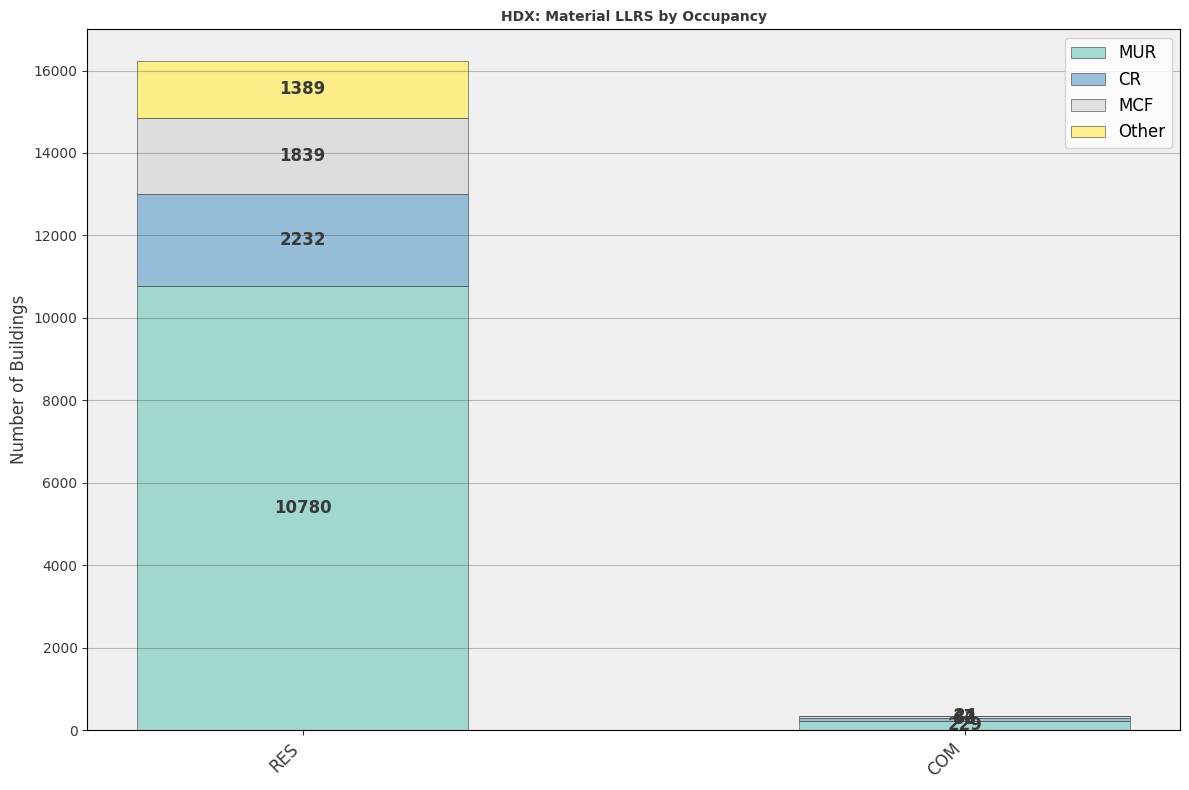

   ✅ Material LLRS: 4 categories across 2 occupancy types


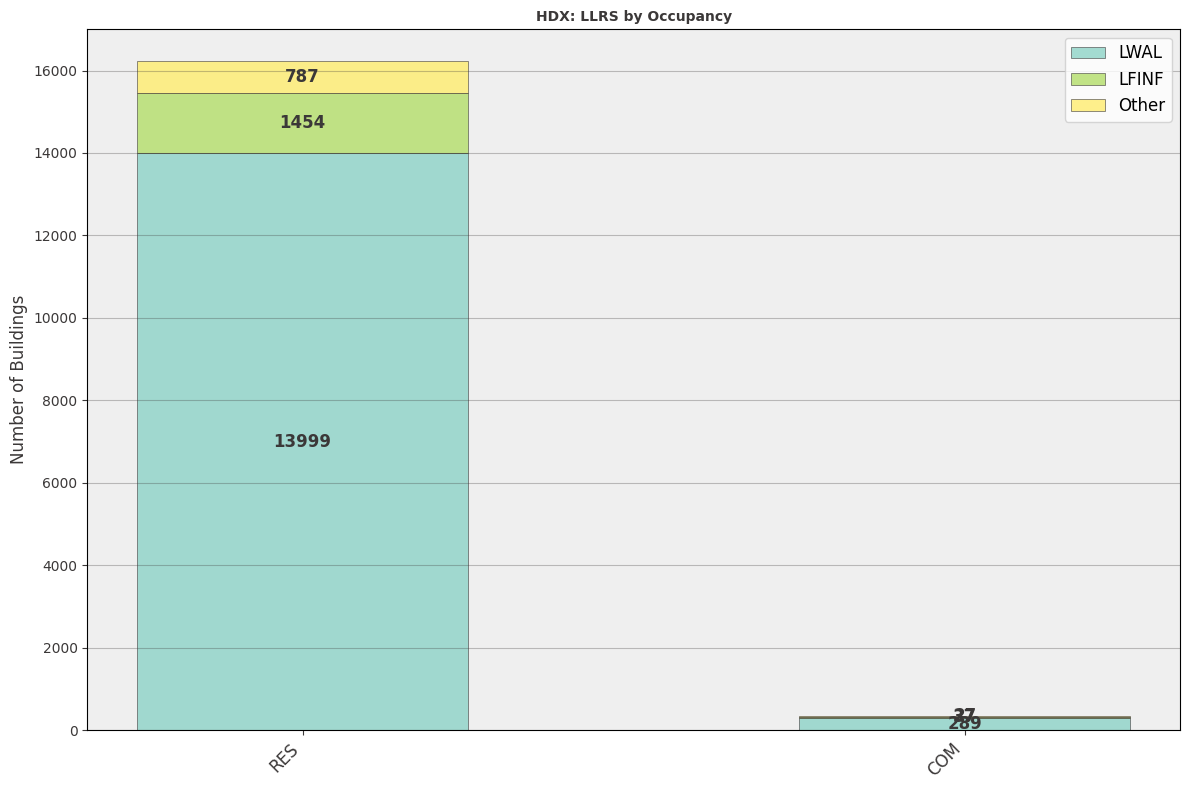

   ✅ LLRS: 3 categories across 2 occupancy types


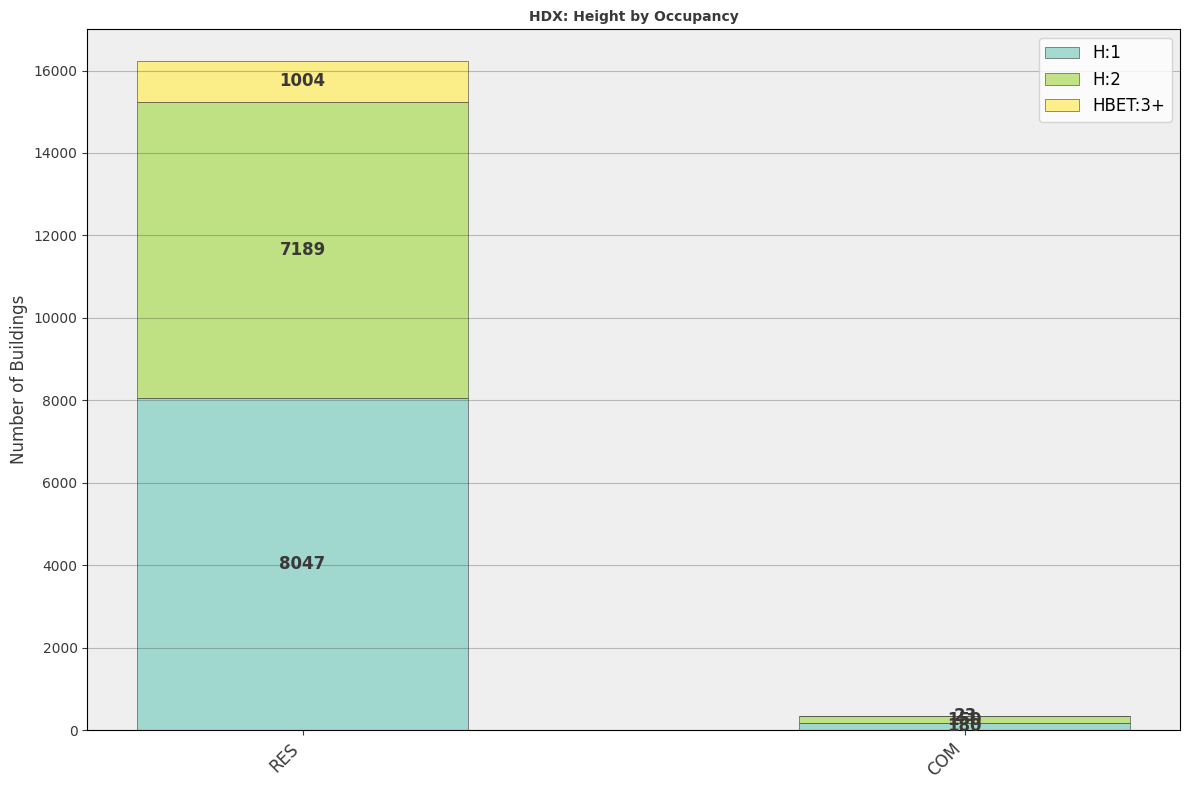

   ✅ Height: 3 categories across 2 occupancy types

3️⃣ HDX DATASET - OCCUPANCY DISTRIBUTION BY TAXONOMY PARAMETERS
----------------------------------------


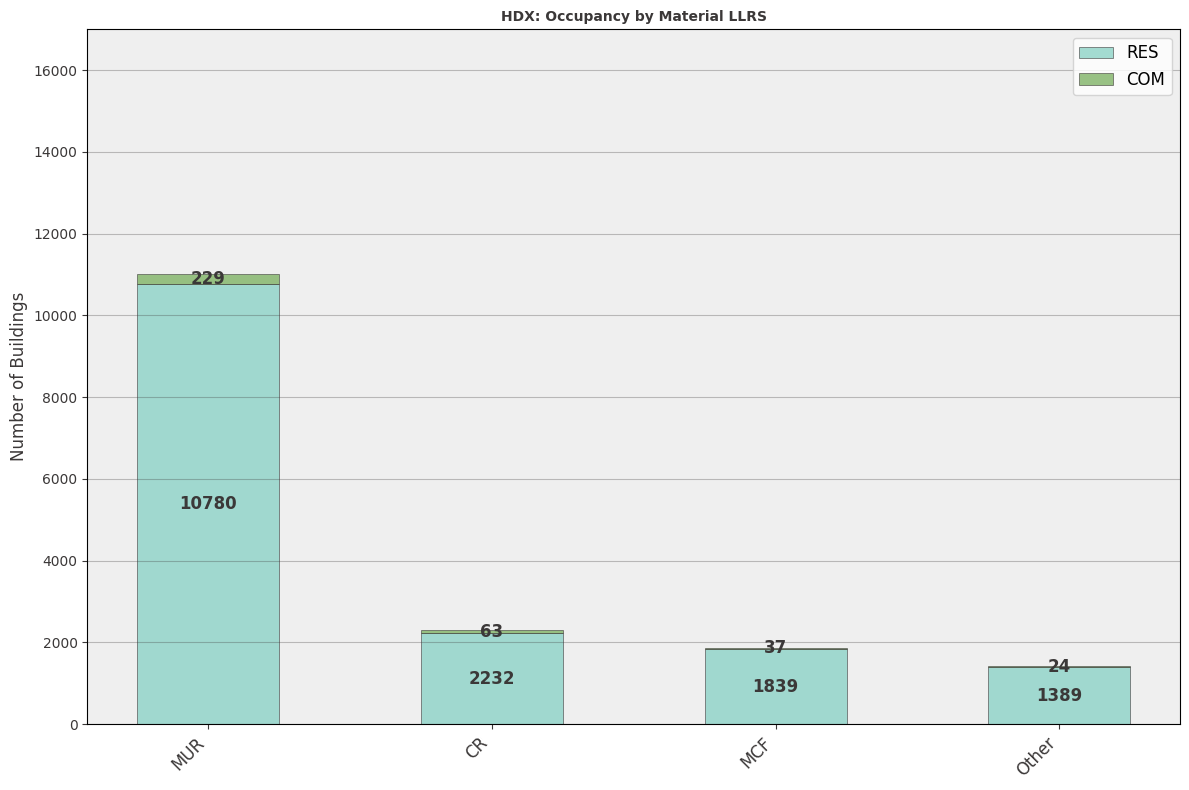

   ✅ Material LLRS: 4 categories with 2 occupancy types


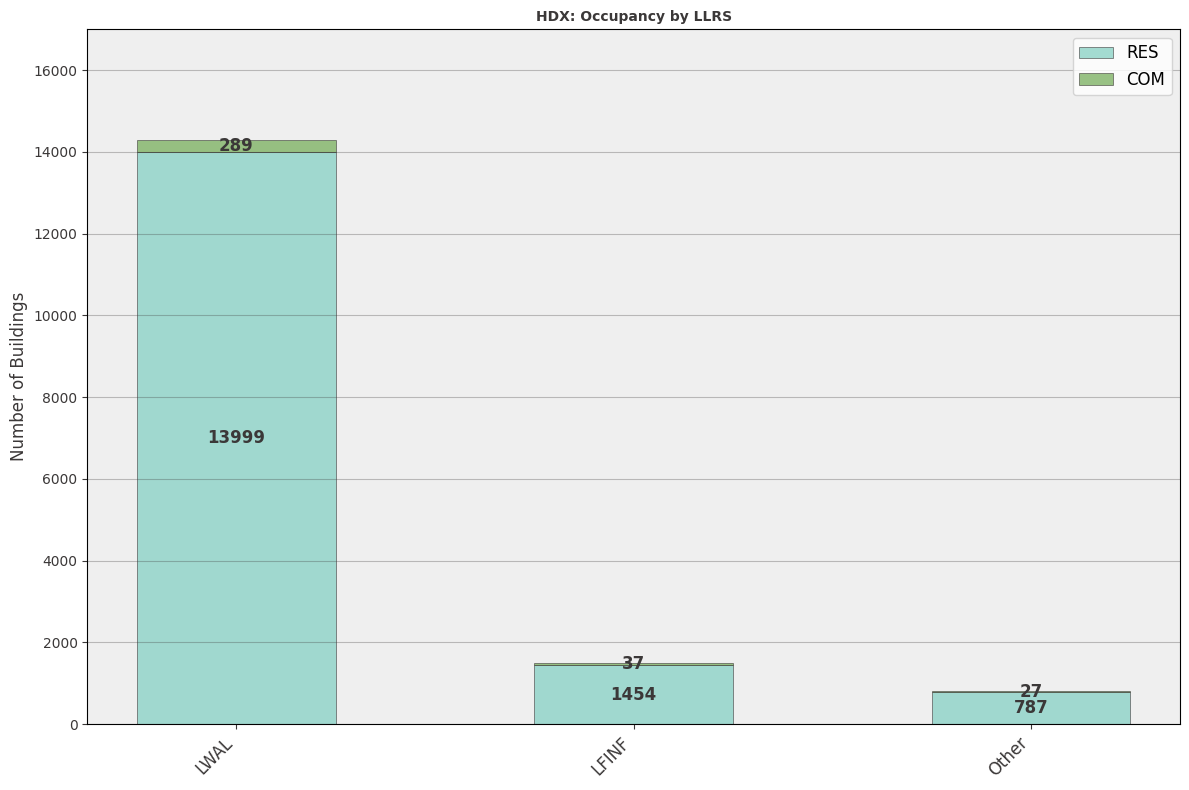

   ✅ LLRS: 3 categories with 2 occupancy types


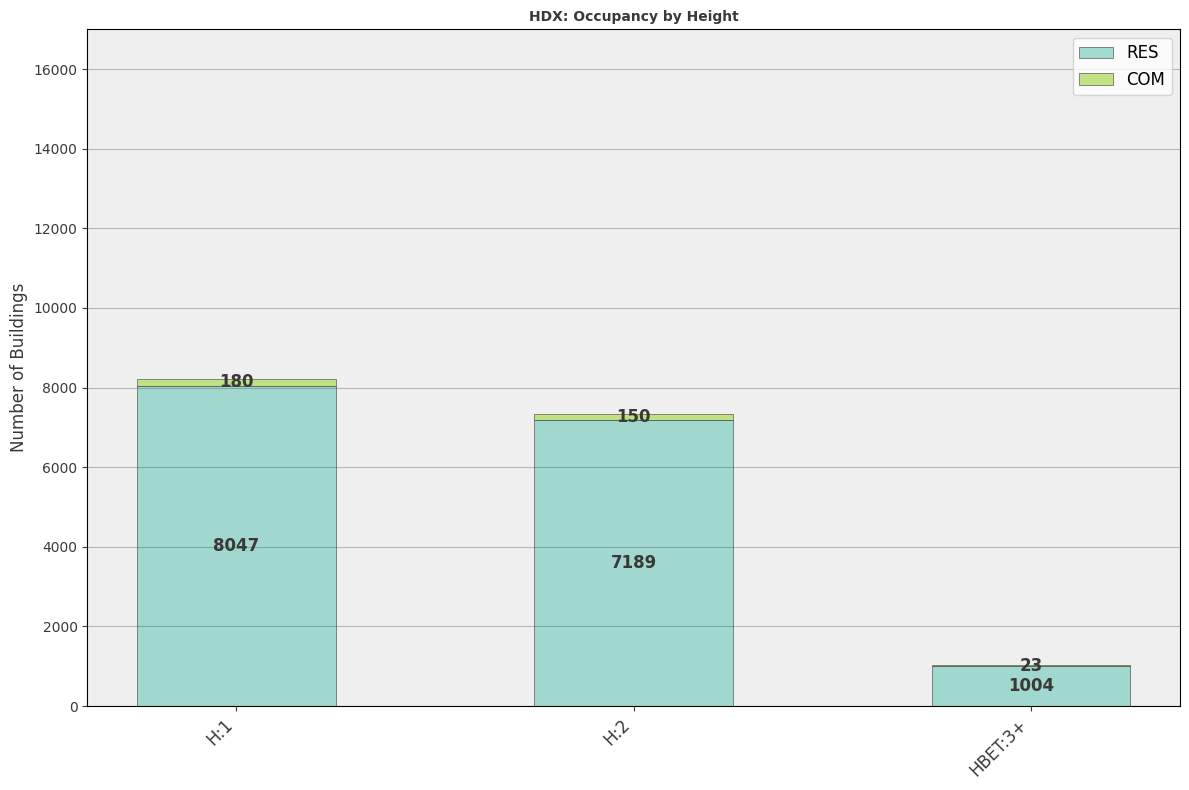

   ✅ Height: 3 categories with 2 occupancy types

4️⃣ HDX DATASET - EXPOSURE DATA SUMMARY
----------------------------------------
📊 Total HDX buildings: 16593

📋 HDX Occupancy Distribution:
   RES: 16240 buildings (97.9%)
   COM: 353 buildings (2.1%)

📋 HDX Location Distribution (by region):
   Marrakech-Safi: 13354 buildings (80.5%)
     - Amizmiz: 5017 buildings
     - Moulay Brahim: 1501 buildings
     - Asni: 1473 buildings
     - Ouirgane: 1215 buildings
     - Talat N'Yaaqoub: 1203 buildings
     - ... and 6 more locations
   Souss-Massa: 2292 buildings (13.8%)
     - Igli: 2292 buildings
   Drâa-Tafilalet: 0 buildings (0.0%)

📋 HDX Taxonomy parameters summary:
   Material LLRS:
     Categories: 10
     Most common: MUR (11009 buildings, 66.3%)
   LLRS:
     Categories: 6
     Most common: LWAL (14288 buildings, 86.1%)
   Height:
     Categories: 6
     Most common: H:1 (8227 buildings, 49.6%)

✅ HDX DATASET - DETAILED EXPOSURE ANALYSIS COMPLETE!


In [ ]:
print("📊 HDX DATASET - DETAILED EXPOSURE DATA ANALYSIS")
print("=" * 50)

# Use DG0 data for analysis (ID 1000+)
exposure_data_hdx = data['dg0_buildings'].copy()

# Define region colors (same as EEFIT analysis for consistency)
# Handle potential character encoding issues with special characters
region_colors = {
    'Marrakech-Safi': '#2f868d',
    'Souss-Massa': '#ea4335',
    'Drâa-Tafilalet': '#fbbc04',  # Original encoding
    'DrÃ¢a-Tafilalet': '#fbbc04',  # Alternative encoding
    'Draa-Tafilalet': '#fbbc04'   # Without special characters
}

# Define occupancy order based on frequency (same as EEFIT for consistency)
occupancy_order = ['RES', 'MIX', 'COM:5C', 'COM', 'HEA:1', 'OCO', 'EDU:2']

# Create consistent occupancy colors (same as EEFIT analysis)
occupancy_counts_hdx = exposure_data_hdx['Occupancy'].value_counts()
n_occupancies_hdx = len(occupancy_counts_hdx)

# Define specific colors to ensure COM is always green
occupancy_color_mapping = {
    'RES': '#8dd3c7',     # Light blue
    'COM': '#80b366',     # Green (ensure COM is always green)
    'COM:5C': '#80b366',  # Green for COM variant
    'MIX': '#ffffb3',     # Light yellow
    'HEA:1': '#bebada',   # Light purple
    'OCO': '#fb8072',     # Light red
    'EDU:2': '#fdb462'    # Orange
}

# Create occupancy color mapping with fallback
occupancy_colors_hdx = {}
ordered_occupancies_hdx = [occ for occ in occupancy_order if occ in occupancy_counts_hdx.index]
remaining_occupancies_hdx = [occ for occ in occupancy_counts_hdx.index if occ not in occupancy_order]
all_ordered_occupancies_hdx = ordered_occupancies_hdx + remaining_occupancies_hdx

for occ in all_ordered_occupancies_hdx:
    if occ in occupancy_color_mapping:
        occupancy_colors_hdx[occ] = occupancy_color_mapping[occ]
    else:
        # Use Set3 colors for any unmapped occupancies
        idx = list(all_ordered_occupancies_hdx).index(occ)
        occupancy_colors_hdx[occ] = plt.cm.Set3(idx / len(all_ordered_occupancies_hdx))

# 1. INDIVIDUAL PLOTS - Basic frequency plots
print("\n1️⃣ HDX DATASET - BASIC FREQUENCY DISTRIBUTIONS")
print("-" * 40)

# Plot 1: Frequency by occupancy (individual plot)
fig1, ax1 = plt.subplots(1, 1, figsize=(10, 6))
fig1.patch.set_facecolor('white')

occupancy_counts_hdx = create_frequency_plot(exposure_data_hdx, 'Occupancy', 'HDX: Frequency by occupancy',
                                                 ax1, use_occupancy_colors=True, custom_order=occupancy_order)
plt.tight_layout()
plt.show()

# Plot 2: Frequency by location (individual plot)
fig2, ax2 = plt.subplots(1, 1, figsize=(12, 6))
fig2.patch.set_facecolor('white')

location_counts_hdx = create_frequency_plot(exposure_data_hdx, 'Location', 'HDX: Frequency by location',
                                                ax2, use_region_colors=True)

# Add legend for region colors (use proper region name only)
from matplotlib.patches import Patch
clean_region_colors = {
    'Marrakech-Safi': '#2f868d',
    'Souss-Massa': '#ea4335',
    'Drâa-Tafilalet': '#fbbc04'  # Only show the proper spelling in legend
}
legend_elements = [Patch(facecolor=color, edgecolor=color_edge, label=region)
                   for region, color in clean_region_colors.items()]
ax2.legend(handles=legend_elements, title='Region', loc='upper right', fontsize=12)

plt.tight_layout()
plt.show()

if occupancy_counts_hdx is not None:
    print(f"📊 HDX Occupancy types: {len(occupancy_counts_hdx)}")
if location_counts_hdx is not None:
    print(f"📊 HDX Locations: {len(location_counts_hdx)}")

# 2. Taxonomy parameters by occupancy (individual plots)
print("\n2️⃣ HDX DATASET - TAXONOMY PARAMETERS BY OCCUPANCY")
print("-" * 40)

building_characteristics = [
    'Material LLRS',
    'LLRS',
    'Height'
]

for i, characteristic in enumerate(building_characteristics):
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    fig.patch.set_facecolor('white')

    title = f'HDX: {characteristic} by Occupancy'
    use_primary = characteristic in ['Material LLRS', 'LLRS']

    # Create processed data copy for characteristic-specific modifications
    exposure_data_processed = exposure_data_hdx.copy()

    # Special preprocessing for Height to merge categories
    if characteristic == 'Height':
        # Merge H:3, HBET:3-6, HBET:4-7, and HBET:8+ into HBET:3+
        height_mapping = {
            'H:3': 'HBET:3+',
            'HBET:3-6': 'HBET:3+',
            'HBET:4-7': 'HBET:3+',
            'HBET:8+': 'HBET:3+'
        }
        exposure_data_processed[characteristic] = exposure_data_processed[characteristic].replace(height_mapping)

        crosstab = create_cross_frequency_plot(exposure_data_processed, 'Occupancy', characteristic, title, ax,
                                             use_primary_taxonomy=use_primary, use_stacked=True)

    # Special preprocessing for Material LLRS to merge categories
    elif characteristic == 'Material LLRS':
        # Extract primary taxonomy first
        processed_material_data = extract_primary_taxonomy(exposure_data_processed, characteristic, 'material')

        # Merge all classes other than CR, MCF, MUR into "Other" (E+ETO now goes to Other)
        def merge_material_classes(value):
            if pd.isna(value):
                return value
            if value in ['CR', 'MCF', 'MUR']:
                return value
            else:
                return 'Other'

        processed_material_data = processed_material_data.apply(merge_material_classes)

        # Create custom crosstab with merged material data
        crosstab = pd.crosstab(exposure_data_processed['Occupancy'], processed_material_data)

        # Sort occupancy by frequency (most common first)
        occupancy_totals = crosstab.sum(axis=1).sort_values(ascending=False)
        crosstab = crosstab.reindex(occupancy_totals.index)

        # Order materials according to updated sequence: MUR, CR, MCF, Other (E+ETO now in Other)
        material_order = ['MUR', 'CR', 'MCF', 'Other']
        existing_materials = [mat for mat in material_order if mat in crosstab.columns]
        remaining_materials = [mat for mat in crosstab.columns if mat not in material_order]
        final_material_order = existing_materials + remaining_materials
        crosstab = crosstab.reindex(columns=final_material_order)

        # Create the plot manually since we have custom processed data
        ax.set_facecolor(infill)

        # Create color palette for materials
        material_colors = plt.cm.Set3(np.linspace(0, 1, len(crosstab.columns)))

        # Create stacked bar chart with specified material order (MUR at bottom, Other at top)
        bottom = np.zeros(len(crosstab.index))

        for i_mat, (material, color) in enumerate(zip(crosstab.columns, material_colors)):
            values = crosstab[material].values

            bars = ax.bar(range(len(crosstab.index)), values, width=0.5,
                         bottom=bottom, label=material, color=color, alpha=0.8,
                         edgecolor=color_edge, linewidth=0.5)

            # Add value labels for values > 0
            for j, value in enumerate(values):
                if value > 0:
                    y_pos = bottom[j] + value / 2
                    ax.text(j, y_pos, f'{int(value)}', ha='center', va='center',
                            fontsize=12, color=color_edge, weight='bold')

            bottom = bottom + values

        ax.set_ylabel('Number of Buildings', fontsize=12, color=color_edge)
        ax.set_title(title, fontsize=10, color=color_edge, weight='bold')
        ax.set_xticks(range(len(crosstab.index)))
        ax.set_xticklabels(crosstab.index, rotation=45, ha='right', fontsize=12, color=color_edge)
        ax.grid(True, alpha=0.3, color=color_edge, axis='y')
        ax.tick_params(colors=color_edge)
        ax.legend(bbox_to_anchor=(1.00, 1), loc='upper right', fontsize=12)

    # Special preprocessing for LLRS to merge categories
    elif characteristic == 'LLRS':
        # Extract primary taxonomy first
        processed_llrs_data = extract_primary_taxonomy(exposure_data_processed, characteristic, 'llrs')

        # Merge LN+CDN, LO, LDUAL+CDL, and LDUAL+CDM into "Other"
        def merge_llrs_classes(value):
            if pd.isna(value):
                return value
            if value in ['LN+CDN', 'LO', 'LDUAL+CDL', 'LDUAL+CDM']:
                return 'Other'
            else:
                return value

        processed_llrs_data = processed_llrs_data.apply(merge_llrs_classes)

        # Create custom crosstab with merged LLRS data
        crosstab = pd.crosstab(exposure_data_processed['Occupancy'], processed_llrs_data)

        # Sort occupancy by frequency (most common first)
        occupancy_totals = crosstab.sum(axis=1).sort_values(ascending=False)
        crosstab = crosstab.reindex(occupancy_totals.index)

        # Order LLRS according to updated sequence: LWAL, LFINF, Other (LDUAL variants now in Other)
        llrs_order = ['LWAL', 'LFINF', 'Other']
        existing_llrs = [llrs for llrs in llrs_order if llrs in crosstab.columns]
        remaining_llrs = [llrs for llrs in crosstab.columns if llrs not in llrs_order]
        final_llrs_order = existing_llrs + remaining_llrs
        crosstab = crosstab.reindex(columns=final_llrs_order)

        # Create the plot manually since we have custom processed data
        ax.set_facecolor(infill)

        # Create color palette for LLRS
        llrs_colors = plt.cm.Set3(np.linspace(0, 1, len(crosstab.columns)))

        # Create stacked bar chart with specified LLRS order (LWAL at bottom, Other at top)
        bottom = np.zeros(len(crosstab.index))

        for i_llrs, (llrs, color) in enumerate(zip(crosstab.columns, llrs_colors)):
            values = crosstab[llrs].values

            bars = ax.bar(range(len(crosstab.index)), values, width=0.5,
                         bottom=bottom, label=llrs, color=color, alpha=0.8,
                         edgecolor=color_edge, linewidth=0.5)

            # Add value labels for values > 0
            for j, value in enumerate(values):
                if value > 0:
                    y_pos = bottom[j] + value / 2
                    ax.text(j, y_pos, f'{int(value)}', ha='center', va='center',
                            fontsize=12, color=color_edge, weight='bold')

            bottom = bottom + values

        ax.set_ylabel('Number of Buildings', fontsize=12, color=color_edge)
        ax.set_title(title, fontsize=10, color=color_edge, weight='bold')
        ax.set_xticks(range(len(crosstab.index)))
        ax.set_xticklabels(crosstab.index, rotation=45, ha='right', fontsize=12, color=color_edge)
        ax.grid(True, alpha=0.3, color=color_edge, axis='y')
        ax.tick_params(colors=color_edge)
        ax.legend(bbox_to_anchor=(1.00, 1), loc='upper right', fontsize=12)

    else:
        crosstab = create_cross_frequency_plot(exposure_data_processed, 'Occupancy', characteristic, title, ax,
                                             use_primary_taxonomy=use_primary, use_stacked=True)

    # Set linear y-axis for HDX dataset (much larger than EEFIT)
    ax.set_ylim(0, 17000)

    plt.tight_layout()
    plt.show()

    if crosstab is not None:
        print(f"   ✅ {characteristic}: {len(crosstab.columns)} categories across {len(crosstab.index)} occupancy types")
    else:
        print(f"   ❌ {characteristic}: Not found in data")

# 3. Occupancy by taxonomy parameters (individual plots)
print("\n3️⃣ HDX DATASET - OCCUPANCY DISTRIBUTION BY TAXONOMY PARAMETERS")
print("-" * 40)

key_characteristics = ['Material LLRS', 'LLRS', 'Height']

for i, characteristic in enumerate(key_characteristics):
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    fig.patch.set_facecolor('white')

    title = f'HDX: Occupancy by {characteristic}'
    use_primary = characteristic in ['Material LLRS', 'LLRS']

    # Create processed data copy for characteristic-specific modifications
    exposure_data_processed = exposure_data_hdx.copy()

    # Special preprocessing for Height to merge categories
    if characteristic == 'Height':
        # Merge H:3, HBET:3-6, HBET:4-7, and HBET:8+ into HBET:3+
        height_mapping = {
            'H:3': 'HBET:3+',
            'HBET:3-6': 'HBET:3+',
            'HBET:4-7': 'HBET:3+',
            'HBET:8+': 'HBET:3+'
        }
        exposure_data_processed[characteristic] = exposure_data_processed[characteristic].replace(height_mapping)

        crosstab = create_cross_frequency_plot(exposure_data_processed, characteristic, 'Occupancy', title, ax,
                                             use_primary_taxonomy=use_primary, use_stacked=True)

    # Special preprocessing for Material LLRS to merge categories
    elif characteristic == 'Material LLRS':
        # Extract primary taxonomy first
        processed_material_data = extract_primary_taxonomy(exposure_data_processed, characteristic, 'material')

        # Merge all classes other than CR, MCF, MUR into "Other" (E+ETO now goes to Other)
        def merge_material_classes(value):
            if pd.isna(value):
                return value
            if value in ['CR', 'MCF', 'MUR']:
                return value
            else:
                return 'Other'

        processed_material_data = processed_material_data.apply(merge_material_classes)

        # Create custom crosstab with merged material data
        crosstab = pd.crosstab(processed_material_data, exposure_data_processed['Occupancy'])

        # Sort materials by frequency (most common first)
        material_totals = crosstab.sum(axis=1).sort_values(ascending=False)
        crosstab = crosstab.reindex(material_totals.index)

        # Order occupancy types consistently
        ordered_occupancies = [occ for occ in occupancy_order if occ in crosstab.columns]
        remaining_occupancies = [occ for occ in crosstab.columns if occ not in occupancy_order]
        new_order = ordered_occupancies + remaining_occupancies
        crosstab = crosstab.reindex(columns=new_order)

        # Create the plot manually since we have custom processed data
        ax.set_facecolor(infill)

        # Use consistent occupancy colors
        category_colors = [occupancy_colors_hdx.get(occ, color_main) for occ in crosstab.columns]

        # Create stacked bar chart
        bottom = np.zeros(len(crosstab.index))

        for i_occ, (occupancy, color) in enumerate(zip(crosstab.columns, category_colors)):
            values = crosstab[occupancy].values

            bars = ax.bar(range(len(crosstab.index)), values, width=0.5,
                         bottom=bottom, label=occupancy, color=color, alpha=0.8,
                         edgecolor=color_edge, linewidth=0.5)

            # Add value labels for values > 0
            for j, value in enumerate(values):
                if value > 0:
                    y_pos = bottom[j] + value / 2
                    ax.text(j, y_pos, f'{int(value)}', ha='center', va='center',
                            fontsize=12, color=color_edge, weight='bold')

            bottom = bottom + values

        ax.set_ylabel('Number of Buildings', fontsize=12, color=color_edge)
        ax.set_title(title, fontsize=10, color=color_edge, weight='bold')
        ax.set_xticks(range(len(crosstab.index)))
        ax.set_xticklabels(crosstab.index, rotation=45, ha='right', fontsize=12, color=color_edge)
        ax.grid(True, alpha=0.3, color=color_edge, axis='y')
        ax.tick_params(colors=color_edge)
        ax.legend(bbox_to_anchor=(1.00, 1), loc='upper right', fontsize=12)

    # Special preprocessing for LLRS to merge categories
    elif characteristic == 'LLRS':
        # Extract primary taxonomy first
        processed_llrs_data = extract_primary_taxonomy(exposure_data_processed, characteristic, 'llrs')

        # Merge LN+CDN, LO, LDUAL+CDL, and LDUAL+CDM into "Other"
        def merge_llrs_classes(value):
            if pd.isna(value):
                return value
            if value in ['LN+CDN', 'LO', 'LDUAL+CDL', 'LDUAL+CDM']:
                return 'Other'
            else:
                return value

        processed_llrs_data = processed_llrs_data.apply(merge_llrs_classes)

        # Create custom crosstab with merged LLRS data
        crosstab = pd.crosstab(processed_llrs_data, exposure_data_processed['Occupancy'])

        # Sort LLRS by frequency (most common first)
        llrs_totals = crosstab.sum(axis=1).sort_values(ascending=False)
        crosstab = crosstab.reindex(llrs_totals.index)

        # Order occupancy types consistently
        ordered_occupancies = [occ for occ in occupancy_order if occ in crosstab.columns]
        remaining_occupancies = [occ for occ in crosstab.columns if occ not in occupancy_order]
        new_order = ordered_occupancies + remaining_occupancies
        crosstab = crosstab.reindex(columns=new_order)

        # Create the plot manually since we have custom processed data
        ax.set_facecolor(infill)

        # Use consistent occupancy colors
        category_colors = [occupancy_colors_hdx.get(occ, color_main) for occ in crosstab.columns]

        # Create stacked bar chart
        bottom = np.zeros(len(crosstab.index))

        for i_occ, (occupancy, color) in enumerate(zip(crosstab.columns, category_colors)):
            values = crosstab[occupancy].values

            bars = ax.bar(range(len(crosstab.index)), values, width=0.5,
                         bottom=bottom, label=occupancy, color=color, alpha=0.8,
                         edgecolor=color_edge, linewidth=0.5)

            # Add value labels for values > 0
            for j, value in enumerate(values):
                if value > 0:
                    y_pos = bottom[j] + value / 2
                    ax.text(j, y_pos, f'{int(value)}', ha='center', va='center',
                            fontsize=12, color=color_edge, weight='bold')

            bottom = bottom + values

        ax.set_ylabel('Number of Buildings', fontsize=12, color=color_edge)
        ax.set_title(title, fontsize=10, color=color_edge, weight='bold')
        ax.set_xticks(range(len(crosstab.index)))
        ax.set_xticklabels(crosstab.index, rotation=45, ha='right', fontsize=12, color=color_edge)
        ax.grid(True, alpha=0.3, color=color_edge, axis='y')
        ax.tick_params(colors=color_edge)
        ax.legend(bbox_to_anchor=(1.00, 1), loc='upper right', fontsize=12)

    else:
        crosstab = create_cross_frequency_plot(exposure_data_processed, characteristic, 'Occupancy', title, ax,
                                             use_primary_taxonomy=use_primary, use_stacked=True)

    # Set linear y-axis for HDX dataset (much larger than EEFIT)
    ax.set_ylim(0, 17000)

    plt.tight_layout()
    plt.show()

    if crosstab is not None:
        print(f"   ✅ {characteristic}: {len(crosstab.index)} categories with {len(crosstab.columns)} occupancy types")
    else:
        print(f"   ❌ {characteristic}: Not found in data")

# 4. Summary statistics
print("\n4️⃣ HDX DATASET - EXPOSURE DATA SUMMARY")
print("-" * 40)

total_buildings_hdx = len(exposure_data_hdx)
print(f"📊 Total HDX buildings: {total_buildings_hdx}")

# Occupancy summary
if occupancy_counts_hdx is not None:
    print(f"\n📋 HDX Occupancy Distribution:")
    for occ, count in occupancy_counts_hdx.items():
        percentage = (count / total_buildings_hdx * 100)
        print(f"   {occ}: {count} buildings ({percentage:.1f}%)")

# Location summary
if location_counts_hdx is not None:
    print(f"\n📋 HDX Location Distribution (by region):")
    for region, color in region_colors.items():
        if region in ['Drâa-Tafilalet', 'DrÃ¢a-Tafilalet', 'Draa-Tafilalet']:
            # Skip the encoding variants in summary, use only the first one found
            if region != 'Drâa-Tafilalet':
                continue

        region_locations_hdx = exposure_data_hdx[exposure_data_hdx['Region'] == region]['Location'].value_counts()
        region_total_hdx = region_locations_hdx.sum()
        percentage = (region_total_hdx / total_buildings_hdx * 100)
        print(f"   {region}: {region_total_hdx} buildings ({percentage:.1f}%)")
        for loc, count in region_locations_hdx.head(5).items():
            print(f"     - {loc}: {count} buildings")
        if len(region_locations_hdx) > 5:
            remaining = len(region_locations_hdx) - 5
            print(f"     - ... and {remaining} more locations")

# Taxonomy parameters summary (using primary taxonomy for Material LLRS and LLRS)
print(f"\n📋 HDX Taxonomy parameters summary:")
for characteristic in building_characteristics:
    if characteristic in exposure_data_hdx.columns:
        if characteristic in ['Material LLRS', 'LLRS']:
            # Use primary taxonomy
            taxonomy_type = 'material' if characteristic == 'Material LLRS' else 'llrs'
            processed_data_hdx = extract_primary_taxonomy(exposure_data_hdx, characteristic, taxonomy_type)
            unique_values = processed_data_hdx.nunique()
            most_common = processed_data_hdx.mode().iloc[0] if len(processed_data_hdx.mode()) > 0 else 'N/A'
            most_common_count = processed_data_hdx.value_counts().iloc[0] if len(processed_data_hdx.value_counts()) > 0 else 0
        else:
            unique_values = exposure_data_hdx[characteristic].nunique()
            most_common = exposure_data_hdx[characteristic].mode().iloc[0] if len(exposure_data_hdx[characteristic].mode()) > 0 else 'N/A'
            most_common_count = exposure_data_hdx[characteristic].value_counts().iloc[0] if len(exposure_data_hdx[characteristic].value_counts()) > 0 else 0

        most_common_pct = (most_common_count / total_buildings_hdx * 100)

        print(f"   {characteristic}:")
        print(f"     Categories: {unique_values}")
        print(f"     Most common: {most_common} ({most_common_count} buildings, {most_common_pct:.1f}%)")

print(f"\n✅ HDX DATASET - DETAILED EXPOSURE ANALYSIS COMPLETE!")
print("=" * 50)

# 3 - INTEGRATION ASSESSMENT

📊 COMPREHENSIVE DATASET COMPARISON: EEFIT vs HDX
📊 Dataset Sizes:
   EEFIT buildings:     383
   HDX buildings: 16,593
   Size ratio (HDX/EEFIT): 43.3x

✅ Comparison data prepared for 5 parameters

1️⃣ CREATING SIDE-BY-SIDE COMPARISON PLOTS...


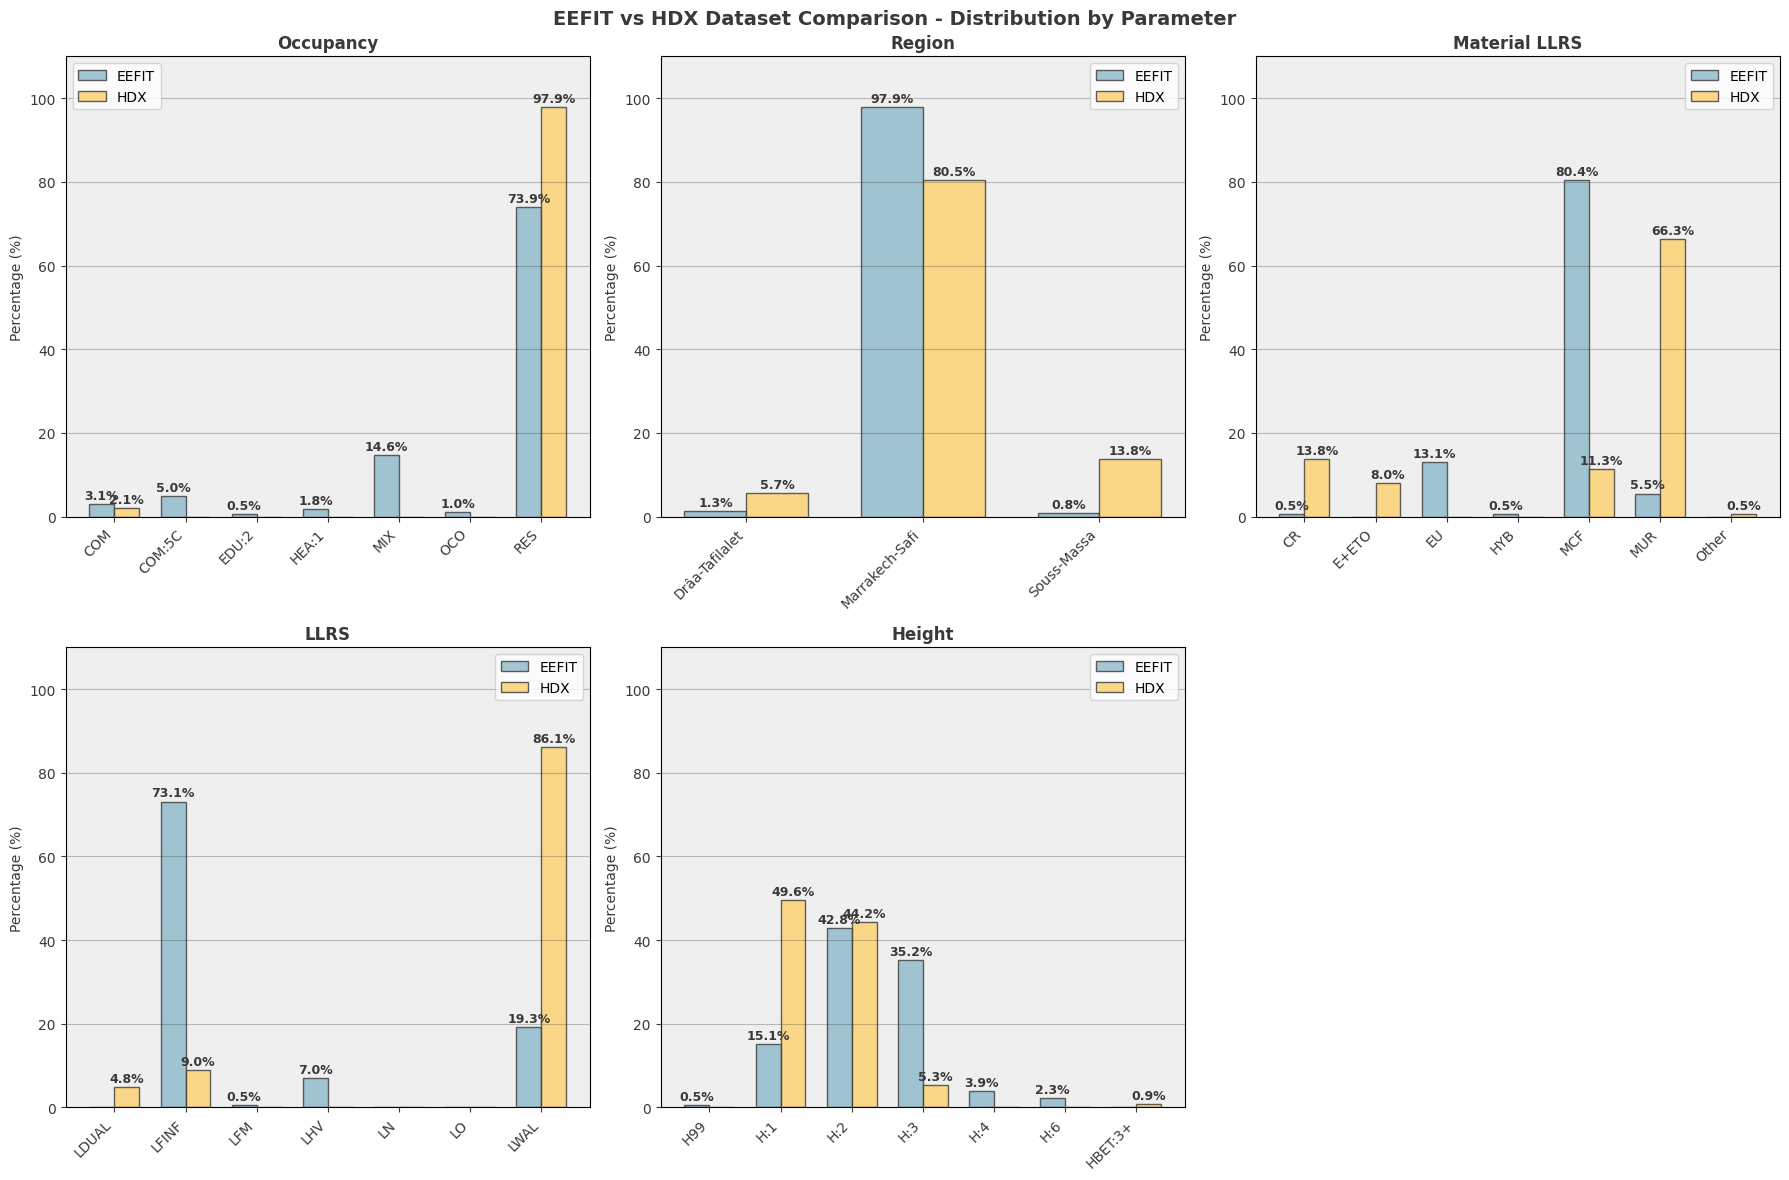


2️⃣ CREATING DIFFERENCE PLOTS...


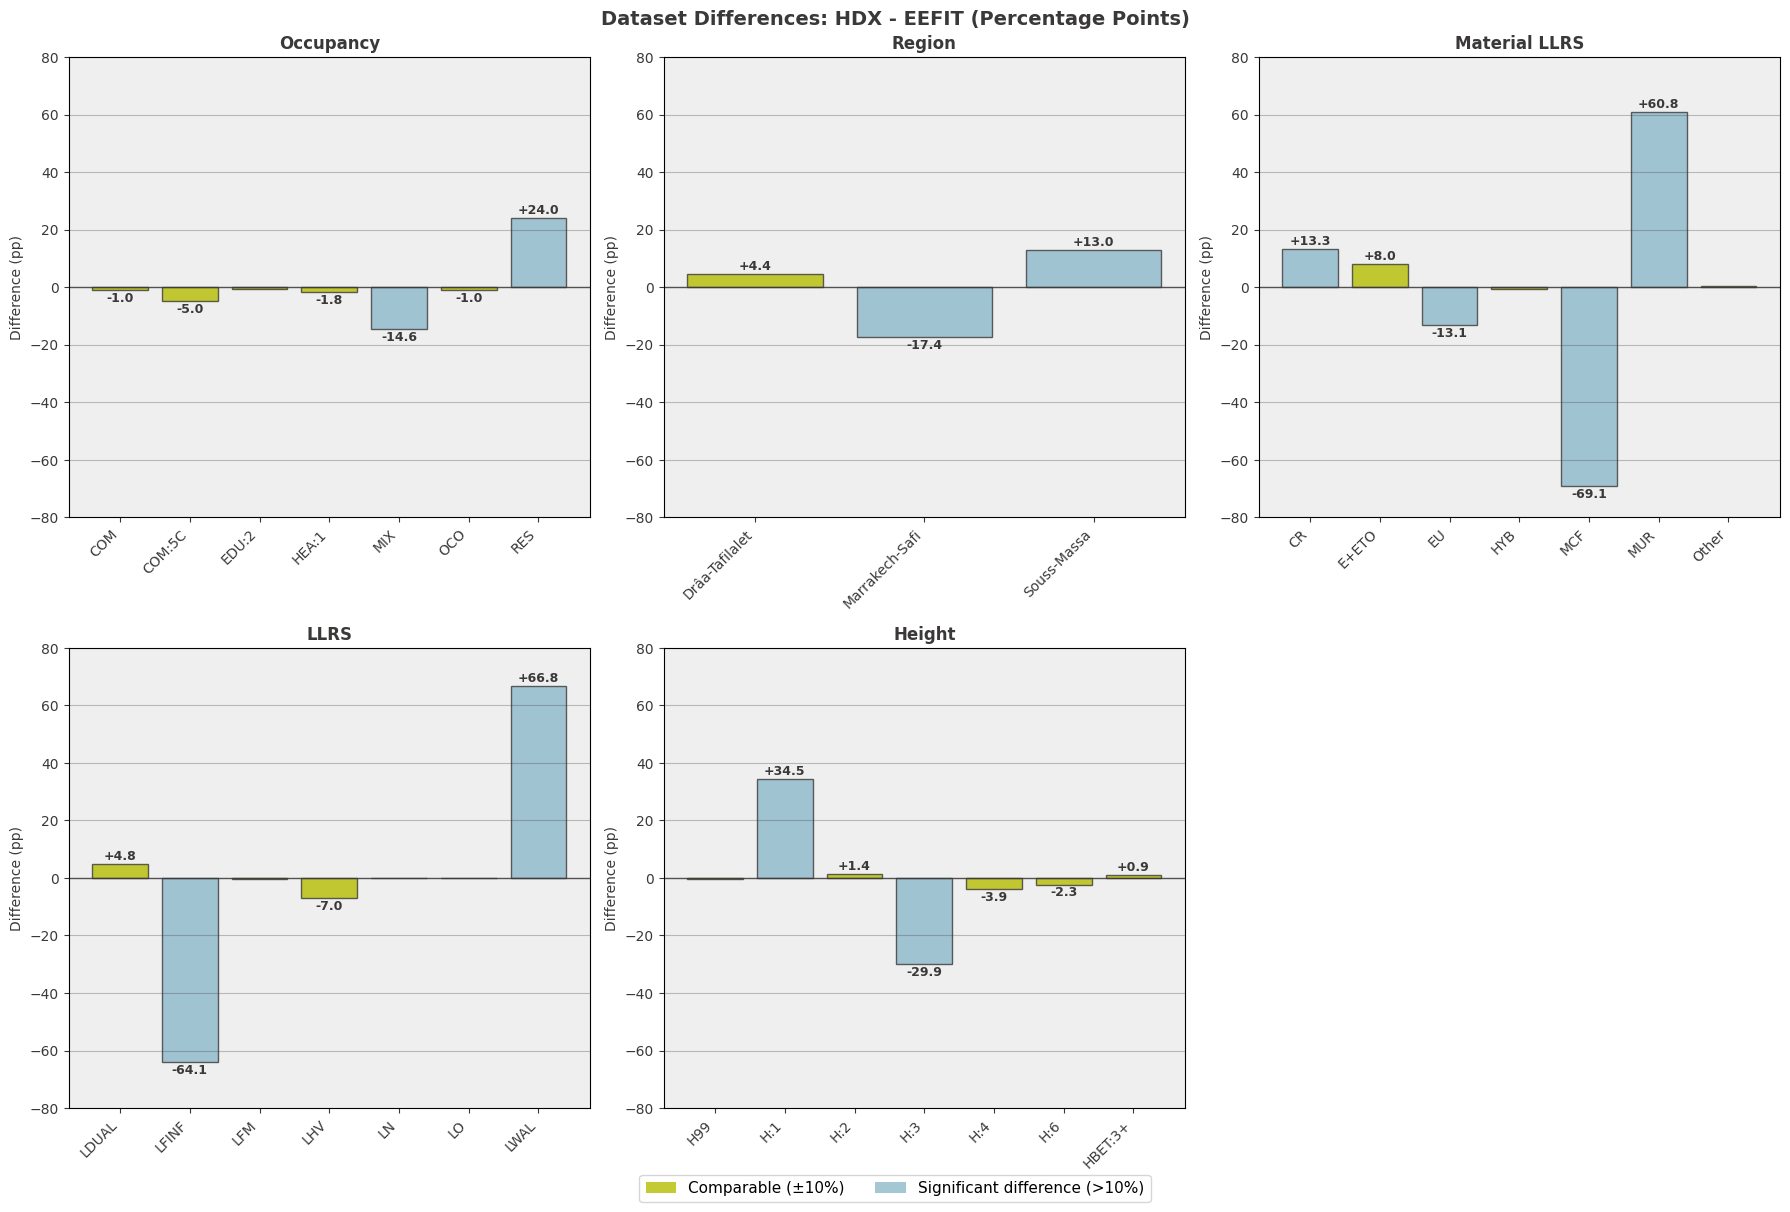


3️⃣ CREATING RADAR COMPARISON...


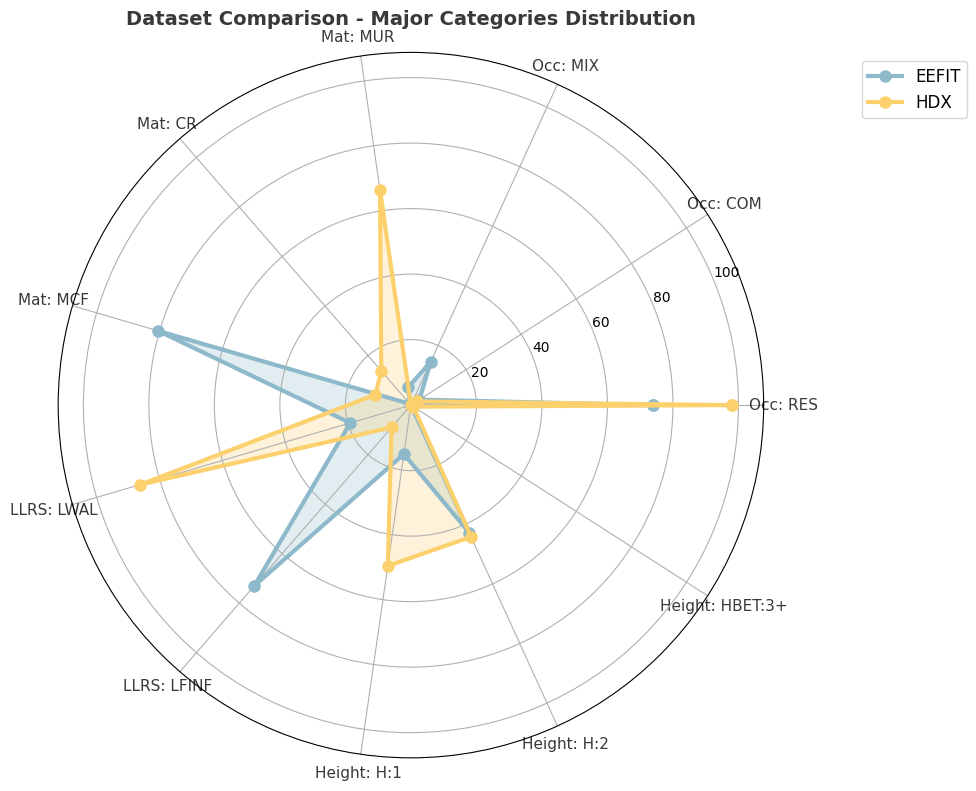


4️⃣ SUMMARY STATISTICS
------------------------------

📋 Occupancy:
   Largest difference: RES
   EEFIT: 73.9% | HDX: 97.9% | Diff: +24.0pp
   Most common in EEFIT: RES (73.9%)
   Most common in HDX: RES (97.9%)

📋 Region:
   Largest difference: Marrakech-Safi
   EEFIT: 97.9% | HDX: 80.5% | Diff: -17.4pp
   Most common in EEFIT: Marrakech-Safi (97.9%)
   Most common in HDX: Marrakech-Safi (80.5%)

📋 Material LLRS:
   Largest difference: MCF
   EEFIT: 80.4% | HDX: 11.3% | Diff: -69.1pp
   Most common in EEFIT: MCF (80.4%)
   Most common in HDX: MUR (66.3%)

📋 LLRS:
   Largest difference: LWAL
   EEFIT: 19.3% | HDX: 86.1% | Diff: +66.8pp
   Most common in EEFIT: LFINF (73.1%)
   Most common in HDX: LWAL (86.1%)

📋 Height:
   Largest difference: H:1
   EEFIT: 15.1% | HDX: 49.6% | Diff: +34.5pp
   Most common in EEFIT: H:2 (42.8%)
   Most common in HDX: H:1 (49.6%)

✅ COMPREHENSIVE COMPARISON ANALYSIS COMPLETE!


In [ ]:
print("📊 COMPREHENSIVE DATASET COMPARISON: EEFIT vs HDX")
print("=" * 60)

# Prepare datasets for comparison
eefit_data = data['eefit_buildings'].copy()
hdx_data = data['dg0_buildings'].copy()

print(f"📊 Dataset Sizes:")
print(f"   EEFIT buildings:     {len(eefit_data):,}")
print(f"   HDX buildings: {len(hdx_data):,}")
print(f"   Size ratio (HDX/EEFIT): {len(hdx_data)/len(eefit_data):.1f}x")

# Function to extract primary taxonomy for comparison
def get_primary_taxonomy_for_comparison(data, column, taxonomy_type):
    """Extract primary taxonomy using highest level only"""
    if taxonomy_type == 'material':
        primary_materials = ['CR', 'MCF', 'MUR', 'E+ETO', 'EU', 'HYB']
        result = data[column].copy()
        for idx, value in enumerate(data[column]):
            if pd.isna(value):
                continue
            for material in primary_materials:
                if material in str(value):
                    result.iloc[idx] = material
                    break
            else:
                result.iloc[idx] = 'Other'
        return result
    elif taxonomy_type == 'llrs':
        primary_llrs = ['LWAL', 'LFINF', 'LFM', 'LHV', 'LDUAL', 'LN', 'LO']  # Simplified LDUAL and LN
        result = data[column].copy()
        for idx, value in enumerate(data[column]):
            if pd.isna(value):
                continue
            # Handle LDUAL merging - merge both LDUAL+CDL and LDUAL+CDM to just LDUAL
            if 'LDUAL+CDL' in str(value) or 'LDUAL+CDM' in str(value):
                result.iloc[idx] = 'LDUAL'
                continue
            # Handle LN simplification - LN+CDN becomes just LN
            if 'LN+CDN' in str(value):
                result.iloc[idx] = 'LN'
                continue
            # Handle other LLRS types
            for llrs in primary_llrs:
                if llrs in str(value):
                    result.iloc[idx] = llrs
                    break
            else:
                result.iloc[idx] = 'Other'
        return result
    elif taxonomy_type == 'height':
        # Extract primary height categories
        height_mapping = {
            'H:1': 'H:1', 'H:2': 'H:2', 'H:3': 'H:3',
            'HBET:3-6': 'HBET:3+', 'HBET:4-7': 'HBET:3+', 'HBET:8+': 'HBET:3+',
            'H:99': 'H:99'
        }
        result = data[column].copy()
        for old_val, new_val in height_mapping.items():
            result = result.replace(old_val, new_val)
        return result
    elif taxonomy_type == 'region':
        # Handle region name encoding issues
        result = data[column].copy()
        # Replace the encoded version with proper version
        result = result.replace('DrÃ¢a-Tafilalet', 'Drâa-Tafilalet')
        result = result.replace('Draa-Tafilalet', 'Drâa-Tafilalet')
        return result

    return data[column].copy()

# Function to create comparison data structure
def create_comparison_data(parameters):
    """Create comparison data for specified parameters"""
    comparison_data = {}

    for param_name, taxonomy_type in parameters.items():
        if param_name not in eefit_data.columns or param_name not in hdx_data.columns:
            print(f"⚠️ Parameter '{param_name}' not found in one or both datasets")
            continue

        # Extract primary taxonomy for both datasets
        if taxonomy_type:
            eefit_values = get_primary_taxonomy_for_comparison(eefit_data, param_name, taxonomy_type)
            hdx_values = get_primary_taxonomy_for_comparison(hdx_data, param_name, taxonomy_type)
        else:
            eefit_values = eefit_data[param_name].copy()
            hdx_values = hdx_data[param_name].copy()

        # Calculate percentages
        eefit_pct = (eefit_values.value_counts(normalize=True) * 100).round(1)
        hdx_pct = (hdx_values.value_counts(normalize=True) * 100).round(1)

        # Get all categories
        all_categories = sorted(set(eefit_pct.index) | set(hdx_pct.index))

        comparison_data[param_name] = {
            'categories': all_categories,
            'eefit_pct': eefit_pct,
            'hdx_pct': hdx_pct,
            'eefit_counts': eefit_values.value_counts(),
            'hdx_counts': hdx_values.value_counts()
        }

    return comparison_data

# Define parameters to compare
comparison_parameters = {
    'Occupancy': None,  # No taxonomy extraction needed
    'Region': 'region',     # Handle region encoding
    'Material LLRS': 'material',
    'LLRS': 'llrs',
    'Height': 'height'
}

# Create comparison data
comp_data = create_comparison_data(comparison_parameters)

print(f"\n✅ Comparison data prepared for {len(comp_data)} parameters")

# VISUALIZATION 1: Multi-panel Side-by-Side Bar Charts
def create_side_by_side_comparison():
    """Create side-by-side bar charts for all parameters"""

    n_params = len(comp_data)
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.patch.set_facecolor('white')
    fig.suptitle('EEFIT vs HDX Dataset Comparison - Distribution by Parameter',
                 fontsize=14, color=color_edge, weight='bold', y=0.98)

    axes = axes.flatten()  # Flatten for easy indexing

    for idx, (param_name, param_data) in enumerate(comp_data.items()):
        if idx >= len(axes):
            break

        ax = axes[idx]
        ax.set_facecolor(infill)

        categories = param_data['categories']
        eefit_values = [param_data['eefit_pct'].get(cat, 0) for cat in categories]
        hdx_values = [param_data['hdx_pct'].get(cat, 0) for cat in categories]

        x = np.arange(len(categories))
        width = 0.35

        # Create bars
        bars1 = ax.bar(x - width/2, eefit_values, width, label='EEFIT',
                      color=color_main, alpha=0.8, edgecolor=color_edge)
        bars2 = ax.bar(x + width/2, hdx_values, width, label='HDX',
                      color=color_second, alpha=0.8, edgecolor=color_edge)

        # Add value labels
        for bar in bars1:
            height = bar.get_height()
            if height > 0:
                ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                       f'{height:.1f}%', ha='center', va='bottom',
                       fontsize=9, color=color_edge, weight='bold')

        for bar in bars2:
            height = bar.get_height()
            if height > 0:
                ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                       f'{height:.1f}%', ha='center', va='bottom',
                       fontsize=9, color=color_edge, weight='bold')

        ax.set_title(param_name, fontsize=12, color=color_edge, weight='bold')
        ax.set_ylabel('Percentage (%)', fontsize=10, color=color_edge)
        ax.set_xticks(x)
        ax.set_xticklabels(categories, rotation=45, ha='right', fontsize=10, color=color_edge)
        ax.legend(fontsize=10)
        ax.grid(True, alpha=0.3, color=color_edge, axis='y')
        ax.tick_params(colors=color_edge, labelsize=10)
        ax.set_ylim(0, 110)

    # Hide unused subplots
    for idx in range(len(comp_data), len(axes)):
        axes[idx].set_visible(False)

    plt.tight_layout()
    plt.show()

# VISUALIZATION 2: Difference Plot (Synthetic - EEFIT)
def create_difference_plot():
    """Create difference plots showing HDX - EEFIT percentages"""

    n_params = len(comp_data)
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.patch.set_facecolor('white')
    fig.suptitle('Dataset Differences: HDX - EEFIT (Percentage Points)',
                 fontsize=14, color=color_edge, weight='bold', y=0.98)

    axes = axes.flatten()

    for idx, (param_name, param_data) in enumerate(comp_data.items()):
        if idx >= len(axes):
            break

        ax = axes[idx]
        ax.set_facecolor(infill)

        categories = param_data['categories']
        eefit_values = [param_data['eefit_pct'].get(cat, 0) for cat in categories]
        hdx_values = [param_data['hdx_pct'].get(cat, 0) for cat in categories]
        differences = [s - e for s, e in zip(hdx_values, eefit_values)]

        # Color bars based on positive/negative differences with new thresholds
        colors = []
        for diff in differences:
            if abs(diff) <= 10:  # Comparable (within +/-10%)
                colors.append('#B5BD00')  # Yellow-green for comparable
            else:  # Significant difference (>10%)
                colors.append(color_main)  # Use main color for significant differences

        bars = ax.bar(range(len(categories)), differences, color=colors, alpha=0.8,
                     edgecolor=color_edge, linewidth=1)

        # Add value labels
        for i, (bar, diff) in enumerate(zip(bars, differences)):
            if abs(diff) > 0.5:  # Only label significant differences
                ax.text(bar.get_x() + bar.get_width()/2.,
                       diff + (0.5 if diff > 0 else -0.5),
                       f'{diff:+.1f}', ha='center', va='bottom' if diff > 0 else 'top',
                       fontsize=9, color=color_edge, weight='bold')

        # Add horizontal line at zero
        ax.axhline(y=0, color=color_edge, linestyle='-', linewidth=1, alpha=0.8)

        ax.set_title(param_name, fontsize=12, color=color_edge, weight='bold')
        ax.set_ylabel('Difference (pp)', fontsize=10, color=color_edge)
        ax.set_xticks(range(len(categories)))
        ax.set_xticklabels(categories, rotation=45, ha='right', fontsize=10, color=color_edge)
        ax.grid(True, alpha=0.3, color=color_edge, axis='y')
        ax.tick_params(colors=color_edge, labelsize=10)
        ax.set_ylim(-80, 80)

    # Hide unused subplots
    for idx in range(len(comp_data), len(axes)):
        axes[idx].set_visible(False)

    # Add legend
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='#B5BD00', alpha=0.8, label='Comparable (±10%)'),
        Patch(facecolor=color_main, alpha=0.8, label='Significant difference (>10%)')
    ]
    fig.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.5, -0.02),
               ncol=2, fontsize=11)

    plt.tight_layout()
    plt.show()

# VISUALIZATION 3: Radar/Spider Chart for Overall Comparison
def create_radar_comparison():
    """Create radar chart comparing major categories between datasets"""

    # Select key categories for radar chart
    radar_categories = []
    eefit_radar_values = []
    hdx_radar_values = []

    # Major occupancy types
    for occ in ['RES', 'COM', 'MIX']:
        if 'Occupancy' in comp_data and occ in comp_data['Occupancy']['categories']:
            radar_categories.append(f'Occ: {occ}')
            eefit_radar_values.append(comp_data['Occupancy']['eefit_pct'].get(occ, 0))
            hdx_radar_values.append(comp_data['Occupancy']['hdx_pct'].get(occ, 0))

    # Major material types
    for mat in ['MUR', 'CR', 'MCF']:
        if 'Material LLRS' in comp_data and mat in comp_data['Material LLRS']['categories']:
            radar_categories.append(f'Mat: {mat}')
            eefit_radar_values.append(comp_data['Material LLRS']['eefit_pct'].get(mat, 0))
            hdx_radar_values.append(comp_data['Material LLRS']['hdx_pct'].get(mat, 0))

    # Major LLRS types
    for llrs in ['LWAL', 'LFINF']:
        if 'LLRS' in comp_data and llrs in comp_data['LLRS']['categories']:
            radar_categories.append(f'LLRS: {llrs}')
            eefit_radar_values.append(comp_data['LLRS']['eefit_pct'].get(llrs, 0))
            hdx_radar_values.append(comp_data['LLRS']['hdx_pct'].get(llrs, 0))

    # Major height categories
    for height in ['H:1', 'H:2', 'HBET:3+']:
        if 'Height' in comp_data and height in comp_data['Height']['categories']:
            radar_categories.append(f'Height: {height}')
            eefit_radar_values.append(comp_data['Height']['eefit_pct'].get(height, 0))
            hdx_radar_values.append(comp_data['Height']['hdx_pct'].get(height, 0))

    if len(radar_categories) > 3:  # Only create radar if we have enough categories
        fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))
        fig.patch.set_facecolor('white')

        # Compute angle for each category
        angles = np.linspace(0, 2 * np.pi, len(radar_categories), endpoint=False).tolist()
        angles += angles[:1]  # Complete the circle

        # Close the plot
        eefit_radar_values += eefit_radar_values[:1]
        hdx_radar_values += hdx_radar_values[:1]

        # Plot
        ax.plot(angles, eefit_radar_values, 'o-', linewidth=3, label='EEFIT',
               color=color_main, markersize=8)
        ax.fill(angles, eefit_radar_values, alpha=0.25, color=color_main)

        ax.plot(angles, hdx_radar_values, 'o-', linewidth=3, label='HDX',
               color=color_second, markersize=8)
        ax.fill(angles, hdx_radar_values, alpha=0.25, color=color_second)

        # Add labels
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(radar_categories, fontsize=11, color=color_edge)
        ax.set_ylim(0, max(max(eefit_radar_values), max(hdx_radar_values)) * 1.1)
        ax.set_title('Dataset Comparison - Major Categories Distribution',
                    fontsize=14, color=color_edge, weight='bold', pad=20)
        ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0), fontsize=12)
        ax.grid(True)

        plt.tight_layout()
        plt.show()

# Execute all visualizations
print("\n1️⃣ CREATING SIDE-BY-SIDE COMPARISON PLOTS...")
create_side_by_side_comparison()

print("\n2️⃣ CREATING DIFFERENCE PLOTS...")
create_difference_plot()

print("\n3️⃣ CREATING RADAR COMPARISON...")
create_radar_comparison()

# Summary statistics
print(f"\n4️⃣ SUMMARY STATISTICS")
print("-" * 30)

for param_name, param_data in comp_data.items():
    print(f"\n📋 {param_name}:")

    # Find biggest differences
    categories = param_data['categories']
    eefit_values = [param_data['eefit_pct'].get(cat, 0) for cat in categories]
    hdx_values = [param_data['hdx_pct'].get(cat, 0) for cat in categories]
    differences = [abs(s - e) for s, e in zip(hdx_values, eefit_values)]

    if differences:
        max_diff_idx = differences.index(max(differences))
        max_diff_category = categories[max_diff_idx]
        max_diff_value = hdx_values[max_diff_idx] - eefit_values[max_diff_idx]

        print(f"   Largest difference: {max_diff_category}")
        print(f"   EEFIT: {eefit_values[max_diff_idx]:.1f}% | HDX: {hdx_values[max_diff_idx]:.1f}% | Diff: {max_diff_value:+.1f}pp")

        # Find most common category in each dataset
        if len(eefit_values) > 0:
            eefit_max_idx = eefit_values.index(max(eefit_values))
            print(f"   Most common in EEFIT: {categories[eefit_max_idx]} ({eefit_values[eefit_max_idx]:.1f}%)")

        if len(hdx_values) > 0:
            hdx_max_idx = hdx_values.index(max(hdx_values))
            print(f"   Most common in HDX: {categories[hdx_max_idx]} ({hdx_values[hdx_max_idx]:.1f}%)")

print(f"\n✅ COMPREHENSIVE COMPARISON ANALYSIS COMPLETE!")
print("=" * 60)

# 4 - INTEGRATED EXPOSURE MODEL

📊 INTEGRATED EXPOSURE MODEL - COMPREHENSIVE ANALYSIS
Analyzing complete integrated exposure model...
✅ Complete integrated exposure model:
   Total buildings: 16,976
   EEFIT buildings (ID 1-383): 383
   HDX buildings (ID 1000+): 16,593

📊 INTEGRATED EXPOSURE MODEL - DETAILED EXPOSURE DATA ANALYSIS

1️⃣ INTEGRATED EXPOSURE MODEL - BASIC FREQUENCY DISTRIBUTIONS
----------------------------------------


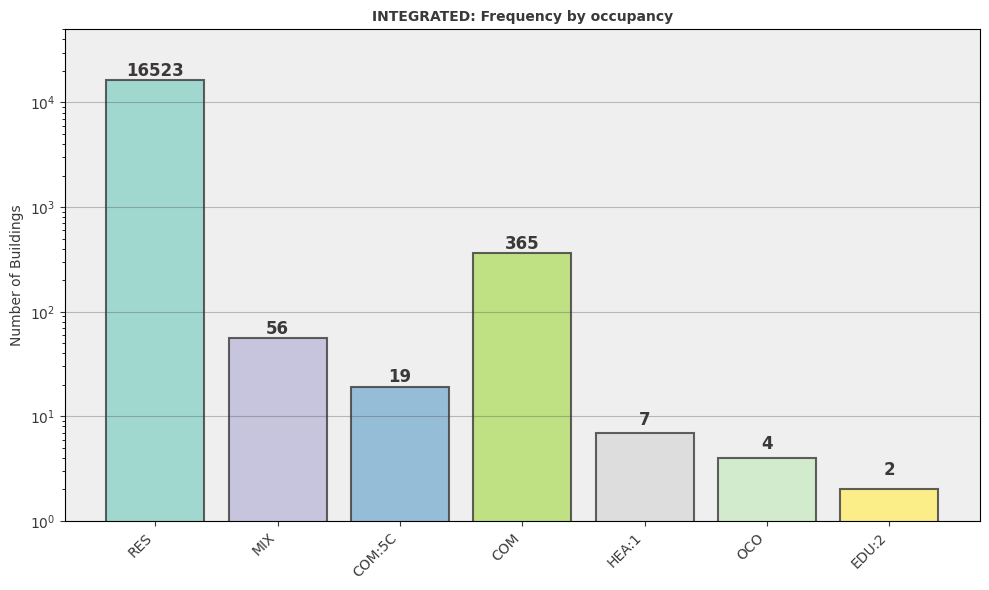

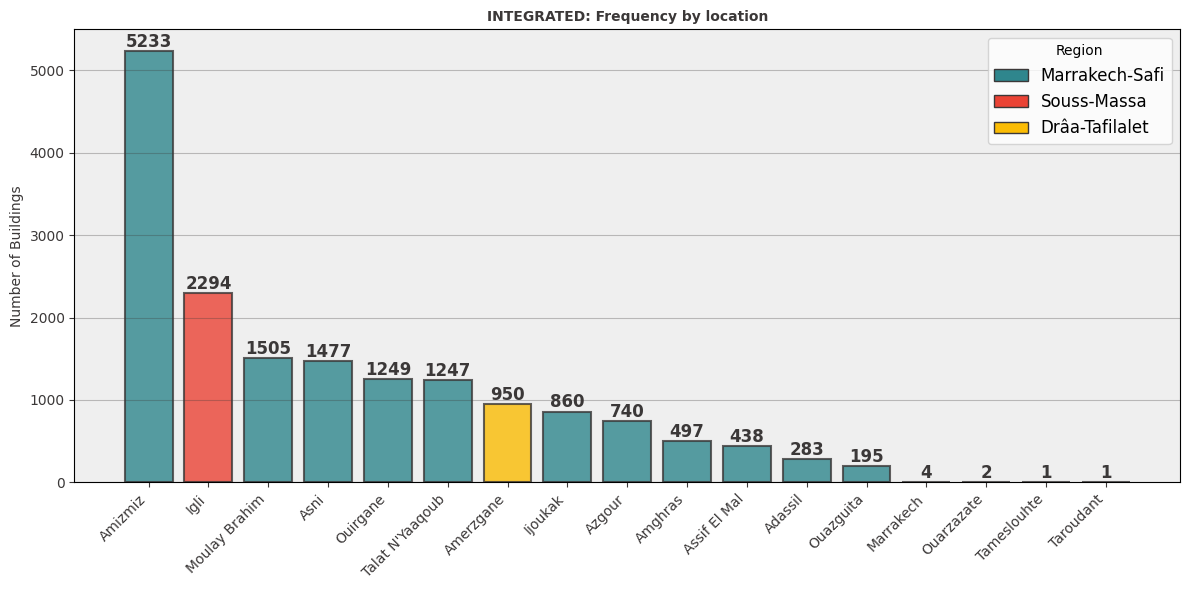

📊 INTEGRATED Occupancy types: 7
📊 INTEGRATED Locations: 17

2️⃣ INTEGRATED EXPOSURE MODEL - TAXONOMY PARAMETERS BY OCCUPANCY
----------------------------------------


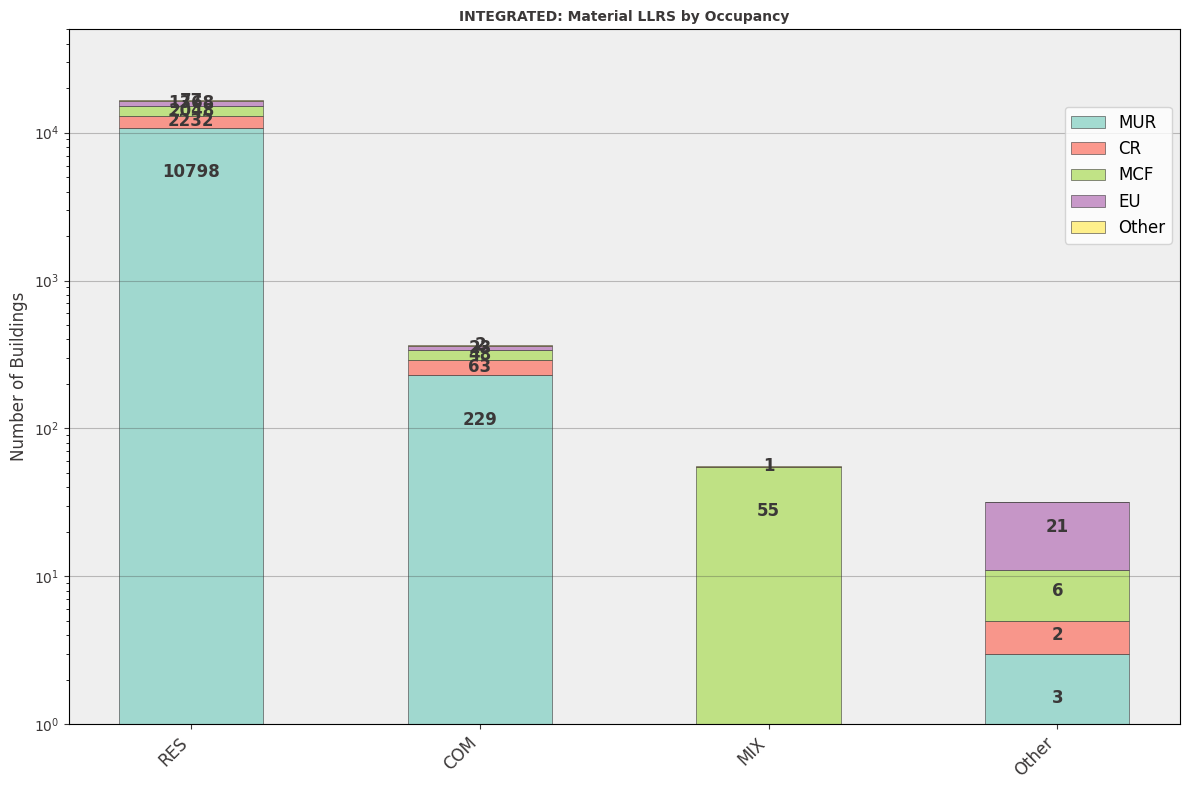

   ✅ Material LLRS: 5 categories across 4 occupancy types


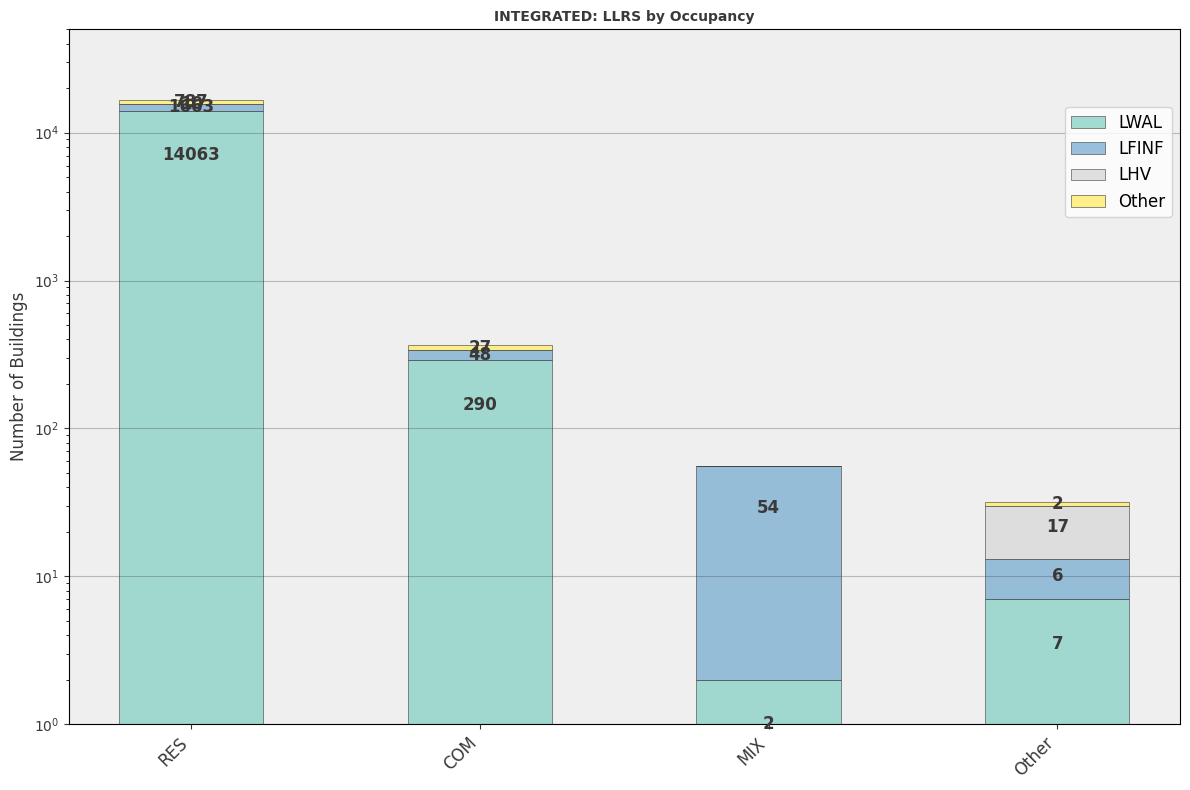

   ✅ LLRS: 4 categories across 4 occupancy types


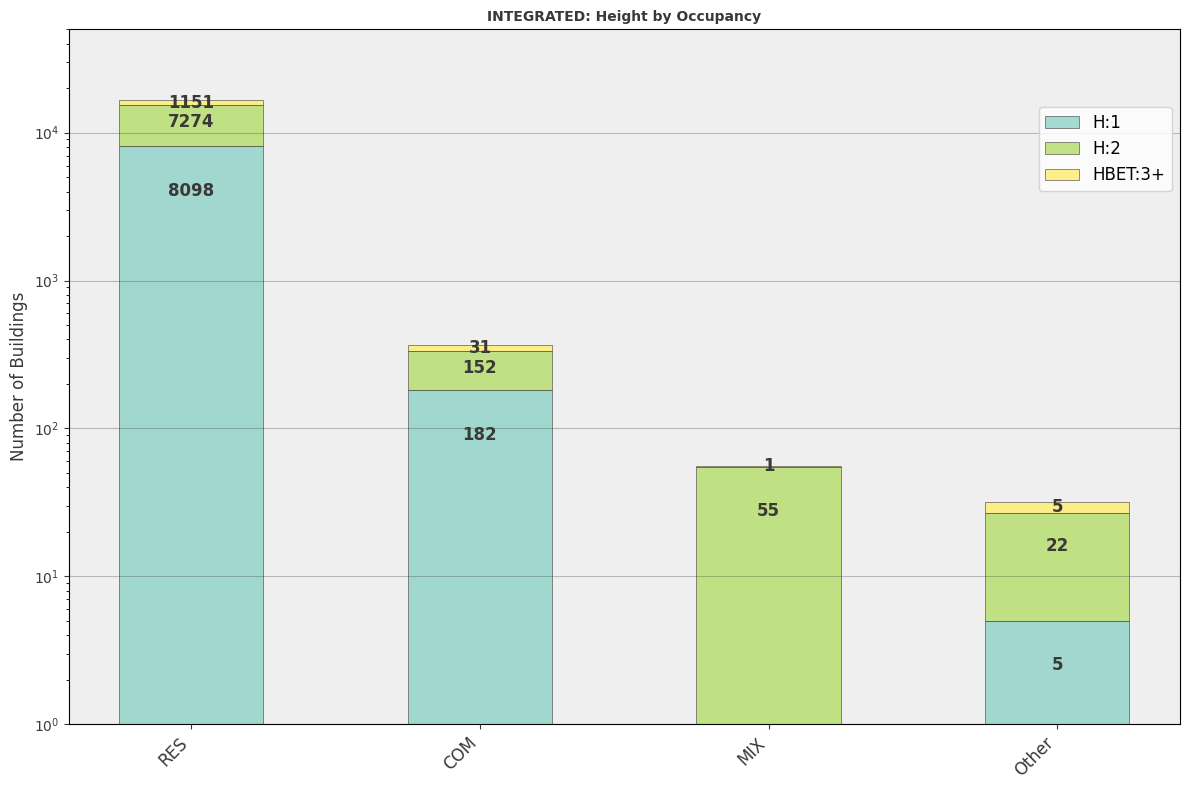

   ✅ Height: 3 categories across 4 occupancy types

3️⃣ INTEGRATED EXPOSURE MODEL - OCCUPANCY DISTRIBUTION BY TAXONOMY PARAMETERS
----------------------------------------


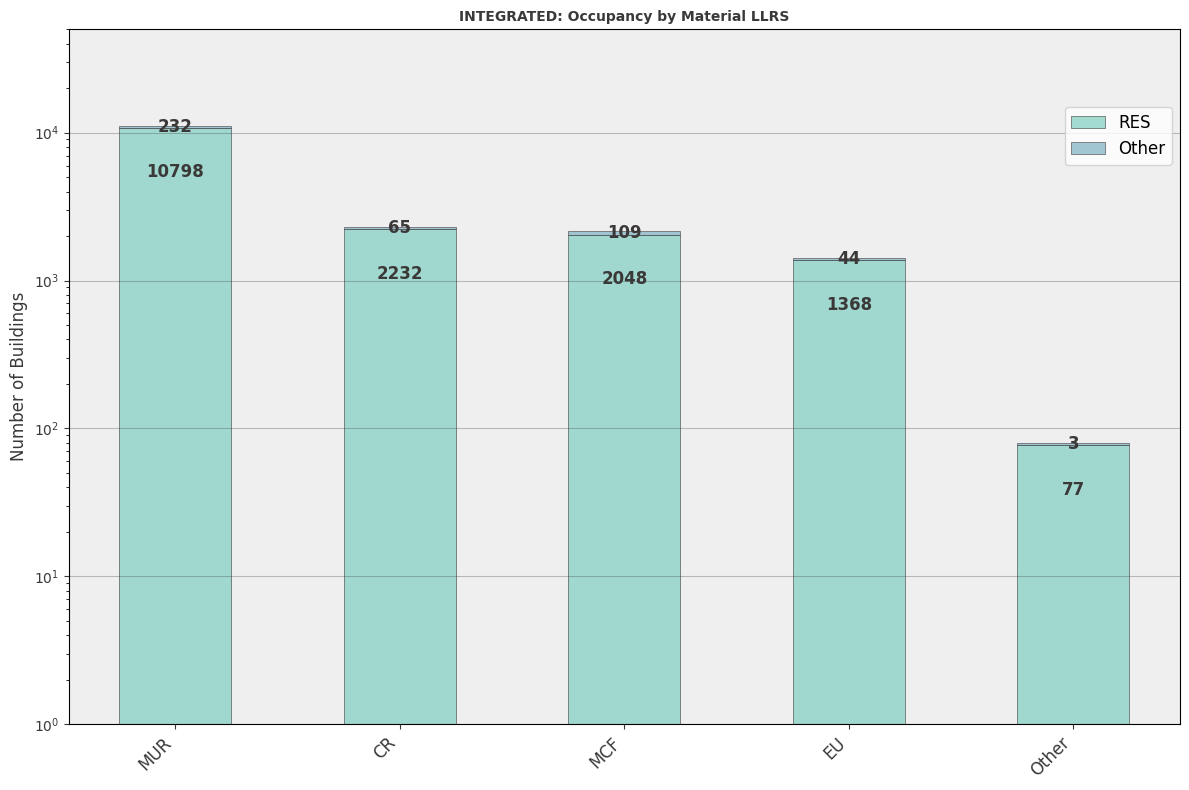

   ✅ Material LLRS: 5 categories with 2 occupancy types


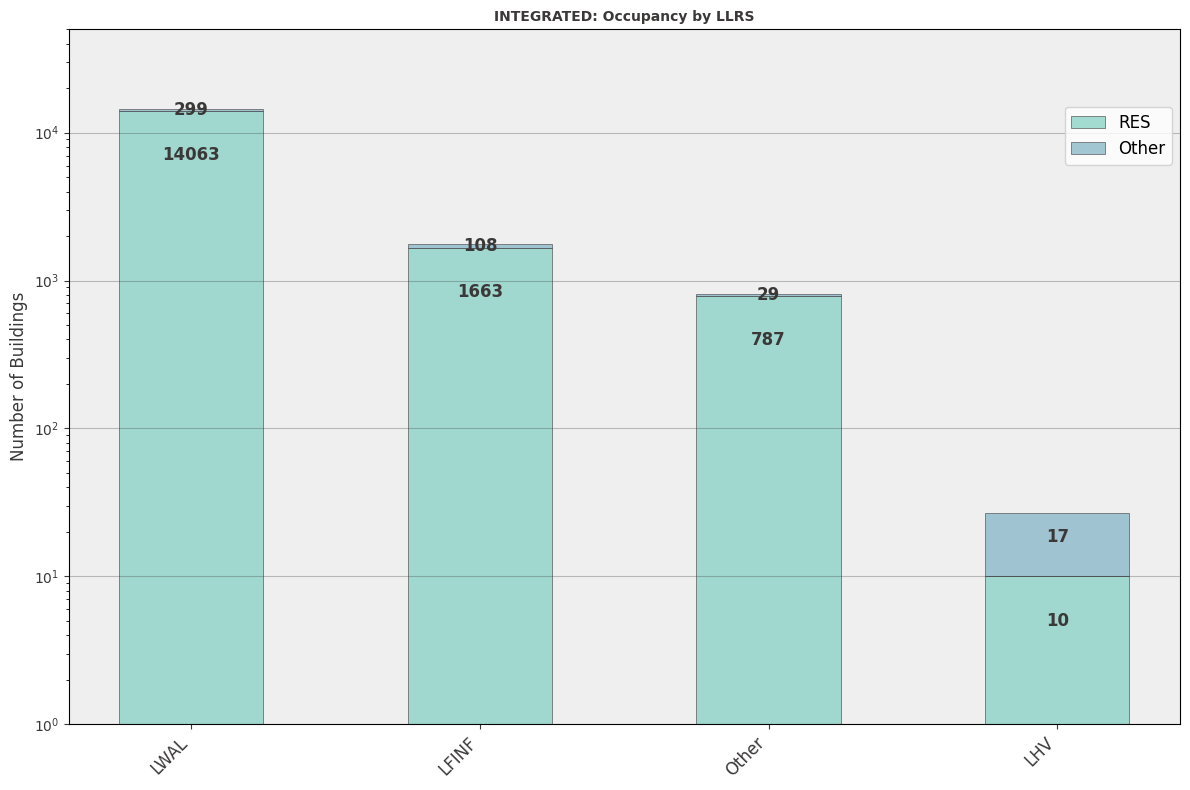

   ✅ LLRS: 4 categories with 2 occupancy types


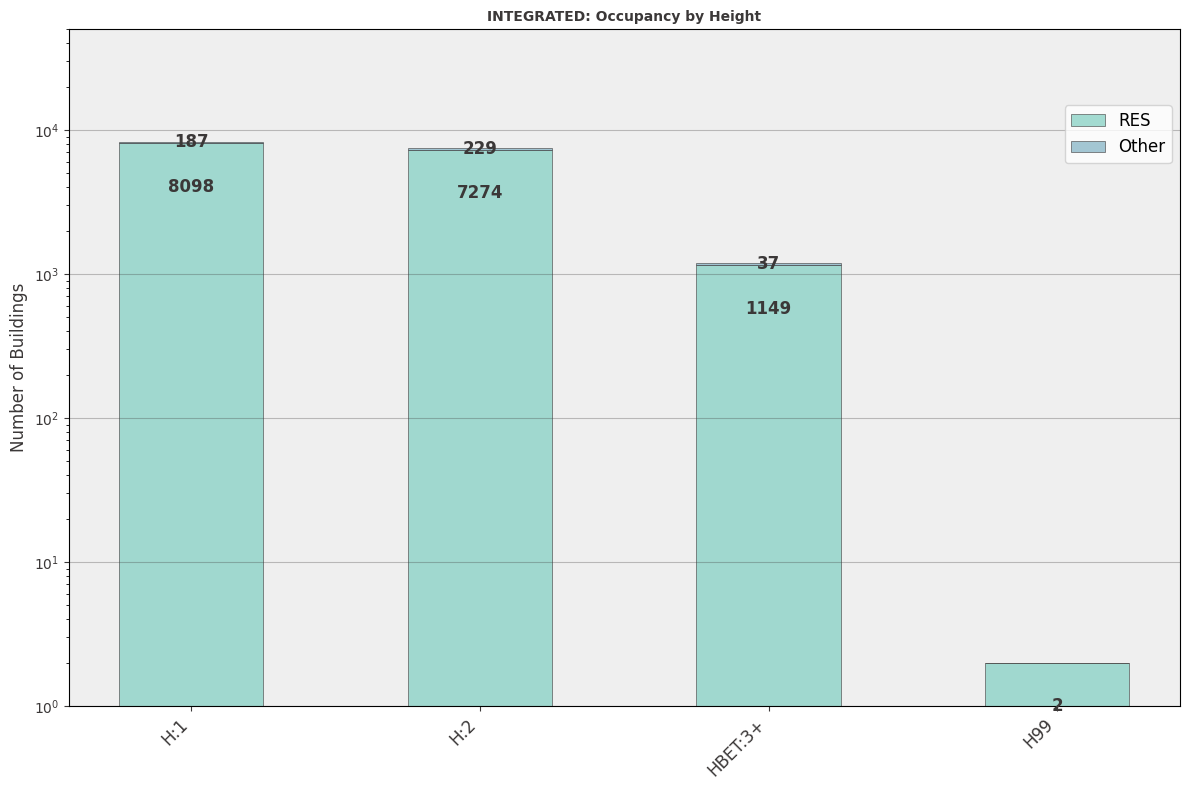

   ✅ Height: 4 categories with 2 occupancy types

4️⃣ INTEGRATED EXPOSURE MODEL - EXPOSURE DATA SUMMARY
----------------------------------------
📊 Total INTEGRATED buildings: 16,976

📋 INTEGRATED Occupancy Distribution:
   RES: 16,523 buildings (97.3%)
   MIX: 56 buildings (0.3%)
   COM:5C: 19 buildings (0.1%)
   COM: 365 buildings (2.2%)
   HEA:1: 7 buildings (0.0%)
   OCO: 4 buildings (0.0%)
   EDU:2: 2 buildings (0.0%)

📋 INTEGRATED Location Distribution (by region):
   Marrakech-Safi: 13,729 buildings (80.9%)
     - Amizmiz: 5,233 buildings
     - Moulay Brahim: 1,505 buildings
     - Asni: 1,477 buildings
     - Ouirgane: 1,249 buildings
     - Talat N'Yaaqoub: 1,247 buildings
     - ... and 8 more locations
   Souss-Massa: 2,295 buildings (13.5%)
     - Igli: 2,294 buildings
     - Taroudant: 1 buildings
   Drâa-Tafilalet: 952 buildings (5.6%)
     - Amerzgane: 950 buildings
     - Ouarzazate: 2 buildings

📋 INTEGRATED Taxonomy parameters summary:
   Material LLRS:
     Categorie

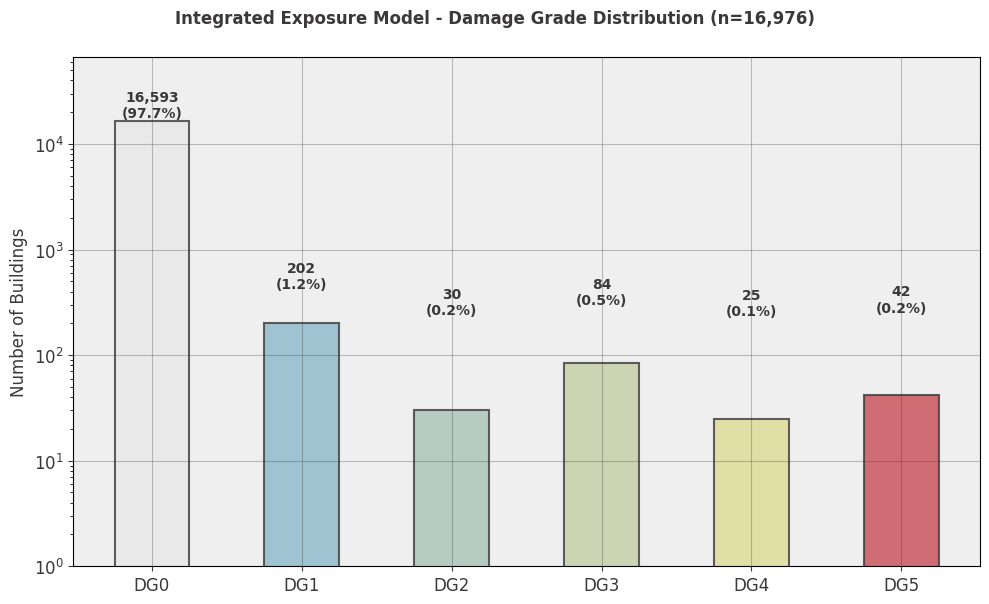


📊 Key Insights - Integrated Exposure Model:
• Most common category: DG0 (97.7%)
• No damage (DG0): 16,593 buildings (97.7%)
• Light damage (DG1-DG2): 232 buildings (1.4%)
• Heavy damage (DG4-DG5): 67 buildings (0.4%)

📋 Comparison: EEFIT vs Integrated Model
   Dataset sizes:
   • EEFIT only: 383 buildings
   • Integrated: 16,976 buildings
   • Size increase: 44.3x

   Damage grade percentages comparison:
   Grade  EEFIT Only   Integrated   Change    
   ------ ------------ ------------ ----------
   DG1       4040.0%         1.2%   -4038.8pp
   DG2        600.0%         0.2%    -599.8pp
   DG3       1680.0%         0.5%   -1679.5pp
   DG4        500.0%         0.1%    -499.9pp
   DG5        840.0%         0.2%    -839.8pp
   DG0    0.0               97.7%   +97.7pp   

✅ INTEGRATED DAMAGE GRADE VISUALIZATION COMPLETE!

📊 INTEGRATED MODEL - STRATIFIED DAMAGE GRADE ANALYSIS
Analyzing damage distribution by taxonomy parameters...

Analyzing: Material LLRS
📊 5 total categories found


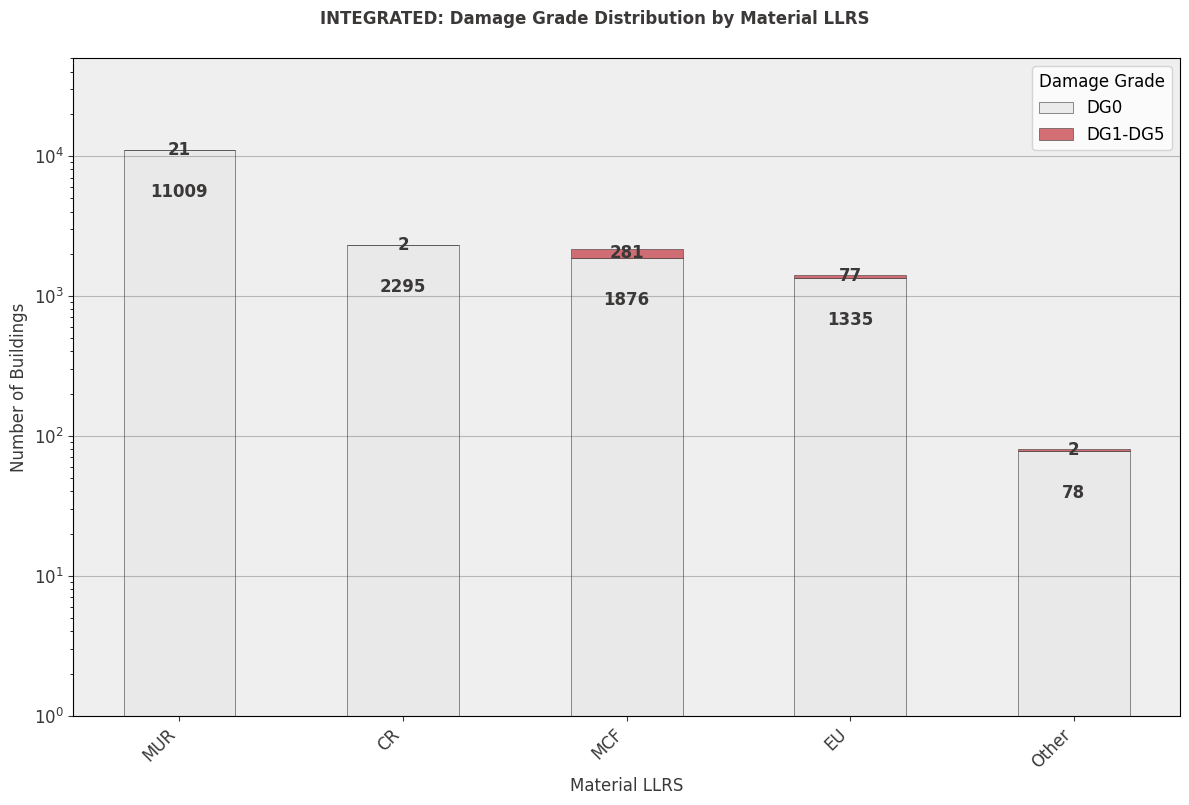

📋 Material LLRS Summary:
  MUR: 11,030 buildings (DG0: 11,009, DG1-DG5: 21)
  CR: 2,297 buildings (DG0: 2,295, DG1-DG5: 2)
  MCF: 2,157 buildings (DG0: 1,876, DG1-DG5: 281)
  EU: 1,412 buildings (DG0: 1,335, DG1-DG5: 77)
  Other: 80 buildings (DG0: 78, DG1-DG5: 2)

Analyzing: LLRS
📊 4 total categories found


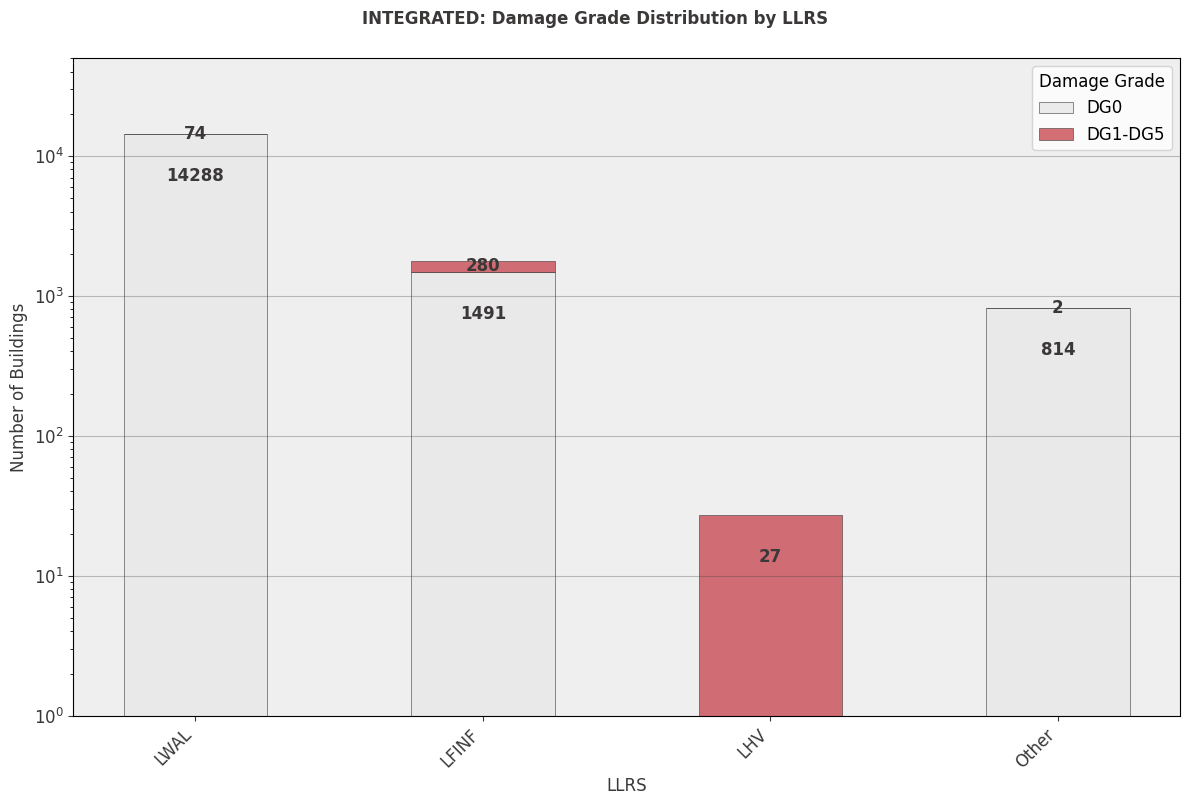

📋 LLRS Summary:
  LWAL: 14,362 buildings (DG0: 14,288, DG1-DG5: 74)
  LFINF: 1,771 buildings (DG0: 1,491, DG1-DG5: 280)
  LHV: 27 buildings (DG0: 0, DG1-DG5: 27)
  Other: 816 buildings (DG0: 814, DG1-DG5: 2)

Analyzing: Height
📊 3 total categories found


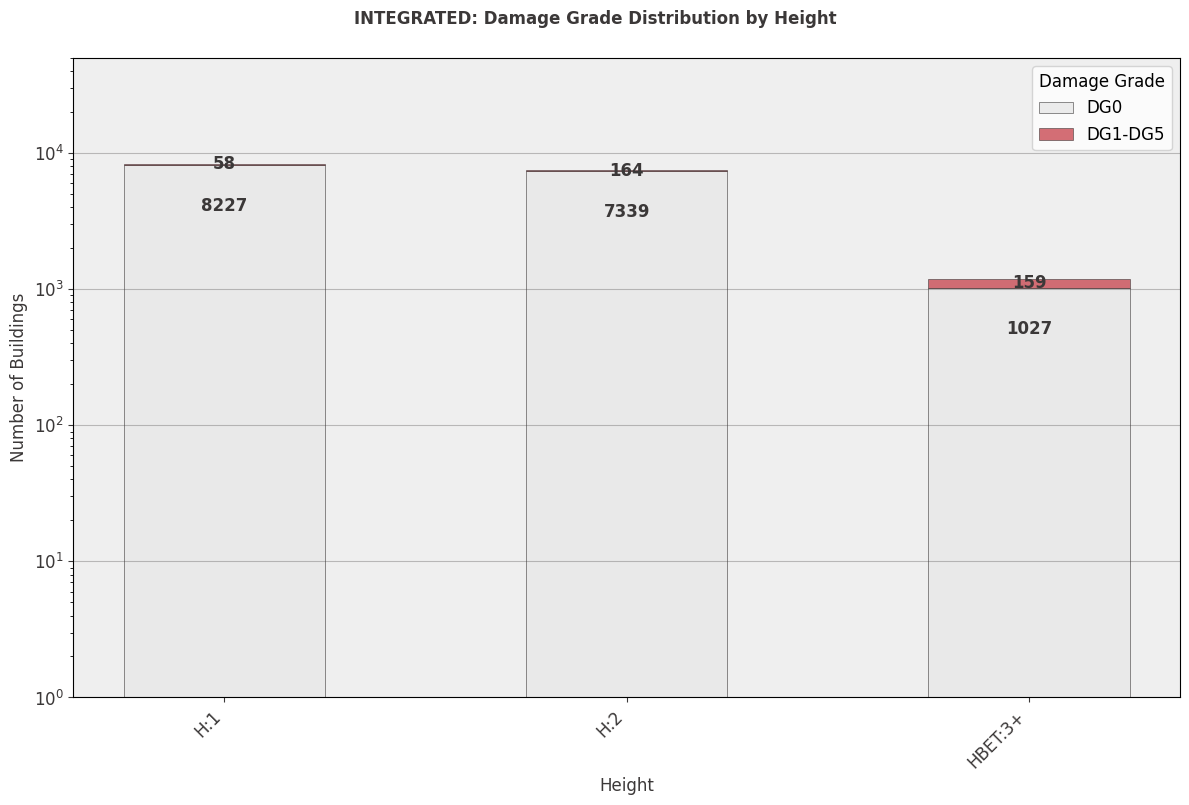

📋 Height Summary:
  H:1: 8,285 buildings (DG0: 8,227, DG1-DG5: 58)
  H:2: 7,503 buildings (DG0: 7,339, DG1-DG5: 164)
  HBET:3+: 1,186 buildings (DG0: 1,027, DG1-DG5: 159)

Analyzing: Occupancy
📊 7 total categories found


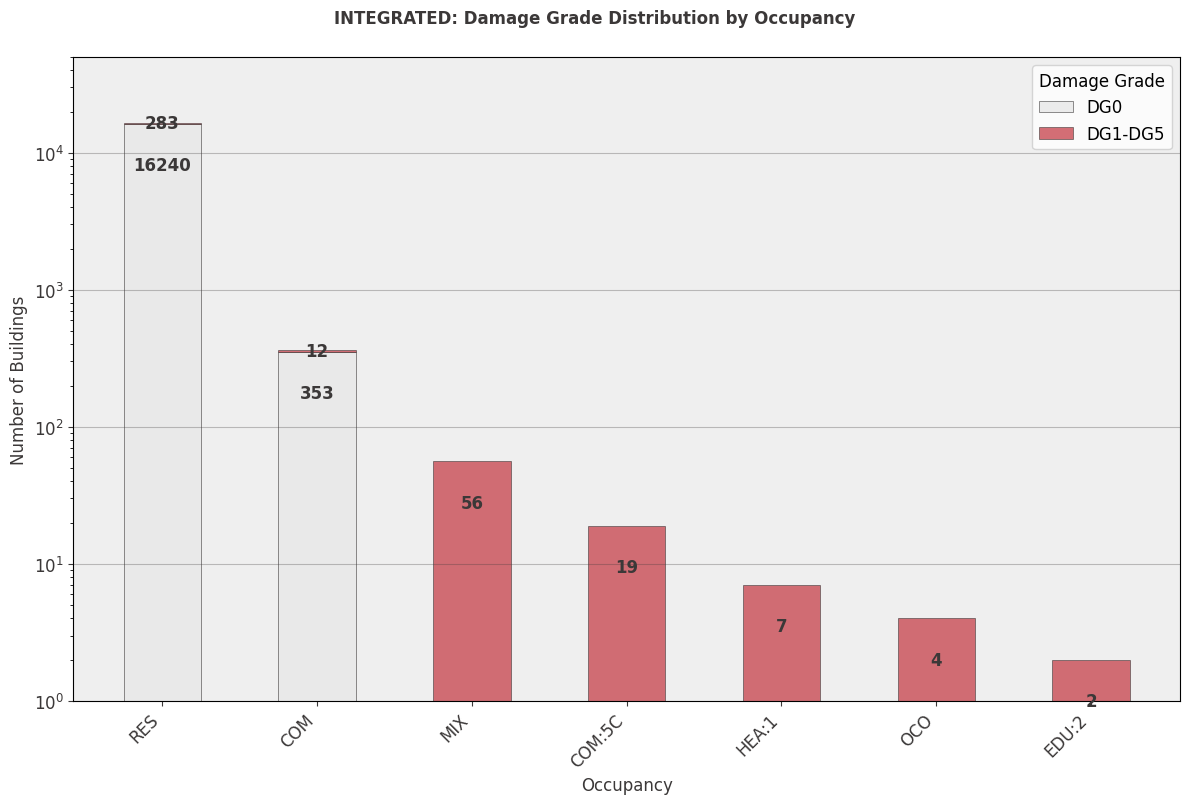

📋 Occupancy Summary:
  RES: 16,523 buildings (DG0: 16,240, DG1-DG5: 283)
  COM: 365 buildings (DG0: 353, DG1-DG5: 12)
  MIX: 56 buildings (DG0: 0, DG1-DG5: 56)
  COM:5C: 19 buildings (DG0: 0, DG1-DG5: 19)
  HEA:1: 7 buildings (DG0: 0, DG1-DG5: 7)
  OCO: 4 buildings (DG0: 0, DG1-DG5: 4)
  EDU:2: 2 buildings (DG0: 0, DG1-DG5: 2)

🎯 KEY INSIGHTS - INTEGRATED MODEL
📊 Parameters analyzed: 4

📈 Material LLRS:
   Total buildings analyzed: 16,976
   Most damaged (DG1-DG5): MCF (281 buildings)
   Least damaged (DG1-DG5): CR (2 buildings)

📈 LLRS:
   Total buildings analyzed: 16,976
   Most damaged (DG1-DG5): LFINF (280 buildings)
   Least damaged (DG1-DG5): Other (2 buildings)

📈 Height:
   Total buildings analyzed: 16,974
   Most damaged (DG1-DG5): H:2 (164 buildings)
   Least damaged (DG1-DG5): H:1 (58 buildings)

📈 Occupancy:
   Total buildings analyzed: 16,976
   Most damaged (DG1-DG5): RES (283 buildings)
   Least damaged (DG1-DG5): EDU:2 (2 buildings)

✅ INTEGRATED EXPOSURE MODEL - STRATI

In [ ]:
print("📊 INTEGRATED EXPOSURE MODEL - COMPREHENSIVE ANALYSIS")
print("=" * 60)

# Use the complete integrated dataset (all buildings from Master.csv)
print("Analyzing complete integrated exposure model...")
integrated_exposure_data = data['exposure_master'].copy()

print(f"✅ Complete integrated exposure model:")
print(f"   Total buildings: {len(integrated_exposure_data):,}")
print(f"   EEFIT buildings (ID 1-383): {len(integrated_exposure_data[integrated_exposure_data['ID'] <= 383]):,}")
print(f"   HDX buildings (ID 1000+): {len(integrated_exposure_data[integrated_exposure_data['ID'] >= 1000]):,}")

"""### INTEGRATED EXPOSURE DATA DISTRIBUTION"""

print("\n📊 INTEGRATED EXPOSURE MODEL - DETAILED EXPOSURE DATA ANALYSIS")
print("=" * 50)

# Define region colors (same as previous sections)
region_colors = {
    'Marrakech-Safi': '#2f868d',
    'Souss-Massa': '#ea4335',
    'Drâa-Tafilalet': '#fbbc04',  # Original encoding
    'DrÃ¢a-Tafilalet': '#fbbc04',  # Alternative encoding
    'Draa-Tafilalet': '#fbbc04'   # Without special characters
}

# Define occupancy order based on frequency
occupancy_order = ['RES', 'MIX', 'COM:5C', 'COM', 'HEA:1', 'OCO', 'EDU:2']

# Create consistent occupancy colors
occupancy_counts_integrated = integrated_exposure_data['Occupancy'].value_counts()
n_occupancies_integrated = len(occupancy_counts_integrated)

# Define specific colors to ensure COM is always green
occupancy_color_mapping = {
    'RES': '#8dd3c7',     # Light blue
    'COM': '#80b366',     # Green (ensure COM is always green)
    'COM:5C': '#80b366',  # Green for COM variant
    'MIX': '#ffffb3',     # Light yellow
    'HEA:1': '#bebada',   # Light purple
    'OCO': '#fb8072',     # Light red
    'EDU:2': '#fdb462'    # Orange
}

# Create occupancy color mapping with fallback
occupancy_colors_integrated = {}
ordered_occupancies_integrated = [occ for occ in occupancy_order if occ in occupancy_counts_integrated.index]
remaining_occupancies_integrated = [occ for occ in occupancy_counts_integrated.index if occ not in occupancy_order]
all_ordered_occupancies_integrated = ordered_occupancies_integrated + remaining_occupancies_integrated

for occ in all_ordered_occupancies_integrated:
    if occ in occupancy_color_mapping:
        occupancy_colors_integrated[occ] = occupancy_color_mapping[occ]
    else:
        # Use Set3 colors for any unmapped occupancies
        idx = list(all_ordered_occupancies_integrated).index(occ)
        occupancy_colors_integrated[occ] = plt.cm.Set3(idx / len(all_ordered_occupancies_integrated))

# 1. INDIVIDUAL PLOTS - Basic frequency plots
print("\n1️⃣ INTEGRATED EXPOSURE MODEL - BASIC FREQUENCY DISTRIBUTIONS")
print("-" * 40)

# Plot 1: Frequency by occupancy (individual plot) - WITH LOGARITHMIC SCALE
fig1, ax1 = plt.subplots(1, 1, figsize=(10, 6))
fig1.patch.set_facecolor('white')

occupancy_counts_integrated = create_frequency_plot(integrated_exposure_data, 'Occupancy', 'INTEGRATED: Frequency by occupancy',
                                                   ax1, use_occupancy_colors=True, custom_order=occupancy_order)

# Set logarithmic scale for occupancy frequency plot
ax1.set_yscale('log')
ax1.set_ylim(1, 50000)
plt.tight_layout()
plt.show()

# Plot 2: Frequency by location (individual plot)
fig2, ax2 = plt.subplots(1, 1, figsize=(12, 6))
fig2.patch.set_facecolor('white')

location_counts_integrated = create_frequency_plot(integrated_exposure_data, 'Location', 'INTEGRATED: Frequency by location',
                                                  ax2, use_region_colors=True)

# Add legend for region colors (use proper region name only)
from matplotlib.patches import Patch
clean_region_colors = {
    'Marrakech-Safi': '#2f868d',
    'Souss-Massa': '#ea4335',
    'Drâa-Tafilalet': '#fbbc04'  # Only show the proper spelling in legend
}
legend_elements = [Patch(facecolor=color, edgecolor=color_edge, label=region)
                   for region, color in clean_region_colors.items()]
ax2.legend(handles=legend_elements, title='Region', loc='upper right', fontsize=12)

plt.tight_layout()
plt.show()

if occupancy_counts_integrated is not None:
    print(f"📊 INTEGRATED Occupancy types: {len(occupancy_counts_integrated)}")
if location_counts_integrated is not None:
    print(f"📊 INTEGRATED Locations: {len(location_counts_integrated)}")

# 2. Taxonomy parameters by occupancy (individual plots)
print("\n2️⃣ INTEGRATED EXPOSURE MODEL - TAXONOMY PARAMETERS BY OCCUPANCY")
print("-" * 40)

# REDUCED LIST - removed Date of construction, Structural Irregularity, Roof
building_characteristics = [
    'Material LLRS',
    'LLRS',
    'Height'
]

for i, characteristic in enumerate(building_characteristics):
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    fig.patch.set_facecolor('white')

    title = f'INTEGRATED: {characteristic} by Occupancy'
    use_primary = characteristic in ['Material LLRS', 'LLRS']

    # Create processed data copy for characteristic-specific modifications
    exposure_data_processed = integrated_exposure_data.copy()

    # Merge occupancy classes for all characteristics - keep MIX and COM separate
    occupancy_mapping = {
        'COM:5C': 'Other',
        'HEA:1': 'Other',
        'OCO': 'Other',
        'EDU:2': 'Other'
    }
    exposure_data_processed['Occupancy'] = exposure_data_processed['Occupancy'].replace(occupancy_mapping)

    # Special preprocessing for Material LLRS
    if characteristic == 'Material LLRS':
        # Extract primary taxonomy first
        processed_material_data = extract_primary_taxonomy(exposure_data_processed, characteristic, 'material')

        # Advanced material class merging
        def merge_material_classes_integrated(value):
            if pd.isna(value):
                return value
            # Keep as separate classes
            if value in ['MUR', 'CR', 'MCF']:
                return value
            # Merge into EU class
            elif value in ['EU', 'E+ETO', 'EWV']:
                return 'EU'
            # Merge into Other class
            elif value in ['HYB', 'MATO', 'ME+MEO', 'W', 'W+WBB', 'W+WLI']:
                return 'Other'
            else:
                return 'Other'

        processed_material_data = processed_material_data.apply(merge_material_classes_integrated)

        # Create custom crosstab
        crosstab = pd.crosstab(exposure_data_processed['Occupancy'], processed_material_data)

        # Sort occupancy by frequency (most common first)
        occupancy_totals = crosstab.sum(axis=1).sort_values(ascending=False)
        crosstab = crosstab.reindex(occupancy_totals.index)

        # Order materials according to specified sequence: MUR, CR, MCF, EU, Other
        material_order = ['MUR', 'CR', 'MCF', 'EU', 'Other']
        existing_materials = [mat for mat in material_order if mat in crosstab.columns]
        remaining_materials = [mat for mat in crosstab.columns if mat not in material_order]
        final_material_order = existing_materials + remaining_materials
        crosstab = crosstab.reindex(columns=final_material_order)

        # Create the plot manually
        ax.set_facecolor(infill)
        material_colors = plt.cm.Set3(np.linspace(0, 1, len(crosstab.columns)))

        # Create stacked bar chart
        bottom = np.zeros(len(crosstab.index))

        for i_mat, (material, color) in enumerate(zip(crosstab.columns, material_colors)):
            values = crosstab[material].values

            bars = ax.bar(range(len(crosstab.index)), values, width=0.5,
                         bottom=bottom, label=material, color=color, alpha=0.8,
                         edgecolor=color_edge, linewidth=0.5)

            # Add value labels for values > 0
            for j, value in enumerate(values):
                if value > 0:
                    y_pos = bottom[j] + value / 2
                    ax.text(j, y_pos, f'{int(value)}', ha='center', va='center',
                            fontsize=12, color=color_edge, weight='bold')

            bottom = bottom + values

        ax.set_ylabel('Number of Buildings', fontsize=12, color=color_edge)
        ax.set_title(title, fontsize=10, color=color_edge, weight='bold')
        ax.set_xticks(range(len(crosstab.index)))
        ax.set_xticklabels(crosstab.index, rotation=45, ha='right', fontsize=12, color=color_edge)
        ax.grid(True, alpha=0.3, color=color_edge, axis='y')
        ax.tick_params(colors=color_edge)
        ax.legend(bbox_to_anchor=(1.00, 0.9), loc='upper right', fontsize=12)

        # Set logarithmic scale
        ax.set_yscale('log')
        ax.set_ylim(1, 50000)

    # Special preprocessing for LLRS
    elif characteristic == 'LLRS':
        # Extract primary taxonomy first
        processed_llrs_data = extract_primary_taxonomy(exposure_data_processed, characteristic, 'llrs')

        # Advanced LLRS class merging
        def merge_llrs_classes_integrated(value):
            if pd.isna(value):
                return value
            # Keep as separate classes
            if value in ['LWAL', 'LFINF', 'LHV']:
                return value
            # Merge into Other class
            elif value in ['LDUAL+CDL', 'LDUAL+CDM', 'LN+CDN', 'LO', 'LFM']:
                return 'Other'
            else:
                return 'Other'

        processed_llrs_data = processed_llrs_data.apply(merge_llrs_classes_integrated)

        # Create custom crosstab
        crosstab = pd.crosstab(exposure_data_processed['Occupancy'], processed_llrs_data)

        # Sort occupancy by frequency (most common first)
        occupancy_totals = crosstab.sum(axis=1).sort_values(ascending=False)
        crosstab = crosstab.reindex(occupancy_totals.index)

        # Order LLRS according to specified sequence: LWAL, LFINF, LHV, Other
        llrs_order = ['LWAL', 'LFINF', 'LHV', 'Other']
        existing_llrs = [llrs for llrs in llrs_order if llrs in crosstab.columns]
        remaining_llrs = [llrs for llrs in crosstab.columns if llrs not in llrs_order]
        final_llrs_order = existing_llrs + remaining_llrs
        crosstab = crosstab.reindex(columns=final_llrs_order)

        # Create the plot manually
        ax.set_facecolor(infill)
        llrs_colors = plt.cm.Set3(np.linspace(0, 1, len(crosstab.columns)))

        # Create stacked bar chart
        bottom = np.zeros(len(crosstab.index))

        for i_llrs, (llrs, color) in enumerate(zip(crosstab.columns, llrs_colors)):
            values = crosstab[llrs].values

            bars = ax.bar(range(len(crosstab.index)), values, width=0.5,
                         bottom=bottom, label=llrs, color=color, alpha=0.8,
                         edgecolor=color_edge, linewidth=0.5)

            # Add value labels for values > 0
            for j, value in enumerate(values):
                if value > 0:
                    y_pos = bottom[j] + value / 2
                    ax.text(j, y_pos, f'{int(value)}', ha='center', va='center',
                            fontsize=12, color=color_edge, weight='bold')

            bottom = bottom + values

        ax.set_ylabel('Number of Buildings', fontsize=12, color=color_edge)
        ax.set_title(title, fontsize=10, color=color_edge, weight='bold')
        ax.set_xticks(range(len(crosstab.index)))
        ax.set_xticklabels(crosstab.index, rotation=45, ha='right', fontsize=12, color=color_edge)
        ax.grid(True, alpha=0.3, color=color_edge, axis='y')
        ax.tick_params(colors=color_edge)
        ax.legend(bbox_to_anchor=(1.00, 0.9), loc='upper right', fontsize=12)

        # Set logarithmic scale
        ax.set_yscale('log')
        ax.set_ylim(1, 50000)

    # Special preprocessing for Height
    elif characteristic == 'Height':
        # Advanced height class merging - lump H:3, HBET:4+, H99 into HBET:3+
        height_mapping = {
            'H:3': 'HBET:3+',
            'H:4': 'HBET:3+',
            'H:6': 'HBET:3+',
            'HBET:3-6': 'HBET:3+',
            'HBET:4-7': 'HBET:3+',
            'HBET:8+': 'HBET:3+',
            'H99': 'HBET:3+'
        }
        exposure_data_processed[characteristic] = exposure_data_processed[characteristic].replace(height_mapping)

        # Create custom crosstab
        crosstab = pd.crosstab(exposure_data_processed['Occupancy'], exposure_data_processed[characteristic])

        # Sort occupancy by frequency (most common first)
        occupancy_totals = crosstab.sum(axis=1).sort_values(ascending=False)
        crosstab = crosstab.reindex(occupancy_totals.index)

        # Order heights according to specified sequence: H:1, H:2, HBET:3+
        height_order = ['H:1', 'H:2', 'HBET:3+']
        existing_heights = [height for height in height_order if height in crosstab.columns]
        remaining_heights = [height for height in crosstab.columns if height not in height_order]
        final_height_order = existing_heights + remaining_heights
        crosstab = crosstab.reindex(columns=final_height_order)

        # Create the plot manually
        ax.set_facecolor(infill)
        height_colors = plt.cm.Set3(np.linspace(0, 1, len(crosstab.columns)))

        # Create stacked bar chart
        bottom = np.zeros(len(crosstab.index))

        for i_height, (height, color) in enumerate(zip(crosstab.columns, height_colors)):
            values = crosstab[height].values

            bars = ax.bar(range(len(crosstab.index)), values, width=0.5,
                         bottom=bottom, label=height, color=color, alpha=0.8,
                         edgecolor=color_edge, linewidth=0.5)

            # Add value labels for values > 0
            for j, value in enumerate(values):
                if value > 0:
                    y_pos = bottom[j] + value / 2
                    ax.text(j, y_pos, f'{int(value)}', ha='center', va='center',
                            fontsize=12, color=color_edge, weight='bold')

            bottom = bottom + values

        ax.set_ylabel('Number of Buildings', fontsize=12, color=color_edge)
        ax.set_title(title, fontsize=10, color=color_edge, weight='bold')
        ax.set_xticks(range(len(crosstab.index)))
        ax.set_xticklabels(crosstab.index, rotation=45, ha='right', fontsize=12, color=color_edge)
        ax.grid(True, alpha=0.3, color=color_edge, axis='y')
        ax.tick_params(colors=color_edge)
        ax.legend(bbox_to_anchor=(1.00, 0.9), loc='upper right', fontsize=12)

        # Set logarithmic scale
        ax.set_yscale('log')
        ax.set_ylim(1, 50000)

    else:
        crosstab = create_cross_frequency_plot(exposure_data_processed, 'Occupancy', characteristic, title, ax,
                                             use_primary_taxonomy=use_primary, use_stacked=True)
        # Set logarithmic scale for other characteristics too
        ax.set_yscale('log')
        ax.set_ylim(1, 50000)

    plt.tight_layout()
    plt.show()

    if 'crosstab' in locals():
        print(f"   ✅ {characteristic}: {len(crosstab.columns)} categories across {len(crosstab.index)} occupancy types")
        del crosstab  # Clean up for next iteration
    else:
        print(f"   ❌ {characteristic}: Not found in data")

# 3. Occupancy by taxonomy parameters (individual plots)
print("\n3️⃣ INTEGRATED EXPOSURE MODEL - OCCUPANCY DISTRIBUTION BY TAXONOMY PARAMETERS")
print("-" * 40)

# REDUCED LIST - removed Date of construction
key_characteristics = ['Material LLRS', 'LLRS', 'Height']

for i, characteristic in enumerate(key_characteristics):
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    fig.patch.set_facecolor('white')

    title = f'INTEGRATED: Occupancy by {characteristic}'
    use_primary = characteristic in ['Material LLRS', 'LLRS']

    # Create processed data copy for characteristic-specific modifications
    exposure_data_processed = integrated_exposure_data.copy()

    # Merge occupancy classes for all characteristics - lump MIX, COM and Other into "Other"
    occupancy_mapping = {
        'MIX': 'Other',
        'COM': 'Other',
        'COM:5C': 'Other',
        'HEA:1': 'Other',
        'OCO': 'Other',
        'EDU:2': 'Other'
    }
    exposure_data_processed['Occupancy'] = exposure_data_processed['Occupancy'].replace(occupancy_mapping)

    # Special preprocessing for Material LLRS
    if characteristic == 'Material LLRS':
        # Extract primary taxonomy first
        processed_material_data = extract_primary_taxonomy(exposure_data_processed, characteristic, 'material')

        # Advanced material class merging (same as above)
        def merge_material_classes_integrated(value):
            if pd.isna(value):
                return value
            # Keep as separate classes
            if value in ['MUR', 'CR', 'MCF']:
                return value
            # Merge into EU class
            elif value in ['EU', 'E+ETO', 'EWV']:
                return 'EU'
            # Merge into Other class
            elif value in ['HYB', 'MATO', 'ME+MEO', 'W', 'W+WBB', 'W+WLI']:
                return 'Other'
            else:
                return 'Other'

        processed_material_data = processed_material_data.apply(merge_material_classes_integrated)

        # Create custom crosstab
        crosstab = pd.crosstab(processed_material_data, exposure_data_processed['Occupancy'])

        # Sort materials by frequency (most common first)
        material_totals = crosstab.sum(axis=1).sort_values(ascending=False)
        crosstab = crosstab.reindex(material_totals.index)

        # Order occupancy types consistently - now only RES and Other
        ordered_occupancies = [occ for occ in ['RES', 'Other'] if occ in crosstab.columns]
        remaining_occupancies = [occ for occ in crosstab.columns if occ not in ['RES', 'Other']]
        new_order = ordered_occupancies + remaining_occupancies
        crosstab = crosstab.reindex(columns=new_order)

        # Create the plot manually
        ax.set_facecolor(infill)

        # Use consistent occupancy colors
        category_colors = [occupancy_colors_integrated.get(occ, color_main) for occ in crosstab.columns]

        # Create stacked bar chart
        bottom = np.zeros(len(crosstab.index))

        for i_occ, (occupancy, color) in enumerate(zip(crosstab.columns, category_colors)):
            values = crosstab[occupancy].values

            bars = ax.bar(range(len(crosstab.index)), values, width=0.5,
                         bottom=bottom, label=occupancy, color=color, alpha=0.8,
                         edgecolor=color_edge, linewidth=0.5)

            # Add value labels for values > 0
            for j, value in enumerate(values):
                if value > 0:
                    y_pos = bottom[j] + value / 2
                    ax.text(j, y_pos, f'{int(value)}', ha='center', va='center',
                            fontsize=12, color=color_edge, weight='bold')

            bottom = bottom + values

        ax.set_ylabel('Number of Buildings', fontsize=12, color=color_edge)
        ax.set_title(title, fontsize=10, color=color_edge, weight='bold')
        ax.set_xticks(range(len(crosstab.index)))
        ax.set_xticklabels(crosstab.index, rotation=45, ha='right', fontsize=12, color=color_edge)
        ax.grid(True, alpha=0.3, color=color_edge, axis='y')
        ax.tick_params(colors=color_edge)
        ax.legend(bbox_to_anchor=(1.00, 0.9), loc='upper right', fontsize=12)

        # Set logarithmic scale
        ax.set_yscale('log')
        ax.set_ylim(1, 50000)

    # Special preprocessing for LLRS
    elif characteristic == 'LLRS':
        # Extract primary taxonomy first
        processed_llrs_data = extract_primary_taxonomy(exposure_data_processed, characteristic, 'llrs')

        # Advanced LLRS class merging (same as above)
        def merge_llrs_classes_integrated(value):
            if pd.isna(value):
                return value
            # Keep as separate classes
            if value in ['LWAL', 'LFINF', 'LHV']:
                return value
            # Merge into Other class
            elif value in ['LDUAL+CDL', 'LDUAL+CDM', 'LN+CDN', 'LO', 'LFM']:
                return 'Other'
            else:
                return 'Other'

        processed_llrs_data = processed_llrs_data.apply(merge_llrs_classes_integrated)

        # Create custom crosstab
        crosstab = pd.crosstab(processed_llrs_data, exposure_data_processed['Occupancy'])

        # Sort LLRS by frequency (most common first)
        llrs_totals = crosstab.sum(axis=1).sort_values(ascending=False)
        crosstab = crosstab.reindex(llrs_totals.index)

        # Order occupancy types consistently - now only RES and Other
        ordered_occupancies = [occ for occ in ['RES', 'Other'] if occ in crosstab.columns]
        remaining_occupancies = [occ for occ in crosstab.columns if occ not in ['RES', 'Other']]
        new_order = ordered_occupancies + remaining_occupancies
        crosstab = crosstab.reindex(columns=new_order)

        # Create the plot manually
        ax.set_facecolor(infill)

        # Use consistent occupancy colors
        category_colors = [occupancy_colors_integrated.get(occ, color_main) for occ in crosstab.columns]

        # Create stacked bar chart
        bottom = np.zeros(len(crosstab.index))

        for i_occ, (occupancy, color) in enumerate(zip(crosstab.columns, category_colors)):
            values = crosstab[occupancy].values

            bars = ax.bar(range(len(crosstab.index)), values, width=0.5,
                         bottom=bottom, label=occupancy, color=color, alpha=0.8,
                         edgecolor=color_edge, linewidth=0.5)

            # Add value labels for values > 0
            for j, value in enumerate(values):
                if value > 0:
                    y_pos = bottom[j] + value / 2
                    ax.text(j, y_pos, f'{int(value)}', ha='center', va='center',
                            fontsize=12, color=color_edge, weight='bold')

            bottom = bottom + values

        ax.set_ylabel('Number of Buildings', fontsize=12, color=color_edge)
        ax.set_title(title, fontsize=10, color=color_edge, weight='bold')
        ax.set_xticks(range(len(crosstab.index)))
        ax.set_xticklabels(crosstab.index, rotation=45, ha='right', fontsize=12, color=color_edge)
        ax.grid(True, alpha=0.3, color=color_edge, axis='y')
        ax.tick_params(colors=color_edge)
        ax.legend(bbox_to_anchor=(1.00, 0.9), loc='upper right', fontsize=12)

        # Set logarithmic scale
        ax.set_yscale('log')
        ax.set_ylim(1, 50000)

    # Special preprocessing for Height
    elif characteristic == 'Height':
        # Advanced height class merging - lump H:3, HBET:4+, H:99 into HBET:3+
        height_mapping = {
            'H:3': 'HBET:3+',
            'H:4': 'HBET:3+',
            'H:6': 'HBET:3+',
            'HBET:3-6': 'HBET:3+',
            'HBET:4-7': 'HBET:3+',
            'HBET:8+': 'HBET:3+',
            'H:99': 'HBET:3+'
        }
        exposure_data_processed[characteristic] = exposure_data_processed[characteristic].replace(height_mapping)

        # Create custom crosstab
        crosstab = pd.crosstab(exposure_data_processed[characteristic], exposure_data_processed['Occupancy'])

        # Sort heights by frequency (most common first)
        height_totals = crosstab.sum(axis=1).sort_values(ascending=False)
        crosstab = crosstab.reindex(height_totals.index)

        # Order occupancy types consistently - now only RES and Other
        ordered_occupancies = [occ for occ in ['RES', 'Other'] if occ in crosstab.columns]
        remaining_occupancies = [occ for occ in crosstab.columns if occ not in ['RES', 'Other']]
        new_order = ordered_occupancies + remaining_occupancies
        crosstab = crosstab.reindex(columns=new_order)

        # Create the plot manually
        ax.set_facecolor(infill)

        # Use consistent occupancy colors
        category_colors = [occupancy_colors_integrated.get(occ, color_main) for occ in crosstab.columns]

        # Create stacked bar chart
        bottom = np.zeros(len(crosstab.index))

        for i_occ, (occupancy, color) in enumerate(zip(crosstab.columns, category_colors)):
            values = crosstab[occupancy].values

            bars = ax.bar(range(len(crosstab.index)), values, width=0.5,
                         bottom=bottom, label=occupancy, color=color, alpha=0.8,
                         edgecolor=color_edge, linewidth=0.5)

            # Add value labels for values > 0
            for j, value in enumerate(values):
                if value > 0:
                    y_pos = bottom[j] + value / 2
                    ax.text(j, y_pos, f'{int(value)}', ha='center', va='center',
                            fontsize=12, color=color_edge, weight='bold')

            bottom = bottom + values

        ax.set_ylabel('Number of Buildings', fontsize=12, color=color_edge)
        ax.set_title(title, fontsize=10, color=color_edge, weight='bold')
        ax.set_xticks(range(len(crosstab.index)))
        ax.set_xticklabels(crosstab.index, rotation=45, ha='right', fontsize=12, color=color_edge)
        ax.grid(True, alpha=0.3, color=color_edge, axis='y')
        ax.tick_params(colors=color_edge)
        ax.legend(bbox_to_anchor=(1.00, 0.9), loc='upper right', fontsize=12)

        # Set logarithmic scale
        ax.set_yscale('log')
        ax.set_ylim(1, 50000)

    else:
        crosstab = create_cross_frequency_plot(exposure_data_processed, characteristic, 'Occupancy', title, ax,
                                             use_primary_taxonomy=use_primary, use_stacked=True)
        # Set logarithmic scale for other characteristics too
        ax.set_yscale('log')
        ax.set_ylim(1, 50000)

    plt.tight_layout()
    plt.show()

    if 'crosstab' in locals():
        print(f"   ✅ {characteristic}: {len(crosstab.index)} categories with {len(crosstab.columns)} occupancy types")
        del crosstab  # Clean up for next iteration
    else:
        print(f"   ❌ {characteristic}: Not found in data")

# 4. Summary statistics
print("\n4️⃣ INTEGRATED EXPOSURE MODEL - EXPOSURE DATA SUMMARY")
print("-" * 40)

total_buildings_integrated = len(integrated_exposure_data)
print(f"📊 Total INTEGRATED buildings: {total_buildings_integrated:,}")

# Occupancy summary
if occupancy_counts_integrated is not None:
    print(f"\n📋 INTEGRATED Occupancy Distribution:")
    for occ, count in occupancy_counts_integrated.items():
        percentage = (count / total_buildings_integrated * 100)
        print(f"   {occ}: {count:,} buildings ({percentage:.1f}%)")

# Location summary
if location_counts_integrated is not None:
    print(f"\n📋 INTEGRATED Location Distribution (by region):")
    for region, color in clean_region_colors.items():
        # Handle region name encoding issues
        region_data = integrated_exposure_data[
            (integrated_exposure_data['Region'] == region) |
            (integrated_exposure_data['Region'] == region.replace('â', 'Ã¢')) |
            (integrated_exposure_data['Region'] == region.replace('â', ''))
        ]
        region_locations_integrated = region_data['Location'].value_counts()
        region_total_integrated = region_locations_integrated.sum()
        percentage = (region_total_integrated / total_buildings_integrated * 100)
        print(f"   {region}: {region_total_integrated:,} buildings ({percentage:.1f}%)")
        for loc, count in region_locations_integrated.head(5).items():
            print(f"     - {loc}: {count:,} buildings")
        if len(region_locations_integrated) > 5:
            remaining = len(region_locations_integrated) - 5
            print(f"     - ... and {remaining} more locations")

# Taxonomy parameters summary (using primary taxonomy for Material LLRS and LLRS)
print(f"\n📋 INTEGRATED Taxonomy parameters summary:")
for characteristic in building_characteristics:
    if characteristic in integrated_exposure_data.columns:
        if characteristic in ['Material LLRS', 'LLRS']:
            # Use primary taxonomy
            taxonomy_type = 'material' if characteristic == 'Material LLRS' else 'llrs'
            processed_data_integrated = extract_primary_taxonomy(integrated_exposure_data, characteristic, taxonomy_type)
            unique_values = processed_data_integrated.nunique()
            most_common = processed_data_integrated.mode().iloc[0] if len(processed_data_integrated.mode()) > 0 else 'N/A'
            most_common_count = processed_data_integrated.value_counts().iloc[0] if len(processed_data_integrated.value_counts()) > 0 else 0
        else:
            unique_values = integrated_exposure_data[characteristic].nunique()
            most_common = integrated_exposure_data[characteristic].mode().iloc[0] if len(integrated_exposure_data[characteristic].mode()) > 0 else 'N/A'
            most_common_count = integrated_exposure_data[characteristic].value_counts().iloc[0] if len(integrated_exposure_data[characteristic].value_counts()) > 0 else 0

        most_common_pct = (most_common_count / total_buildings_integrated * 100)

        print(f"   {characteristic}:")
        print(f"     Categories: {unique_values}")
        print(f"     Most common: {most_common} ({most_common_count:,} buildings, {most_common_pct:.1f}%)")

print(f"\n✅ INTEGRATED EXPOSURE MODEL - DETAILED EXPOSURE ANALYSIS COMPLETE!")
print("=" * 60)

"""### INTEGRATED DAMAGE GRADE DISTRIBUTION"""

print("\n📊 INTEGRATED EXPOSURE MODEL - DAMAGE GRADE DISTRIBUTION ANALYSIS")
print("=" * 50)

# Extract and clean damage grade data from complete integrated dataset
damage_data_integrated = integrated_exposure_data['DG'].str.strip()
damage_counts_integrated = damage_data_integrated.value_counts().sort_index()
damage_percentages_integrated = (damage_counts_integrated / len(damage_data_integrated) * 100).round(1)

# Print summary
print(f"Total buildings assessed: {len(damage_data_integrated):,}")
print("Damage grade distribution:")
for dg, count in damage_counts_integrated.items():
    print(f"  {dg}: {count:,} buildings ({damage_percentages_integrated[dg]:5.1f}%)")

# Create plot
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
fig.patch.set_facecolor('white')
fig.suptitle(f'Integrated Exposure Model - Damage Grade Distribution (n={len(damage_data_integrated):,})',
             fontsize=12, color=color_edge, weight='bold', y=1.0)

# Plot: Frequency bars with damage grade color progression
ax.set_facecolor(infill)

# Get colors for each damage grade (including DG0)
damage_colors_integrated = {
    'DG0': "#E8E8E8",  # Light gray for no damage (HDX buildings)
    'DG1': "#8DB9CA",  # Main color (light blue) - least damage
    'DG2': "#A8C4B8",  # Blue-green transition
    'DG3': "#C3CFA6",  # Green-yellow transition
    'DG4': "#DEDA94",  # Yellow-orange transition
    'DG5': "#C94B54"   # Red - most damage
}

bar_colors_integrated = [damage_colors_integrated.get(dg, color_main) for dg in damage_counts_integrated.index]

bars = ax.bar(range(len(damage_counts_integrated)), damage_counts_integrated.values,
               color=bar_colors_integrated, alpha=0.8, edgecolor=color_edge, linewidth=1.5, width=0.5)

ax.set_ylabel('Number of Buildings', fontsize=12, color=color_edge)
ax.set_xticks(range(len(damage_counts_integrated)))
ax.set_xticklabels(damage_counts_integrated.index, fontsize=12, color=color_edge)
ax.grid(True, alpha=0.3, color=color_edge)
ax.tick_params(colors=color_edge, labelsize=12)

# Set logarithmic scale for damage grade distribution
ax.set_yscale('log')
ax.set_ylim(1, max(damage_counts_integrated.values) + 50000)

# Add value labels
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 200,
             f'{damage_counts_integrated.iloc[i]:,}\n({damage_percentages_integrated.iloc[i]}%)',
             ha='center', va='bottom', fontsize=10, color=color_edge, weight='bold')

plt.tight_layout()
plt.show()

# Quick statistics for integrated model
most_common_integrated = damage_counts_integrated.idxmax()
no_damage = damage_counts_integrated.get('DG0', 0)
light_damage = damage_counts_integrated.get('DG1', 0) + damage_counts_integrated.get('DG2', 0)
heavy_damage = damage_counts_integrated.get('DG4', 0) + damage_counts_integrated.get('DG5', 0)

print(f"\n📊 Key Insights - Integrated Exposure Model:")
print(f"• Most common category: {most_common_integrated} ({damage_percentages_integrated[most_common_integrated]}%)")
print(f"• No damage (DG0): {no_damage:,} buildings ({no_damage/len(damage_data_integrated)*100:.1f}%)")
print(f"• Light damage (DG1-DG2): {light_damage:,} buildings ({light_damage/len(damage_data_integrated)*100:.1f}%)")
print(f"• Heavy damage (DG4-DG5): {heavy_damage:,} buildings ({heavy_damage/len(damage_data_integrated)*100:.1f}%)")

# Comparison with EEFIT-only damage distribution
eefit_only_data = integrated_exposure_data[integrated_exposure_data['ID'] <= 383]
eefit_only_dg = eefit_only_data['DG'].str.strip().value_counts().sort_index()
eefit_only_pct = (eefit_only_dg / len(eefit_only_dg) * 100).round(1)

print(f"\n📋 Comparison: EEFIT vs Integrated Model")
print(f"   Dataset sizes:")
print(f"   • EEFIT only: {len(eefit_only_data):,} buildings")
print(f"   • Integrated: {len(integrated_exposure_data):,} buildings")
print(f"   • Size increase: {len(integrated_exposure_data)/len(eefit_only_data):.1f}x")

print(f"\n   Damage grade percentages comparison:")
print(f"   {'Grade':<6} {'EEFIT Only':<12} {'Integrated':<12} {'Change':<10}")
print(f"   {'-'*6} {'-'*12} {'-'*12} {'-'*10}")

for dg in ['DG1', 'DG2', 'DG3', 'DG4', 'DG5']:
    eefit_pct = eefit_only_pct.get(dg, 0)
    integrated_pct = damage_percentages_integrated.get(dg, 0)
    change = integrated_pct - eefit_pct
    print(f"   {dg:<6} {eefit_pct:>9.1f}%   {integrated_pct:>9.1f}%   {change:>+7.1f}pp")

print(f"   {'DG0':<6} {'0.0':<12} {damage_percentages_integrated.get('DG0', 0):>9.1f}%   {'+'+str(damage_percentages_integrated.get('DG0', 0))+'pp':<10}")

print(f"\n✅ INTEGRATED DAMAGE GRADE VISUALIZATION COMPLETE!")
print("=" * 60)

"""### INTEGRATED DAMAGE GRADE DISTRIBUTION STRATIFIED BY TAXONOMY PARAMETERS"""

print("\n📊 INTEGRATED MODEL - STRATIFIED DAMAGE GRADE ANALYSIS")
print("=" * 50)

# Prepare integrated damage data with numeric conversion for analysis
damage_analysis_data_integrated = integrated_exposure_data.copy()
damage_analysis_data_integrated['DG'] = damage_analysis_data_integrated['DG'].str.strip()

# Create lumped damage grade column (DG0 separate, DG1-DG5 lumped)
def lump_damage_grades(dg):
    if dg == 'DG0':
        return 'DG0'
    elif dg in ['DG1', 'DG2', 'DG3', 'DG4', 'DG5']:
        return 'DG1-DG5'
    else:
        return dg

damage_analysis_data_integrated['DG_lumped'] = damage_analysis_data_integrated['DG'].apply(lump_damage_grades)

# REDUCED LIST - removed Date of construction, Structural Irregularity, Roof
building_params_integrated = [
    'Material LLRS',
    'LLRS',
    'Height',
    'Occupancy'
]

# Function to create stratified damage plot for each parameter (adapted for integrated model)
def plot_stratified_damage_integrated(param_name):
    """Create damage distribution plot stratified by building parameter for integrated model"""

    print(f"\nAnalyzing: {param_name}")

    # Create a copy for processing
    processed_data = damage_analysis_data_integrated.copy()

    # Apply merging for Material LLRS
    if param_name == 'Material LLRS':
        # Extract primary taxonomy
        taxonomy_type = 'material'
        processed_param_data = extract_primary_taxonomy(processed_data, param_name, taxonomy_type)

        # Merge material classes
        def merge_material_classes(value):
            if pd.isna(value):
                return value
            if value in ['MUR', 'CR', 'MCF']:
                return value
            elif value in ['EU', 'E+ETO', 'EWV']:
                return 'EU'
            else:
                return 'Other'

        processed_param_data = processed_param_data.apply(merge_material_classes)
        param_counts = processed_param_data.value_counts()

        # Order materials: MUR, CR, MCF, EU, Other
        material_order = ['MUR', 'CR', 'MCF', 'EU', 'Other']
        all_categories = [mat for mat in material_order if mat in param_counts.index]

    # Apply merging for LLRS
    elif param_name == 'LLRS':
        # Extract primary taxonomy
        taxonomy_type = 'llrs'
        processed_param_data = extract_primary_taxonomy(processed_data, param_name, taxonomy_type)

        # Merge LLRS classes
        def merge_llrs_classes(value):
            if pd.isna(value):
                return value
            if value in ['LWAL', 'LFINF', 'LHV']:
                return value
            elif value in ['LDUAL+CDL', 'LDUAL+CDM', 'LN+CDN', 'LO', 'LFM']:
                return 'Other'
            else:
                return 'Other'

        processed_param_data = processed_param_data.apply(merge_llrs_classes)
        param_counts = processed_param_data.value_counts()

        # Order LLRS: LWAL, LFINF, LHV, Other
        llrs_order = ['LWAL', 'LFINF', 'LHV', 'Other']
        all_categories = [llrs for llrs in llrs_order if llrs in param_counts.index]

    # Apply merging for Height
    elif param_name == 'Height':
        # Merge height classes - lump H:3, HBET:4+, H:99 into HBET:3+
        height_mapping = {
            'H:3': 'HBET:3+',
            'H:4': 'HBET:3+',
            'H:6': 'HBET:3+',
            'HBET:3-6': 'HBET:3+',
            'HBET:4-7': 'HBET:3+',
            'HBET:8+': 'HBET:3+',
            'H:99': 'HBET:3+'
        }
        processed_param_data = processed_data[param_name].replace(height_mapping)
        param_counts = processed_param_data.value_counts()

        # Order heights: H:1, H:2, HBET:3+
        height_order = ['H:1', 'H:2', 'HBET:3+']
        all_categories = [height for height in height_order if height in param_counts.index]

    # Apply merging for Occupancy
    elif param_name == 'Occupancy':
        # DO NOT merge occupancy classes for damage grade distribution
        processed_param_data = processed_data[param_name]
        param_counts = processed_param_data.value_counts()

        # Sort by frequency (most common first)
        all_categories = param_counts.sort_values(ascending=False).index.tolist()

    else:
        # No merging for other parameters
        processed_param_data = processed_data[param_name]
        param_counts = processed_param_data.value_counts()
        all_categories = param_counts.sort_values(ascending=False).index.tolist()

    print(f"📊 {len(all_categories)} total categories found")

    # Create crosstab for LUMPED damage grades by parameter
    crosstab_counts = pd.crosstab(processed_param_data, processed_data['DG_lumped'])

    # Ensure consistent ordering
    crosstab_counts = crosstab_counts.reindex(all_categories, fill_value=0)

    # Create figure - Single plot showing damage grade counts for each category
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    fig.patch.set_facecolor('white')
    fig.suptitle(f'INTEGRATED: Damage Grade Distribution by {param_name}',
                 fontsize=12, color=color_edge, weight='bold', y=1.00)

    # Plot: Stacked bar chart showing count of each damage grade
    ax.set_facecolor(infill)

    # Define colors for lumped damage grades
    damage_colors_lumped = {
        'DG0': "#E8E8E8",      # Light gray for no damage
        'DG1-DG5': "#C94B54"   # Red for all damage grades combined
    }

    # Get damage grade categories in order
    damage_grades = ['DG0', 'DG1-DG5']  # Fixed order
    damage_grades = [dg for dg in damage_grades if dg in crosstab_counts.columns]
    grade_colors = [damage_colors_lumped.get(dg, color_main) for dg in damage_grades]

    # Stacked bar chart
    bottom = np.zeros(len(crosstab_counts.index))

    # Stack from DG0 up to DG1-DG5
    for i, dg in enumerate(damage_grades):
        if dg in crosstab_counts.columns:
            bars = ax.bar(range(len(crosstab_counts.index)), crosstab_counts[dg],
                         bottom=bottom, label=dg, color=grade_colors[i],
                         alpha=0.8, edgecolor=color_edge, linewidth=0.5, width=0.5)

            # Add value labels for bars with values > 0
            for j, value in enumerate(crosstab_counts[dg]):
                if value > 0:
                    y_pos = bottom[j] + value / 2
                    ax.text(j, y_pos, f'{int(value)}', ha='center', va='center',
                            fontsize=12, color=color_edge, weight='bold')

            bottom += crosstab_counts[dg]

    ax.set_ylabel('Number of Buildings', fontsize=12, color=color_edge)
    ax.set_xlabel(param_name, fontsize=12, color=color_edge)
    ax.set_xticks(range(len(crosstab_counts.index)))
    ax.set_xticklabels(crosstab_counts.index, rotation=45, ha='right', fontsize=12, color=color_edge)

    # Set logarithmic scale for y-axis
    ax.set_yscale('log')
    ax.set_ylim(1, 50000)

    # Legend with DG0 and DG1-DG5
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, title='Damage Grade', bbox_to_anchor=(1, 1),
              loc='upper right', fontsize=12, title_fontsize=12)

    ax.grid(True, alpha=0.3, color=color_edge, axis='y')
    ax.tick_params(colors=color_edge, labelsize=12)

    plt.tight_layout()
    plt.show()

    # Summary statistics
    print(f"📋 {param_name} Summary:")
    for category in all_categories:
        cat_data = processed_data[processed_param_data == category]
        # Get counts for DG0 and DG1-DG5
        dg0_count = len(cat_data[cat_data['DG_lumped'] == 'DG0'])
        dg1to5_count = len(cat_data[cat_data['DG_lumped'] == 'DG1-DG5'])
        n_buildings = len(cat_data)
        print(f"  {category}: {n_buildings:,} buildings (DG0: {dg0_count:,}, DG1-DG5: {dg1to5_count:,})")

    return crosstab_counts

# Run analysis for each building parameter
print("Analyzing damage distribution by taxonomy parameters...")
print("=" * 60)

results_integrated = {}
for param in building_params_integrated:
    if param in damage_analysis_data_integrated.columns:
        result = plot_stratified_damage_integrated(param)
        results_integrated[param] = result
    else:
        print(f"❌ Parameter '{param}' not found in data")

# Summary insights
print(f"\n🎯 KEY INSIGHTS - INTEGRATED MODEL")
print("=" * 30)

print(f"📊 Parameters analyzed: {len(results_integrated)}")

# Calculate summary statistics for each parameter
for param_name, crosstab_counts in results_integrated.items():
    total_buildings = crosstab_counts.sum().sum()

    # Find category with most/least damage (DG1-DG5)
    most_damaged_category = None
    least_damaged_category = None
    max_damage_count = 0
    min_damage_count = float('inf')

    for category in crosstab_counts.index:
        damage_count = crosstab_counts.loc[category, 'DG1-DG5'] if 'DG1-DG5' in crosstab_counts.columns else 0
        if damage_count > max_damage_count:
            max_damage_count = damage_count
            most_damaged_category = category
        if damage_count < min_damage_count:
            min_damage_count = damage_count
            least_damaged_category = category

    print(f"\n📈 {param_name}:")
    print(f"   Total buildings analyzed: {total_buildings:,}")
    if most_damaged_category:
        print(f"   Most damaged (DG1-DG5): {most_damaged_category} ({max_damage_count:,} buildings)")
    if least_damaged_category and min_damage_count != float('inf'):
        print(f"   Least damaged (DG1-DG5): {least_damaged_category} ({min_damage_count:,} buildings)")

print(f"\n✅ INTEGRATED EXPOSURE MODEL - STRATIFIED DAMAGE ANALYSIS COMPLETE!")
print("=" * 60)